In [1]:
#execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
!pip install -U tensorflow==2.12.0rc0
!pip install -U numpy==1.18.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.8/585.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
!pip install contractions
!pip install vaderSentiment
!pip install sweetviz
!pip install textblob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)
  Using cached pyahocorasick-2.0.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (110 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 19.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Datasets

In [3]:
path_y = "/content/gdrive/MyDrive/ActiveLearning/content.csv"

path_X = "/content/gdrive/MyDrive/ActiveLearning/embeddings.csv"

In [4]:
X = np.loadtxt(path_X, delimiter=',')
X

array([[ 1.99537762e-02,  1.41088396e-01,  1.21092862e-02, ...,
         4.02916363e-03,  5.95441379e-04,  2.01702071e-03],
       [ 1.06860083e-02,  2.22194567e-02,  6.58114767e-03, ...,
         1.15687856e-02,  1.56186009e-02,  4.95213550e-03],
       [ 1.21856295e-02, -5.82239500e-06,  3.46893002e-03, ...,
         1.04015423e-02,  1.69245638e-02,  2.50742696e-02],
       ...,
       [ 4.36687693e-02,  4.29016631e-03, -1.87914621e-03, ...,
         2.15570014e-02,  1.20518897e-02,  4.48379964e-02],
       [ 4.54226211e-02, -5.43280294e-05,  1.04271546e-02, ...,
         4.31741551e-02,  5.08741029e-02,  4.45687249e-02],
       [ 3.13891135e-02,  1.12535786e-02,  1.99487037e-03, ...,
         6.71563391e-03,  1.61708035e-02,  3.09308693e-02]])

In [5]:
print(X.shape)


(12622, 1024)


In [6]:
y = pd.read_csv(path_y)
y

,Unnamed: 0,Related,original_text,full_text
0,0,0,NPS Server Windows Server 2019 on wired networ...,NPS Server Windows Server 2019 on wired networ...
1,1,1,How a fake Devil May Cry file (nearly) infecte...,How a fake Devil May Cry file (nearly) infecte...
2,2,0,"Routing/Loop Issue, Need Help. I have a Netgea...","Routing/Loop Issue, Need Help. I have a Netgea..."
3,3,0,Get URLs to redirect automatically - URL Short...,Get URLs to redirect automatically - URL Short...
4,4,0,"Just got this, what do you think, legit?. Subj...","Just got this, what do you think, legit?. Subj..."
...,...,...,...,...
12617,12617,0,Hi Guys Am I safe?. So I was going through dis...,Hi Guys Am I safe?. So I was going through dis...
12618,12618,0,RNC wonen dieven Christel koning en Remco Aart...,RNC wonen dieven Christel koning en Remco Aart...
12619,12619,0,Failed to create process. I changed the name o...,Failed to create process. I changed the name o...
12620,12620,0,Trump allies orchestrate disinformation plot t...,Trump allies orchestrate disinformation plot t...


In [7]:
y['Related'] = y['Related'].astype(int)
y.at[10885, 'Related'] = 1
y

,Unnamed: 0,Related,original_text,full_text
0,0,0,NPS Server Windows Server 2019 on wired networ...,NPS Server Windows Server 2019 on wired networ...
1,1,1,How a fake Devil May Cry file (nearly) infecte...,How a fake Devil May Cry file (nearly) infecte...
2,2,0,"Routing/Loop Issue, Need Help. I have a Netgea...","Routing/Loop Issue, Need Help. I have a Netgea..."
3,3,0,Get URLs to redirect automatically - URL Short...,Get URLs to redirect automatically - URL Short...
4,4,0,"Just got this, what do you think, legit?. Subj...","Just got this, what do you think, legit?. Subj..."
...,...,...,...,...
12617,12617,0,Hi Guys Am I safe?. So I was going through dis...,Hi Guys Am I safe?. So I was going through dis...
12618,12618,0,RNC wonen dieven Christel koning en Remco Aart...,RNC wonen dieven Christel koning en Remco Aart...
12619,12619,0,Failed to create process. I changed the name o...,Failed to create process. I changed the name o...
12620,12620,0,Trump allies orchestrate disinformation plot t...,Trump allies orchestrate disinformation plot t...


<Axes: title={'center': 'Percentage of Labels'}, ylabel='Related'>

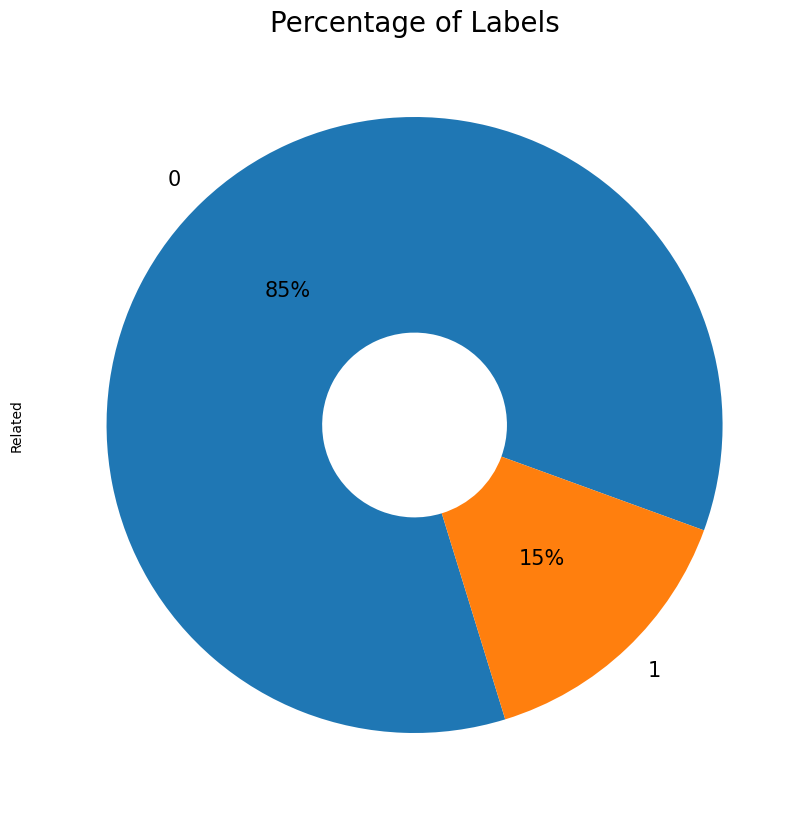

In [8]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
y.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [9]:
y = y['Related']
print(y.shape)

y

(12622,)


0        0
1        1
2        0
3        0
4        0
        ..
12617    0
12618    0
12619    0
12620    0
12621    1
Name: Related, Length: 12622, dtype: int64

In [10]:
# pip install --upgrade tensorflow

In [11]:
!pip install keras-tuner
!pip install --upgrade paramiko cryptography


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 12.9 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
import os
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from keras_tuner.tuners import RandomSearch


In [14]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
from tensorflow.keras import regularizers

def plot_history(history):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('binary_accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [16]:
!pip install torch==2.1.0

In [17]:
!pip install -q ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.6 MB/s eta 0:00:00


****LASER Encoders****

laser_encoders is the official Python package for the Facebook LASER library. It provides a simple and convenient way to use LASER embeddings in Python. It allows you to calculate multilingual sentence embeddings using the LASER toolkit. These embeddings can be utilized for various natural language processing tasks, including document classification, bitext filtering, and mining.

This encodes each of the strings as a LASER embedding (1024 dimentional vector)

For users familiar with the earlier version of LASER, you might have encountered the laserembeddings package. This package primarily dealt with LASER-1 model embeddings.

For the latest LASER-2,3 models, use the newly introduced laser_encoders package, which offers better performance and support for a wider range of languages.


In [18]:
!pip install -q laserembeddings==1.1.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.8/859.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 826.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 40.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires 

In [19]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.3 MB/s eta 0:00:00


In [20]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote


  Preparing metadata (setup.py) ... done
  Created wheel for fastcache: filename=fastcache-1.1.0-cp310-cp310-linux_x86_64.whl size=42962 sha256=6eaffa60b21e0b5b50f69f9e43363c3523985d8c196a750a4932a1014261952b
  Stored in directory: /root/.cache/pip/wheels/f5/ea/fc/eebb4e5d80ccd0da9db419de1e9b156c9c2875b5d394727aff
Successfully built fastcache


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, KFold, cross_validate

import tensorflow as tf
import tensorflow_addons as tfa

sns.set(style='white', context='notebook', palette='deep')


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0-rc0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you'

In [22]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall


train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train_test split: test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#test is 10% of the initial dataset, val 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(8835, 1024)
(2524, 1024)
(1263, 1024)


In [23]:
print('X_train.shape', X_train.shape)
print('Y_train.shape', y_train.shape)

X_train.shape (8835, 1024)
Y_train.shape (8835,)


In [24]:
X_train

array([[ 2.43075788e-02,  1.46854697e-02,  7.96990842e-03, ...,
         1.78219657e-02,  7.10894773e-03,  1.13593750e-02],
       [ 3.57184745e-02,  1.12140281e-02,  1.16002688e-03, ...,
         1.39511647e-02,  1.28701432e-02,  1.84918903e-02],
       [ 2.26242244e-02,  9.95224528e-03,  3.67754512e-02, ...,
         2.85349563e-02,  2.29146574e-02,  1.73395723e-02],
       ...,
       [ 1.95900816e-02,  1.13463486e-02,  1.08029915e-03, ...,
         1.06353192e-02,  1.31625477e-02,  5.96600026e-02],
       [ 3.55472900e-02,  2.23542098e-02, -1.42675987e-03, ...,
         9.66146961e-03,  9.18083359e-03,  2.39176247e-02],
       [ 7.81997200e-03, -2.76272349e-05,  3.46952747e-03, ...,
         1.77615304e-02,  9.08295810e-03,  2.99081039e-02]])

In [25]:
y_train

6472     0
5700     0
614      0
11029    1
8065     1
        ..
4859     0
3264     0
9845     1
10799    0
2732     0
Name: Related, Length: 8835, dtype: int64

In [26]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8835, 1024)
(2524, 1024)
(1263, 1024)


In [27]:
epochs = 1000
batch_size = 32
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)


In [28]:
from sklearn.utils import class_weight

weights = pd.read_csv(path_y)
weights = weights['Related']

y_array = y.values

weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_array), y=y_array)
weights



array([0.58608841, 3.40399137])

In [29]:
class_weights_example = {0: weights[0], 1: weights[1]}
type(class_weights_example)
class_weights_example

{0: 0.5860884101040119, 1: 3.4039913700107873}

In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience= 10, restore_best_weights=True,)


In [31]:
!pip install scikeras

# LR - Logistic Regression

In [32]:
#lists to keep the results for the final table
accuracy_list = []
loss_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_roc_list = []
mcc_list = []
model_name = []
training_time = []

In [33]:
import time
class TrainingTimeCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        end_time = time.time()
        elapsed_time = end_time - self.start_time
        print("Training time:", elapsed_time, "seconds")
        training_time.append(elapsed_time)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef

# Compute confusion matrix
def confusion(predictions):
    cm = confusion_matrix(y_test, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)
    loss = log_loss(y_test, predictions)

    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)


    accuracy_list.append(accuracy)
    loss_list.append(loss)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    auc_roc_list.append(auc_roc)
    mcc_list.append(mcc)
    model_name.append(m)

def results(model, x, y, x_t, y_t):
    # Print the evaluation results

    prediction = model.predict(x_t)
    for i in range(len(prediction)):
        if (prediction[i] < 0.5):
            prediction[i] = 0
        else:
            prediction[i] = 1
    confusion(prediction)



In [35]:
def LR_model():
    # Train a logi
    global m
    time_callback = TrainingTimeCallback()
    #stic regression classifier on the embeddings
    LR = LogisticRegression()
    m = 'LR_laser'
    time_callback.on_train_begin()
    LR.fit(X , y )
    time_callback.on_train_end()
    filename = f"LR_{m}.h5"
    #with open(filename, 'wb') as file:
    #    pickle.dump(LR, file)
#     print('Best epoch: %d' % (best_epoch,))
    # Increment the counter for saved models
    results(LR, X , y , X_test, y_test)
LR_model()

Training time: 2.788799285888672 seconds
[0.98428835 0.25966851]

0.6219784315928146

Confusion matrix:
[[1065   17]
 [ 134   47]]

Normalized confusion matrix:
[[0.98428835 0.01571165]
 [0.74033149 0.25966851]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.89      0.98      0.93      1082
     label 1       0.73      0.26      0.38       181

    accuracy                           0.88      1263
   macro avg       0.81      0.62      0.66      1263
weighted avg       0.87      0.88      0.85      1263

AUC-ROC: 0.6219784315928145
MCC: 0.3897322814502111
precision: 0.8113076000834029
recall: 0.6219784315928146
f1_score: 0.6587372169385071
Test loss: 4.309257056022717
Test accuracy: 0.880443388756928


# CV su modello casuale a 1 Layer

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

accuracy_metric = tf.keras.metrics.BinaryAccuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[accuracy_metric, precision_metric, recall_metric, f1_score_metric])

In [ ]:
metrics = [accuracy_metric, precision_metric, recall_metric, f1_score_metric]

In [ ]:

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn import datasets, linear_model
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

kfold = KFold(n_splits=10, shuffle=True)

keras_classifier = KerasClassifier(model, class_weight = class_weights_example, random_state= seed, metrics = metrics, validation_split=0.2, epochs=1000, batch_size=32, verbose=1, callbacks=callback)

scores = cross_validate(keras_classifier, X_train, y_train, cv=kfold)

scores


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


198/199 [============================>.] - ETA: 0s - loss: 0.6614 - binary_accuracy: 0.5825 - precision: 0.2014 - recall: 0.6333 - f1_score: 0.3056

199/199 [==============================] - 8s 29ms/step - loss: 0.6611 - binary_accuracy: 0.5819 - precision: 0.2008 - recall: 0.6330 - f1_score: 0.3048 - val_loss: 0.6977 - val_binary_accuracy: 0.6348 - val_precision: 0.2350 - val_recall: 0.6082 - val_f1_score: 0.3390
Epoch 2/1000
197/199 [============================>.] - ETA: 0s - loss: 0.6058 - binary_accuracy: 0.6348 - precision: 0.2472 - recall: 0.7410 - f1_score: 0.3707

199/199 [==============================] - 4s 22ms/step - loss: 0.6054 - binary_accuracy: 0.6349 - precision: 0.2467 - recall: 0.7405 - f1_score: 0.3700 - val_loss: 0.6685 - val_binary_accuracy: 0.6600 - val_precision: 0.2771 - val_recall: 0.7510 - val_f1_score: 0.4048
Epoch 3/1000
196/199 [============================>.] - ETA: 0s - loss: 0.5664 - binary_accuracy: 0.6559 - precision: 0.2711 - recall: 0.8170 - f1_score: 0.4071

199/199 [==============================] - 4s 19ms/step - loss: 0.5665 - binary_accuracy: 0.6571 - precision: 0.2722 - recall: 0.8176 - f1_score: 0.4085 - val_loss: 0.6107 - val_binary_accuracy: 0.6769 - val_precision: 0.2984 - val_recall: 0.8122 - val_f1_score: 0.4364
Epoch 4/1000
197/199 [============================>.] - ETA: 0s - loss: 0.5400 - binary_accuracy: 0.6753 - precision: 0.2879 - recall: 0.8443 - f1_score: 0.4293

199/199 [==============================] - 4s 18ms/step - loss: 0.5396 - binary_accuracy: 0.6759 - precision: 0.2886 - recall: 0.8447 - f1_score: 0.4302 - val_loss: 0.5583 - val_binary_accuracy: 0.7159 - val_precision: 0.3312 - val_recall: 0.8286 - val_f1_score: 0.4732
Epoch 5/1000
197/199 [============================>.] - ETA: 0s - loss: 0.5184 - binary_accuracy: 0.7015 - precision: 0.3094 - recall: 0.8579 - f1_score: 0.4548

199/199 [==============================] - 6s 28ms/step - loss: 0.5180 - binary_accuracy: 0.7008 - precision: 0.3084 - recall: 0.8578 - f1_score: 0.4536 - val_loss: 0.5338 - val_binary_accuracy: 0.7234 - val_precision: 0.3409 - val_recall: 0.8531 - val_f1_score: 0.4872
Epoch 6/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4939 - binary_accuracy: 0.7146 - precision: 0.3225 - recall: 0.8843 - f1_score: 0.4726

199/199 [==============================] - 5s 23ms/step - loss: 0.4941 - binary_accuracy: 0.7148 - precision: 0.3229 - recall: 0.8838 - f1_score: 0.4730 - val_loss: 0.5186 - val_binary_accuracy: 0.7266 - val_precision: 0.3478 - val_recall: 0.8857 - val_f1_score: 0.4994
Epoch 7/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4798 - binary_accuracy: 0.7274 - precision: 0.3370 - recall: 0.8963 - f1_score: 0.4899

199/199 [==============================] - 4s 18ms/step - loss: 0.4791 - binary_accuracy: 0.7269 - precision: 0.3347 - recall: 0.8969 - f1_score: 0.4875 - val_loss: 0.5064 - val_binary_accuracy: 0.7310 - val_precision: 0.3507 - val_recall: 0.8776 - val_f1_score: 0.5012
Epoch 8/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4687 - binary_accuracy: 0.7367 - precision: 0.3429 - recall: 0.9004 - f1_score: 0.4967

199/199 [==============================] - 4s 18ms/step - loss: 0.4692 - binary_accuracy: 0.7368 - precision: 0.3438 - recall: 0.9001 - f1_score: 0.4976 - val_loss: 0.4975 - val_binary_accuracy: 0.7304 - val_precision: 0.3506 - val_recall: 0.8816 - val_f1_score: 0.5017
Epoch 9/1000
199/199 [==============================] - ETA: 0s - loss: 0.4549 - binary_accuracy: 0.7494 - precision: 0.3551 - recall: 0.8958 - f1_score: 0.5086

199/199 [==============================] - 5s 25ms/step - loss: 0.4549 - binary_accuracy: 0.7494 - precision: 0.3551 - recall: 0.8958 - f1_score: 0.5086 - val_loss: 0.4831 - val_binary_accuracy: 0.7574 - val_precision: 0.3765 - val_recall: 0.8776 - val_f1_score: 0.5270
Epoch 10/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4469 - binary_accuracy: 0.7565 - precision: 0.3635 - recall: 0.9001 - f1_score: 0.5178

199/199 [==============================] - 4s 21ms/step - loss: 0.4470 - binary_accuracy: 0.7561 - precision: 0.3622 - recall: 0.8990 - f1_score: 0.5164 - val_loss: 0.4755 - val_binary_accuracy: 0.7693 - val_precision: 0.3895 - val_recall: 0.8776 - val_f1_score: 0.5395
Epoch 11/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4316 - binary_accuracy: 0.7656 - precision: 0.3730 - recall: 0.9065 - f1_score: 0.5285

199/199 [==============================] - 4s 19ms/step - loss: 0.4321 - binary_accuracy: 0.7651 - precision: 0.3723 - recall: 0.9066 - f1_score: 0.5278 - val_loss: 0.4688 - val_binary_accuracy: 0.7649 - val_precision: 0.3850 - val_recall: 0.8816 - val_f1_score: 0.5360
Epoch 12/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4240 - binary_accuracy: 0.7741 - precision: 0.3818 - recall: 0.9036 - f1_score: 0.5368

199/199 [==============================] - 5s 23ms/step - loss: 0.4240 - binary_accuracy: 0.7739 - precision: 0.3816 - recall: 0.9045 - f1_score: 0.5367 - val_loss: 0.4638 - val_binary_accuracy: 0.7674 - val_precision: 0.3878 - val_recall: 0.8816 - val_f1_score: 0.5387
Epoch 13/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4148 - binary_accuracy: 0.7800 - precision: 0.3901 - recall: 0.9141 - f1_score: 0.5468

199/199 [==============================] - 4s 18ms/step - loss: 0.4148 - binary_accuracy: 0.7796 - precision: 0.3889 - recall: 0.9142 - f1_score: 0.5457 - val_loss: 0.4578 - val_binary_accuracy: 0.7718 - val_precision: 0.3927 - val_recall: 0.8816 - val_f1_score: 0.5434
Epoch 14/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4101 - binary_accuracy: 0.7832 - precision: 0.3901 - recall: 0.8944 - f1_score: 0.5433

199/199 [==============================] - 2s 11ms/step - loss: 0.4099 - binary_accuracy: 0.7840 - precision: 0.3922 - recall: 0.8947 - f1_score: 0.5453 - val_loss: 0.4531 - val_binary_accuracy: 0.7781 - val_precision: 0.3993 - val_recall: 0.8735 - val_f1_score: 0.5480
Epoch 15/1000
199/199 [==============================] - ETA: 0s - loss: 0.4024 - binary_accuracy: 0.7877 - precision: 0.3985 - recall: 0.9142 - f1_score: 0.5550

199/199 [==============================] - 2s 11ms/step - loss: 0.4024 - binary_accuracy: 0.7877 - precision: 0.3985 - recall: 0.9142 - f1_score: 0.5550 - val_loss: 0.4462 - val_binary_accuracy: 0.7888 - val_precision: 0.4123 - val_recall: 0.8735 - val_f1_score: 0.5602
Epoch 16/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3956 - binary_accuracy: 0.7972 - precision: 0.4117 - recall: 0.9250 - f1_score: 0.5698

199/199 [==============================] - 2s 10ms/step - loss: 0.3954 - binary_accuracy: 0.7969 - precision: 0.4106 - recall: 0.9251 - f1_score: 0.5688 - val_loss: 0.4475 - val_binary_accuracy: 0.7794 - val_precision: 0.4011 - val_recall: 0.8776 - val_f1_score: 0.5506
Epoch 17/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3934 - binary_accuracy: 0.8041 - precision: 0.4195 - recall: 0.9221 - f1_score: 0.5766

199/199 [==============================] - 3s 13ms/step - loss: 0.3933 - binary_accuracy: 0.8039 - precision: 0.4195 - recall: 0.9218 - f1_score: 0.5766 - val_loss: 0.4459 - val_binary_accuracy: 0.7769 - val_precision: 0.3981 - val_recall: 0.8776 - val_f1_score: 0.5478
Epoch 18/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3823 - binary_accuracy: 0.8028 - precision: 0.4163 - recall: 0.9107 - f1_score: 0.5714

199/199 [==============================] - 3s 16ms/step - loss: 0.3819 - binary_accuracy: 0.8030 - precision: 0.4175 - recall: 0.9121 - f1_score: 0.5728 - val_loss: 0.4388 - val_binary_accuracy: 0.7951 - val_precision: 0.4192 - val_recall: 0.8571 - val_f1_score: 0.5630
Epoch 19/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3779 - binary_accuracy: 0.8056 - precision: 0.4217 - recall: 0.9205 - f1_score: 0.5784

199/199 [==============================] - 2s 11ms/step - loss: 0.3776 - binary_accuracy: 0.8058 - precision: 0.4219 - recall: 0.9207 - f1_score: 0.5786 - val_loss: 0.4395 - val_binary_accuracy: 0.7813 - val_precision: 0.4026 - val_recall: 0.8694 - val_f1_score: 0.5504
Epoch 20/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3731 - binary_accuracy: 0.8146 - precision: 0.4351 - recall: 0.9221 - f1_score: 0.5912

199/199 [==============================] - 2s 11ms/step - loss: 0.3730 - binary_accuracy: 0.8148 - precision: 0.4343 - recall: 0.9218 - f1_score: 0.5904 - val_loss: 0.4348 - val_binary_accuracy: 0.7920 - val_precision: 0.4154 - val_recall: 0.8612 - val_f1_score: 0.5604
Epoch 21/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3683 - binary_accuracy: 0.8158 - precision: 0.4353 - recall: 0.9225 - f1_score: 0.5915

199/199 [==============================] - 2s 12ms/step - loss: 0.3684 - binary_accuracy: 0.8160 - precision: 0.4361 - recall: 0.9218 - f1_score: 0.5921 - val_loss: 0.4320 - val_binary_accuracy: 0.7970 - val_precision: 0.4211 - val_recall: 0.8490 - val_f1_score: 0.5629
Epoch 22/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3677 - binary_accuracy: 0.8202 - precision: 0.4427 - recall: 0.9091 - f1_score: 0.5954

199/199 [==============================] - 2s 12ms/step - loss: 0.3670 - binary_accuracy: 0.8198 - precision: 0.4408 - recall: 0.9099 - f1_score: 0.5939 - val_loss: 0.4311 - val_binary_accuracy: 0.7938 - val_precision: 0.4168 - val_recall: 0.8490 - val_f1_score: 0.5591
Epoch 23/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3535 - binary_accuracy: 0.8211 - precision: 0.4432 - recall: 0.9286 - f1_score: 0.6000

199/199 [==============================] - 3s 16ms/step - loss: 0.3536 - binary_accuracy: 0.8214 - precision: 0.4442 - recall: 0.9294 - f1_score: 0.6011 - val_loss: 0.4280 - val_binary_accuracy: 0.8114 - val_precision: 0.4411 - val_recall: 0.8408 - val_f1_score: 0.5787
Epoch 24/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3505 - binary_accuracy: 0.8268 - precision: 0.4527 - recall: 0.9192 - f1_score: 0.6066

199/199 [==============================] - 3s 13ms/step - loss: 0.3500 - binary_accuracy: 0.8266 - precision: 0.4515 - recall: 0.9197 - f1_score: 0.6056 - val_loss: 0.4277 - val_binary_accuracy: 0.8133 - val_precision: 0.4437 - val_recall: 0.8367 - val_f1_score: 0.5799
Epoch 25/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3448 - binary_accuracy: 0.8333 - precision: 0.4621 - recall: 0.9222 - f1_score: 0.6157

199/199 [==============================] - 2s 11ms/step - loss: 0.3441 - binary_accuracy: 0.8338 - precision: 0.4630 - recall: 0.9229 - f1_score: 0.6166 - val_loss: 0.4277 - val_binary_accuracy: 0.8026 - val_precision: 0.4294 - val_recall: 0.8571 - val_f1_score: 0.5722
Epoch 26/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3409 - binary_accuracy: 0.8376 - precision: 0.4691 - recall: 0.9269 - f1_score: 0.6229

199/199 [==============================] - 2s 11ms/step - loss: 0.3411 - binary_accuracy: 0.8371 - precision: 0.4685 - recall: 0.9273 - f1_score: 0.6224 - val_loss: 0.4261 - val_binary_accuracy: 0.8089 - val_precision: 0.4376 - val_recall: 0.8449 - val_f1_score: 0.5766
Epoch 27/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3405 - binary_accuracy: 0.8376 - precision: 0.4690 - recall: 0.9161 - f1_score: 0.6204

199/199 [==============================] - 2s 11ms/step - loss: 0.3406 - binary_accuracy: 0.8373 - precision: 0.4684 - recall: 0.9164 - f1_score: 0.6199 - val_loss: 0.4251 - val_binary_accuracy: 0.8108 - val_precision: 0.4409 - val_recall: 0.8531 - val_f1_score: 0.5814
Epoch 28/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3303 - binary_accuracy: 0.8452 - precision: 0.4845 - recall: 0.9359 - f1_score: 0.6385

199/199 [==============================] - 2s 12ms/step - loss: 0.3304 - binary_accuracy: 0.8445 - precision: 0.4810 - recall: 0.9359 - f1_score: 0.6355 - val_loss: 0.4241 - val_binary_accuracy: 0.8202 - val_precision: 0.4543 - val_recall: 0.8327 - val_f1_score: 0.5879
Epoch 29/1000
199/199 [==============================] - ETA: 0s - loss: 0.3320 - binary_accuracy: 0.8445 - precision: 0.4809 - recall: 0.9305 - f1_score: 0.6341

199/199 [==============================] - 3s 16ms/step - loss: 0.3320 - binary_accuracy: 0.8445 - precision: 0.4809 - recall: 0.9305 - f1_score: 0.6341 - val_loss: 0.4248 - val_binary_accuracy: 0.8158 - val_precision: 0.4478 - val_recall: 0.8408 - val_f1_score: 0.5844
Epoch 30/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3279 - binary_accuracy: 0.8447 - precision: 0.4811 - recall: 0.9273 - f1_score: 0.6336

199/199 [==============================] - 2s 11ms/step - loss: 0.3273 - binary_accuracy: 0.8453 - precision: 0.4822 - recall: 0.9273 - f1_score: 0.6345 - val_loss: 0.4239 - val_binary_accuracy: 0.8177 - val_precision: 0.4503 - val_recall: 0.8327 - val_f1_score: 0.5845
Epoch 31/1000
199/199 [==============================] - ETA: 0s - loss: 0.3243 - binary_accuracy: 0.8456 - precision: 0.4826 - recall: 0.9197 - f1_score: 0.6330

199/199 [==============================] - 2s 11ms/step - loss: 0.3243 - binary_accuracy: 0.8456 - precision: 0.4826 - recall: 0.9197 - f1_score: 0.6330 - val_loss: 0.4242 - val_binary_accuracy: 0.8316 - val_precision: 0.4729 - val_recall: 0.8204 - val_f1_score: 0.6000
Epoch 32/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3194 - binary_accuracy: 0.8516 - precision: 0.4937 - recall: 0.9450 - f1_score: 0.6485

199/199 [==============================] - 2s 11ms/step - loss: 0.3194 - binary_accuracy: 0.8511 - precision: 0.4926 - recall: 0.9435 - f1_score: 0.6473 - val_loss: 0.4237 - val_binary_accuracy: 0.8297 - val_precision: 0.4702 - val_recall: 0.8367 - val_f1_score: 0.6021
Epoch 33/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3164 - binary_accuracy: 0.8553 - precision: 0.5006 - recall: 0.9337 - f1_score: 0.6518

199/199 [==============================] - 2s 11ms/step - loss: 0.3169 - binary_accuracy: 0.8550 - precision: 0.4997 - recall: 0.9316 - f1_score: 0.6505 - val_loss: 0.4235 - val_binary_accuracy: 0.8171 - val_precision: 0.4500 - val_recall: 0.8449 - val_f1_score: 0.5872
Epoch 34/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3137 - binary_accuracy: 0.8553 - precision: 0.5000 - recall: 0.9302 - f1_score: 0.6504

199/199 [==============================] - 3s 14ms/step - loss: 0.3140 - binary_accuracy: 0.8553 - precision: 0.5003 - recall: 0.9305 - f1_score: 0.6507 - val_loss: 0.4244 - val_binary_accuracy: 0.8334 - val_precision: 0.4756 - val_recall: 0.7959 - val_f1_score: 0.5954
Epoch 35/1000
199/199 [==============================] - ETA: 0s - loss: 0.3113 - binary_accuracy: 0.8571 - precision: 0.5035 - recall: 0.9414 - f1_score: 0.6561

199/199 [==============================] - 3s 14ms/step - loss: 0.3113 - binary_accuracy: 0.8571 - precision: 0.5035 - recall: 0.9414 - f1_score: 0.6561 - val_loss: 0.4233 - val_binary_accuracy: 0.8297 - val_precision: 0.4698 - val_recall: 0.8245 - val_f1_score: 0.5985
Epoch 36/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3075 - binary_accuracy: 0.8549 - precision: 0.4997 - recall: 0.9274 - f1_score: 0.6495

199/199 [==============================] - 2s 11ms/step - loss: 0.3073 - binary_accuracy: 0.8542 - precision: 0.4982 - recall: 0.9273 - f1_score: 0.6482 - val_loss: 0.4246 - val_binary_accuracy: 0.8328 - val_precision: 0.4747 - val_recall: 0.8041 - val_f1_score: 0.5970
Epoch 37/1000
199/199 [==============================] - ETA: 0s - loss: 0.3087 - binary_accuracy: 0.8579 - precision: 0.5050 - recall: 0.9273 - f1_score: 0.6539

199/199 [==============================] - 2s 12ms/step - loss: 0.3087 - binary_accuracy: 0.8579 - precision: 0.5050 - recall: 0.9273 - f1_score: 0.6539 - val_loss: 0.4249 - val_binary_accuracy: 0.8334 - val_precision: 0.4760 - val_recall: 0.8082 - val_f1_score: 0.5991
Epoch 38/1000
199/199 [==============================] - ETA: 0s - loss: 0.3038 - binary_accuracy: 0.8601 - precision: 0.5093 - recall: 0.9240 - f1_score: 0.6566

199/199 [==============================] - 2s 11ms/step - loss: 0.3038 - binary_accuracy: 0.8601 - precision: 0.5093 - recall: 0.9240 - f1_score: 0.6566 - val_loss: 0.4258 - val_binary_accuracy: 0.8391 - val_precision: 0.4864 - val_recall: 0.8000 - val_f1_score: 0.6049
Epoch 39/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2981 - binary_accuracy: 0.8648 - precision: 0.5188 - recall: 0.9354 - f1_score: 0.6674

199/199 [==============================] - 2s 11ms/step - loss: 0.2977 - binary_accuracy: 0.8645 - precision: 0.5177 - recall: 0.9359 - f1_score: 0.6667 - val_loss: 0.4250 - val_binary_accuracy: 0.8328 - val_precision: 0.4748 - val_recall: 0.8082 - val_f1_score: 0.5982
Epoch 40/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2947 - binary_accuracy: 0.8624 - precision: 0.5136 - recall: 0.9328 - f1_score: 0.6625

199/199 [==============================] - 3s 15ms/step - loss: 0.2949 - binary_accuracy: 0.8624 - precision: 0.5138 - recall: 0.9327 - f1_score: 0.6626 - val_loss: 0.4285 - val_binary_accuracy: 0.8441 - val_precision: 0.4962 - val_recall: 0.7918 - val_f1_score: 0.6101
Epoch 41/1000
199/199 [==============================] - ETA: 0s - loss: 0.2952 - binary_accuracy: 0.8618 - precision: 0.5126 - recall: 0.9273 - f1_score: 0.6602

199/199 [==============================] - 3s 13ms/step - loss: 0.2952 - binary_accuracy: 0.8618 - precision: 0.5126 - recall: 0.9273 - f1_score: 0.6602 - val_loss: 0.4266 - val_binary_accuracy: 0.8391 - val_precision: 0.4864 - val_recall: 0.8000 - val_f1_score: 0.6049
Epoch 42/1000
199/199 [==============================] - ETA: 0s - loss: 0.2896 - binary_accuracy: 0.8657 - precision: 0.5202 - recall: 0.9359 - f1_score: 0.6687

199/199 [==============================] - 2s 12ms/step - loss: 0.2896 - binary_accuracy: 0.8657 - precision: 0.5202 - recall: 0.9359 - f1_score: 0.6687 - val_loss: 0.4285 - val_binary_accuracy: 0.8385 - val_precision: 0.4849 - val_recall: 0.7878 - val_f1_score: 0.6003
Epoch 43/1000
194/199 [============================>.] - ETA: 0s - loss: 0.2881 - binary_accuracy: 0.8745 - precision: 0.5383 - recall: 0.9388 - f1_score: 0.6842

199/199 [==============================] - 2s 12ms/step - loss: 0.2888 - binary_accuracy: 0.8742 - precision: 0.5377 - recall: 0.9370 - f1_score: 0.6833 - val_loss: 0.4251 - val_binary_accuracy: 0.8278 - val_precision: 0.4659 - val_recall: 0.8082 - val_f1_score: 0.5910
Epoch 44/1000
195/199 [============================>.] - ETA: 0s - loss: 0.2891 - binary_accuracy: 0.8702 - precision: 0.5289 - recall: 0.9335 - f1_score: 0.6752

199/199 [==============================] - 2s 11ms/step - loss: 0.2881 - binary_accuracy: 0.8706 - precision: 0.5302 - recall: 0.9338 - f1_score: 0.6764 - val_loss: 0.4259 - val_binary_accuracy: 0.8334 - val_precision: 0.4757 - val_recall: 0.8000 - val_f1_score: 0.5967
Epoch 45/1000
199/199 [==============================] - ETA: 0s - loss: 0.2834 - binary_accuracy: 0.8714 - precision: 0.5320 - recall: 0.9283 - f1_score: 0.6764

28/28 [==============================] - 0s 5ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


196/199 [============================>.] - ETA: 0s - loss: 0.6617 - binary_accuracy: 0.5851 - precision: 0.2063 - recall: 0.6399 - f1_score: 0.3120

199/199 [==============================] - 4s 15ms/step - loss: 0.6608 - binary_accuracy: 0.5846 - precision: 0.2056 - recall: 0.6399 - f1_score: 0.3113 - val_loss: 0.7052 - val_binary_accuracy: 0.6549 - val_precision: 0.2605 - val_recall: 0.6364 - val_f1_score: 0.3697
Epoch 2/1000
198/199 [============================>.] - ETA: 0s - loss: 0.6066 - binary_accuracy: 0.6289 - precision: 0.2464 - recall: 0.7411 - f1_score: 0.3699

199/199 [==============================] - 3s 15ms/step - loss: 0.6063 - binary_accuracy: 0.6289 - precision: 0.2462 - recall: 0.7417 - f1_score: 0.3697 - val_loss: 0.6730 - val_binary_accuracy: 0.6732 - val_precision: 0.2974 - val_recall: 0.7747 - val_f1_score: 0.4298
Epoch 3/1000
198/199 [============================>.] - ETA: 0s - loss: 0.5695 - binary_accuracy: 0.6583 - precision: 0.2730 - recall: 0.7970 - f1_score: 0.4067

199/199 [==============================] - 3s 16ms/step - loss: 0.5693 - binary_accuracy: 0.6579 - precision: 0.2724 - recall: 0.7974 - f1_score: 0.4061 - val_loss: 0.6098 - val_binary_accuracy: 0.6926 - val_precision: 0.3218 - val_recall: 0.8419 - val_f1_score: 0.4656
Epoch 4/1000
197/199 [============================>.] - ETA: 0s - loss: 0.5383 - binary_accuracy: 0.6896 - precision: 0.3022 - recall: 0.8490 - f1_score: 0.4458

199/199 [==============================] - 3s 13ms/step - loss: 0.5374 - binary_accuracy: 0.6893 - precision: 0.3016 - recall: 0.8499 - f1_score: 0.4453 - val_loss: 0.5568 - val_binary_accuracy: 0.7159 - val_precision: 0.3448 - val_recall: 0.8735 - val_f1_score: 0.4944
Epoch 5/1000
195/199 [============================>.] - ETA: 0s - loss: 0.5111 - binary_accuracy: 0.7066 - precision: 0.3200 - recall: 0.8743 - f1_score: 0.4685

199/199 [==============================] - 2s 11ms/step - loss: 0.5101 - binary_accuracy: 0.7068 - precision: 0.3183 - recall: 0.8746 - f1_score: 0.4667 - val_loss: 0.5351 - val_binary_accuracy: 0.7033 - val_precision: 0.3378 - val_recall: 0.9012 - val_f1_score: 0.4914
Epoch 6/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4890 - binary_accuracy: 0.7208 - precision: 0.3301 - recall: 0.8874 - f1_score: 0.4812

199/199 [==============================] - 2s 12ms/step - loss: 0.4900 - binary_accuracy: 0.7209 - precision: 0.3313 - recall: 0.8864 - f1_score: 0.4824 - val_loss: 0.5109 - val_binary_accuracy: 0.7461 - val_precision: 0.3723 - val_recall: 0.8696 - val_f1_score: 0.5213
Epoch 7/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4784 - binary_accuracy: 0.7272 - precision: 0.3378 - recall: 0.8931 - f1_score: 0.4902

199/199 [==============================] - 2s 11ms/step - loss: 0.4784 - binary_accuracy: 0.7270 - precision: 0.3375 - recall: 0.8939 - f1_score: 0.4900 - val_loss: 0.5014 - val_binary_accuracy: 0.7398 - val_precision: 0.3695 - val_recall: 0.9012 - val_f1_score: 0.5241
Epoch 8/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4624 - binary_accuracy: 0.7361 - precision: 0.3447 - recall: 0.8973 - f1_score: 0.4980

199/199 [==============================] - 2s 12ms/step - loss: 0.4643 - binary_accuracy: 0.7358 - precision: 0.3456 - recall: 0.8960 - f1_score: 0.4988 - val_loss: 0.4859 - val_binary_accuracy: 0.7549 - val_precision: 0.3821 - val_recall: 0.8775 - val_f1_score: 0.5324
Epoch 9/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4544 - binary_accuracy: 0.7475 - precision: 0.3569 - recall: 0.9030 - f1_score: 0.5116

199/199 [==============================] - 3s 17ms/step - loss: 0.4538 - binary_accuracy: 0.7478 - precision: 0.3577 - recall: 0.9035 - f1_score: 0.5125 - val_loss: 0.4777 - val_binary_accuracy: 0.7630 - val_precision: 0.3924 - val_recall: 0.8933 - val_f1_score: 0.5452
Epoch 10/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4448 - binary_accuracy: 0.7544 - precision: 0.3640 - recall: 0.8980 - f1_score: 0.5180

199/199 [==============================] - 2s 12ms/step - loss: 0.4443 - binary_accuracy: 0.7541 - precision: 0.3632 - recall: 0.8982 - f1_score: 0.5173 - val_loss: 0.4682 - val_binary_accuracy: 0.7693 - val_precision: 0.3975 - val_recall: 0.8735 - val_f1_score: 0.5464
Epoch 11/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4308 - binary_accuracy: 0.7664 - precision: 0.3765 - recall: 0.9042 - f1_score: 0.5316

199/199 [==============================] - 2s 12ms/step - loss: 0.4309 - binary_accuracy: 0.7667 - precision: 0.3770 - recall: 0.9046 - f1_score: 0.5322 - val_loss: 0.4658 - val_binary_accuracy: 0.7643 - val_precision: 0.3937 - val_recall: 0.8933 - val_f1_score: 0.5466
Epoch 12/1000
199/199 [==============================] - ETA: 0s - loss: 0.4216 - binary_accuracy: 0.7750 - precision: 0.3874 - recall: 0.9185 - f1_score: 0.5450

199/199 [==============================] - 2s 12ms/step - loss: 0.4216 - binary_accuracy: 0.7750 - precision: 0.3874 - recall: 0.9185 - f1_score: 0.5450 - val_loss: 0.4575 - val_binary_accuracy: 0.7750 - val_precision: 0.4051 - val_recall: 0.8854 - val_f1_score: 0.5558
Epoch 13/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4153 - binary_accuracy: 0.7803 - precision: 0.3944 - recall: 0.9146 - f1_score: 0.5511

199/199 [==============================] - 2s 12ms/step - loss: 0.4141 - binary_accuracy: 0.7805 - precision: 0.3934 - recall: 0.9153 - f1_score: 0.5503 - val_loss: 0.4496 - val_binary_accuracy: 0.7863 - val_precision: 0.4181 - val_recall: 0.8775 - val_f1_score: 0.5663
Epoch 14/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4112 - binary_accuracy: 0.7812 - precision: 0.3935 - recall: 0.9224 - f1_score: 0.5516

199/199 [==============================] - 3s 16ms/step - loss: 0.4113 - binary_accuracy: 0.7814 - precision: 0.3951 - recall: 0.9228 - f1_score: 0.5533 - val_loss: 0.4477 - val_binary_accuracy: 0.7832 - val_precision: 0.4151 - val_recall: 0.8893 - val_f1_score: 0.5660
Epoch 15/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3952 - binary_accuracy: 0.7968 - precision: 0.4141 - recall: 0.9307 - f1_score: 0.5731

199/199 [==============================] - 3s 13ms/step - loss: 0.3950 - binary_accuracy: 0.7969 - precision: 0.4143 - recall: 0.9303 - f1_score: 0.5733 - val_loss: 0.4447 - val_binary_accuracy: 0.7819 - val_precision: 0.4136 - val_recall: 0.8893 - val_f1_score: 0.5646
Epoch 16/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3969 - binary_accuracy: 0.7975 - precision: 0.4152 - recall: 0.9198 - f1_score: 0.5721

199/199 [==============================] - 2s 11ms/step - loss: 0.3973 - binary_accuracy: 0.7973 - precision: 0.4140 - recall: 0.9185 - f1_score: 0.5708 - val_loss: 0.4385 - val_binary_accuracy: 0.7901 - val_precision: 0.4226 - val_recall: 0.8735 - val_f1_score: 0.5696
Epoch 17/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3856 - binary_accuracy: 0.8011 - precision: 0.4185 - recall: 0.9222 - f1_score: 0.5757

199/199 [==============================] - 2s 11ms/step - loss: 0.3859 - binary_accuracy: 0.8003 - precision: 0.4180 - recall: 0.9207 - f1_score: 0.5750 - val_loss: 0.4334 - val_binary_accuracy: 0.8089 - val_precision: 0.4479 - val_recall: 0.8656 - val_f1_score: 0.5903
Epoch 18/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3818 - binary_accuracy: 0.8065 - precision: 0.4266 - recall: 0.9191 - f1_score: 0.5828

199/199 [==============================] - 2s 11ms/step - loss: 0.3814 - binary_accuracy: 0.8061 - precision: 0.4256 - recall: 0.9196 - f1_score: 0.5819 - val_loss: 0.4351 - val_binary_accuracy: 0.7882 - val_precision: 0.4208 - val_recall: 0.8814 - val_f1_score: 0.5696
Epoch 19/1000
199/199 [==============================] - ETA: 0s - loss: 0.3721 - binary_accuracy: 0.8077 - precision: 0.4281 - recall: 0.9250 - f1_score: 0.5853

199/199 [==============================] - 2s 12ms/step - loss: 0.3721 - binary_accuracy: 0.8077 - precision: 0.4281 - recall: 0.9250 - f1_score: 0.5853 - val_loss: 0.4295 - val_binary_accuracy: 0.7982 - val_precision: 0.4328 - val_recall: 0.8656 - val_f1_score: 0.5771
Epoch 20/1000
199/199 [==============================] - ETA: 0s - loss: 0.3709 - binary_accuracy: 0.8077 - precision: 0.4274 - recall: 0.9153 - f1_score: 0.5827

199/199 [==============================] - 3s 16ms/step - loss: 0.3709 - binary_accuracy: 0.8077 - precision: 0.4274 - recall: 0.9153 - f1_score: 0.5827 - val_loss: 0.4275 - val_binary_accuracy: 0.7989 - val_precision: 0.4337 - val_recall: 0.8656 - val_f1_score: 0.5778
Epoch 21/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3645 - binary_accuracy: 0.8133 - precision: 0.4348 - recall: 0.9219 - f1_score: 0.5909

199/199 [==============================] - 2s 11ms/step - loss: 0.3659 - binary_accuracy: 0.8134 - precision: 0.4356 - recall: 0.9207 - f1_score: 0.5914 - val_loss: 0.4272 - val_binary_accuracy: 0.7945 - val_precision: 0.4286 - val_recall: 0.8775 - val_f1_score: 0.5759
Epoch 22/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3610 - binary_accuracy: 0.8193 - precision: 0.4440 - recall: 0.9168 - f1_score: 0.5982

199/199 [==============================] - 2s 11ms/step - loss: 0.3604 - binary_accuracy: 0.8195 - precision: 0.4442 - recall: 0.9175 - f1_score: 0.5986 - val_loss: 0.4239 - val_binary_accuracy: 0.8083 - val_precision: 0.4465 - val_recall: 0.8577 - val_f1_score: 0.5873
Epoch 23/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3536 - binary_accuracy: 0.8252 - precision: 0.4520 - recall: 0.9232 - f1_score: 0.6068

199/199 [==============================] - 2s 12ms/step - loss: 0.3541 - binary_accuracy: 0.8253 - precision: 0.4531 - recall: 0.9218 - f1_score: 0.6076 - val_loss: 0.4228 - val_binary_accuracy: 0.8083 - val_precision: 0.4474 - val_recall: 0.8735 - val_f1_score: 0.5917
Epoch 24/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3530 - binary_accuracy: 0.8250 - precision: 0.4530 - recall: 0.9159 - f1_score: 0.6062

199/199 [==============================] - 2s 11ms/step - loss: 0.3536 - binary_accuracy: 0.8247 - precision: 0.4519 - recall: 0.9153 - f1_score: 0.6050 - val_loss: 0.4206 - val_binary_accuracy: 0.8114 - val_precision: 0.4513 - val_recall: 0.8617 - val_f1_score: 0.5924
Epoch 25/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3456 - binary_accuracy: 0.8312 - precision: 0.4631 - recall: 0.9252 - f1_score: 0.6173

199/199 [==============================] - 3s 14ms/step - loss: 0.3450 - binary_accuracy: 0.8314 - precision: 0.4628 - recall: 0.9260 - f1_score: 0.6171 - val_loss: 0.4195 - val_binary_accuracy: 0.8114 - val_precision: 0.4513 - val_recall: 0.8617 - val_f1_score: 0.5924
Epoch 26/1000
199/199 [==============================] - ETA: 0s - loss: 0.3404 - binary_accuracy: 0.8321 - precision: 0.4636 - recall: 0.9218 - f1_score: 0.6169

199/199 [==============================] - 3s 15ms/step - loss: 0.3404 - binary_accuracy: 0.8321 - precision: 0.4636 - recall: 0.9218 - f1_score: 0.6169 - val_loss: 0.4199 - val_binary_accuracy: 0.8083 - val_precision: 0.4474 - val_recall: 0.8735 - val_f1_score: 0.5917
Epoch 27/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3352 - binary_accuracy: 0.8359 - precision: 0.4697 - recall: 0.9268 - f1_score: 0.6235

199/199 [==============================] - 2s 11ms/step - loss: 0.3354 - binary_accuracy: 0.8354 - precision: 0.4691 - recall: 0.9260 - f1_score: 0.6227 - val_loss: 0.4180 - val_binary_accuracy: 0.8202 - val_precision: 0.4648 - val_recall: 0.8617 - val_f1_score: 0.6039
Epoch 28/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3375 - binary_accuracy: 0.8334 - precision: 0.4655 - recall: 0.9238 - f1_score: 0.6190

199/199 [==============================] - 2s 11ms/step - loss: 0.3371 - binary_accuracy: 0.8341 - precision: 0.4670 - recall: 0.9239 - f1_score: 0.6204 - val_loss: 0.4188 - val_binary_accuracy: 0.8014 - val_precision: 0.4379 - val_recall: 0.8775 - val_f1_score: 0.5842
Epoch 29/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3340 - binary_accuracy: 0.8397 - precision: 0.4765 - recall: 0.9312 - f1_score: 0.6305

199/199 [==============================] - 2s 11ms/step - loss: 0.3328 - binary_accuracy: 0.8404 - precision: 0.4775 - recall: 0.9325 - f1_score: 0.6316 - val_loss: 0.4164 - val_binary_accuracy: 0.8309 - val_precision: 0.4819 - val_recall: 0.8419 - val_f1_score: 0.6129
Epoch 30/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3229 - binary_accuracy: 0.8466 - precision: 0.4887 - recall: 0.9299 - f1_score: 0.6407

199/199 [==============================] - 2s 11ms/step - loss: 0.3233 - binary_accuracy: 0.8465 - precision: 0.4879 - recall: 0.9303 - f1_score: 0.6401 - val_loss: 0.4157 - val_binary_accuracy: 0.8297 - val_precision: 0.4799 - val_recall: 0.8498 - val_f1_score: 0.6134
Epoch 31/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3243 - binary_accuracy: 0.8434 - precision: 0.4820 - recall: 0.9296 - f1_score: 0.6349

199/199 [==============================] - 3s 15ms/step - loss: 0.3241 - binary_accuracy: 0.8439 - precision: 0.4833 - recall: 0.9293 - f1_score: 0.6359 - val_loss: 0.4150 - val_binary_accuracy: 0.8328 - val_precision: 0.4853 - val_recall: 0.8458 - val_f1_score: 0.6167
Epoch 32/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3192 - binary_accuracy: 0.8475 - precision: 0.4892 - recall: 0.9310 - f1_score: 0.6414

199/199 [==============================] - 3s 15ms/step - loss: 0.3205 - binary_accuracy: 0.8470 - precision: 0.4887 - recall: 0.9282 - f1_score: 0.6403 - val_loss: 0.4145 - val_binary_accuracy: 0.8334 - val_precision: 0.4864 - val_recall: 0.8458 - val_f1_score: 0.6176
Epoch 33/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3157 - binary_accuracy: 0.8521 - precision: 0.5000 - recall: 0.9357 - f1_score: 0.6517

199/199 [==============================] - 2s 11ms/step - loss: 0.3148 - binary_accuracy: 0.8520 - precision: 0.4977 - recall: 0.9357 - f1_score: 0.6498 - val_loss: 0.4139 - val_binary_accuracy: 0.8303 - val_precision: 0.4811 - val_recall: 0.8538 - val_f1_score: 0.6154
Epoch 34/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3154 - binary_accuracy: 0.8477 - precision: 0.4900 - recall: 0.9204 - f1_score: 0.6395

199/199 [==============================] - 2s 11ms/step - loss: 0.3151 - binary_accuracy: 0.8483 - precision: 0.4909 - recall: 0.9207 - f1_score: 0.6403 - val_loss: 0.4145 - val_binary_accuracy: 0.8353 - val_precision: 0.4895 - val_recall: 0.8300 - val_f1_score: 0.6158
Epoch 35/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3143 - binary_accuracy: 0.8544 - precision: 0.5029 - recall: 0.9285 - f1_score: 0.6525

199/199 [==============================] - 2s 11ms/step - loss: 0.3139 - binary_accuracy: 0.8549 - precision: 0.5029 - recall: 0.9282 - f1_score: 0.6524 - val_loss: 0.4133 - val_binary_accuracy: 0.8246 - val_precision: 0.4720 - val_recall: 0.8656 - val_f1_score: 0.6109
Epoch 36/1000
199/199 [==============================] - ETA: 0s - loss: 0.3063 - binary_accuracy: 0.8536 - precision: 0.5006 - recall: 0.9218 - f1_score: 0.6488

199/199 [==============================] - 11s 54ms/step - loss: 0.3063 - binary_accuracy: 0.8536 - precision: 0.5006 - recall: 0.9218 - f1_score: 0.6488 - val_loss: 0.4139 - val_binary_accuracy: 0.8397 - val_precision: 0.4977 - val_recall: 0.8379 - val_f1_score: 0.6244
Epoch 37/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3033 - binary_accuracy: 0.8555 - precision: 0.5012 - recall: 0.9301 - f1_score: 0.6514

199/199 [==============================] - 4s 19ms/step - loss: 0.3062 - binary_accuracy: 0.8561 - precision: 0.5053 - recall: 0.9271 - f1_score: 0.6541 - val_loss: 0.4157 - val_binary_accuracy: 0.8485 - val_precision: 0.5149 - val_recall: 0.8221 - val_f1_score: 0.6332
Epoch 38/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3048 - binary_accuracy: 0.8589 - precision: 0.5101 - recall: 0.9278 - f1_score: 0.6583

199/199 [==============================] - 2s 11ms/step - loss: 0.3050 - binary_accuracy: 0.8590 - precision: 0.5106 - recall: 0.9271 - f1_score: 0.6585 - val_loss: 0.4139 - val_binary_accuracy: 0.8416 - val_precision: 0.5012 - val_recall: 0.8419 - val_f1_score: 0.6283
Epoch 39/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2977 - binary_accuracy: 0.8625 - precision: 0.5165 - recall: 0.9338 - f1_score: 0.6651

199/199 [==============================] - 2s 11ms/step - loss: 0.2986 - binary_accuracy: 0.8623 - precision: 0.5170 - recall: 0.9314 - f1_score: 0.6649 - val_loss: 0.4154 - val_binary_accuracy: 0.8448 - val_precision: 0.5072 - val_recall: 0.8300 - val_f1_score: 0.6297
Epoch 40/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2986 - binary_accuracy: 0.8645 - precision: 0.5210 - recall: 0.9293 - f1_score: 0.6677

199/199 [==============================] - 2s 12ms/step - loss: 0.2980 - binary_accuracy: 0.8645 - precision: 0.5213 - recall: 0.9303 - f1_score: 0.6682 - val_loss: 0.4160 - val_binary_accuracy: 0.8485 - val_precision: 0.5149 - val_recall: 0.8221 - val_f1_score: 0.6332
Epoch 41/1000
199/199 [==============================] - ETA: 0s - loss: 0.2978 - binary_accuracy: 0.8586 - precision: 0.5100 - recall: 0.9250 - f1_score: 0.6575

199/199 [==============================] - 3s 15ms/step - loss: 0.2978 - binary_accuracy: 0.8586 - precision: 0.5100 - recall: 0.9250 - f1_score: 0.6575 - val_loss: 0.4171 - val_binary_accuracy: 0.8510 - val_precision: 0.5200 - val_recall: 0.8221 - val_f1_score: 0.6371
Epoch 42/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2929 - binary_accuracy: 0.8654 - precision: 0.5235 - recall: 0.9327 - f1_score: 0.6706

199/199 [==============================] - 3s 13ms/step - loss: 0.2935 - binary_accuracy: 0.8651 - precision: 0.5225 - recall: 0.9314 - f1_score: 0.6695 - val_loss: 0.4171 - val_binary_accuracy: 0.8529 - val_precision: 0.5239 - val_recall: 0.8221 - val_f1_score: 0.6400
Epoch 43/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2896 - binary_accuracy: 0.8683 - precision: 0.5286 - recall: 0.9307 - f1_score: 0.6743

199/199 [==============================] - 2s 11ms/step - loss: 0.2894 - binary_accuracy: 0.8687 - precision: 0.5299 - recall: 0.9314 - f1_score: 0.6755 - val_loss: 0.4166 - val_binary_accuracy: 0.8498 - val_precision: 0.5175 - val_recall: 0.8182 - val_f1_score: 0.6340
Epoch 44/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2881 - binary_accuracy: 0.8712 - precision: 0.5353 - recall: 0.9294 - f1_score: 0.6794

199/199 [==============================] - 2s 11ms/step - loss: 0.2878 - binary_accuracy: 0.8714 - precision: 0.5355 - recall: 0.9303 - f1_score: 0.6797 - val_loss: 0.4167 - val_binary_accuracy: 0.8498 - val_precision: 0.5174 - val_recall: 0.8221 - val_f1_score: 0.6351
Epoch 45/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2904 - binary_accuracy: 0.8683 - precision: 0.5313 - recall: 0.9256 - f1_score: 0.6751

28/28 [==============================] - 0s 3ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


199/199 [==============================] - ETA: 0s - loss: 0.6659 - binary_accuracy: 0.5851 - precision: 0.2091 - recall: 0.6476 - f1_score: 0.3161

199/199 [==============================] - 5s 20ms/step - loss: 0.6659 - binary_accuracy: 0.5851 - precision: 0.2091 - recall: 0.6476 - f1_score: 0.3161 - val_loss: 0.6992 - val_binary_accuracy: 0.6304 - val_precision: 0.2389 - val_recall: 0.6316 - val_f1_score: 0.3467
Epoch 2/1000
195/199 [============================>.] - ETA: 0s - loss: 0.6117 - binary_accuracy: 0.6255 - precision: 0.2446 - recall: 0.7335 - f1_score: 0.3668

199/199 [==============================] - 2s 11ms/step - loss: 0.6112 - binary_accuracy: 0.6267 - precision: 0.2457 - recall: 0.7346 - f1_score: 0.3683 - val_loss: 0.6692 - val_binary_accuracy: 0.6914 - val_precision: 0.3000 - val_recall: 0.7409 - val_f1_score: 0.4271
Epoch 3/1000
196/199 [============================>.] - ETA: 0s - loss: 0.5671 - binary_accuracy: 0.6641 - precision: 0.2799 - recall: 0.8091 - f1_score: 0.4159

199/199 [==============================] - 2s 11ms/step - loss: 0.5669 - binary_accuracy: 0.6649 - precision: 0.2810 - recall: 0.8100 - f1_score: 0.4173 - val_loss: 0.6092 - val_binary_accuracy: 0.6788 - val_precision: 0.3030 - val_recall: 0.8219 - val_f1_score: 0.4427
Epoch 4/1000
197/199 [============================>.] - ETA: 0s - loss: 0.5419 - binary_accuracy: 0.6813 - precision: 0.2985 - recall: 0.8406 - f1_score: 0.4405

199/199 [==============================] - 2s 11ms/step - loss: 0.5413 - binary_accuracy: 0.6807 - precision: 0.2961 - recall: 0.8397 - f1_score: 0.4379 - val_loss: 0.5573 - val_binary_accuracy: 0.6901 - val_precision: 0.3175 - val_recall: 0.8664 - val_f1_score: 0.4647
Epoch 5/1000
197/199 [============================>.] - ETA: 0s - loss: 0.5131 - binary_accuracy: 0.7057 - precision: 0.3187 - recall: 0.8742 - f1_score: 0.4671

199/199 [==============================] - 2s 10ms/step - loss: 0.5134 - binary_accuracy: 0.7060 - precision: 0.3199 - recall: 0.8747 - f1_score: 0.4684 - val_loss: 0.5261 - val_binary_accuracy: 0.7310 - val_precision: 0.3509 - val_recall: 0.8623 - val_f1_score: 0.4988
Epoch 6/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4972 - binary_accuracy: 0.7167 - precision: 0.3303 - recall: 0.8860 - f1_score: 0.4812

199/199 [==============================] - 2s 12ms/step - loss: 0.4975 - binary_accuracy: 0.7167 - precision: 0.3299 - recall: 0.8854 - f1_score: 0.4807 - val_loss: 0.5072 - val_binary_accuracy: 0.7454 - val_precision: 0.3656 - val_recall: 0.8704 - val_f1_score: 0.5150
Epoch 7/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4818 - binary_accuracy: 0.7284 - precision: 0.3398 - recall: 0.8853 - f1_score: 0.4911

199/199 [==============================] - 3s 16ms/step - loss: 0.4813 - binary_accuracy: 0.7286 - precision: 0.3401 - recall: 0.8854 - f1_score: 0.4915 - val_loss: 0.4973 - val_binary_accuracy: 0.7260 - val_precision: 0.3493 - val_recall: 0.8866 - val_f1_score: 0.5011
Epoch 8/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4619 - binary_accuracy: 0.7464 - precision: 0.3591 - recall: 0.9100 - f1_score: 0.5150

199/199 [==============================] - 2s 10ms/step - loss: 0.4610 - binary_accuracy: 0.7472 - precision: 0.3602 - recall: 0.9108 - f1_score: 0.5162 - val_loss: 0.4865 - val_binary_accuracy: 0.7373 - val_precision: 0.3601 - val_recall: 0.8907 - val_f1_score: 0.5128
Epoch 9/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4561 - binary_accuracy: 0.7420 - precision: 0.3530 - recall: 0.8979 - f1_score: 0.5067

199/199 [==============================] - 2s 10ms/step - loss: 0.4564 - binary_accuracy: 0.7423 - precision: 0.3540 - recall: 0.8970 - f1_score: 0.5077 - val_loss: 0.4787 - val_binary_accuracy: 0.7423 - val_precision: 0.3666 - val_recall: 0.9069 - val_f1_score: 0.5221
Epoch 10/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4446 - binary_accuracy: 0.7559 - precision: 0.3680 - recall: 0.8985 - f1_score: 0.5221

199/199 [==============================] - 2s 11ms/step - loss: 0.4448 - binary_accuracy: 0.7561 - precision: 0.3677 - recall: 0.8981 - f1_score: 0.5217 - val_loss: 0.4693 - val_binary_accuracy: 0.7505 - val_precision: 0.3733 - val_recall: 0.8947 - val_f1_score: 0.5268
Epoch 11/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4343 - binary_accuracy: 0.7668 - precision: 0.3811 - recall: 0.9178 - f1_score: 0.5385

199/199 [==============================] - 2s 10ms/step - loss: 0.4342 - binary_accuracy: 0.7667 - precision: 0.3807 - recall: 0.9183 - f1_score: 0.5383 - val_loss: 0.4650 - val_binary_accuracy: 0.7517 - val_precision: 0.3754 - val_recall: 0.9028 - val_f1_score: 0.5303
Epoch 12/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4266 - binary_accuracy: 0.7699 - precision: 0.3839 - recall: 0.9137 - f1_score: 0.5406

199/199 [==============================] - 3s 13ms/step - loss: 0.4265 - binary_accuracy: 0.7703 - precision: 0.3842 - recall: 0.9140 - f1_score: 0.5410 - val_loss: 0.4515 - val_binary_accuracy: 0.7825 - val_precision: 0.4071 - val_recall: 0.8785 - val_f1_score: 0.5564
Epoch 13/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4155 - binary_accuracy: 0.7784 - precision: 0.3917 - recall: 0.9129 - f1_score: 0.5482

199/199 [==============================] - 3s 15ms/step - loss: 0.4156 - binary_accuracy: 0.7785 - precision: 0.3933 - recall: 0.9140 - f1_score: 0.5500 - val_loss: 0.4513 - val_binary_accuracy: 0.7649 - val_precision: 0.3892 - val_recall: 0.9028 - val_f1_score: 0.5439
Epoch 14/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4095 - binary_accuracy: 0.7832 - precision: 0.3992 - recall: 0.9199 - f1_score: 0.5568

199/199 [==============================] - 2s 10ms/step - loss: 0.4103 - binary_accuracy: 0.7833 - precision: 0.3995 - recall: 0.9204 - f1_score: 0.5572 - val_loss: 0.4432 - val_binary_accuracy: 0.7863 - val_precision: 0.4134 - val_recall: 0.8988 - val_f1_score: 0.5663
Epoch 15/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4023 - binary_accuracy: 0.7907 - precision: 0.4082 - recall: 0.9159 - f1_score: 0.5647

199/199 [==============================] - 2s 11ms/step - loss: 0.4022 - binary_accuracy: 0.7907 - precision: 0.4080 - recall: 0.9161 - f1_score: 0.5646 - val_loss: 0.4376 - val_binary_accuracy: 0.7932 - val_precision: 0.4212 - val_recall: 0.8866 - val_f1_score: 0.5711
Epoch 16/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3892 - binary_accuracy: 0.7977 - precision: 0.4175 - recall: 0.9282 - f1_score: 0.5760

199/199 [==============================] - 2s 11ms/step - loss: 0.3906 - binary_accuracy: 0.7967 - precision: 0.4162 - recall: 0.9257 - f1_score: 0.5743 - val_loss: 0.4381 - val_binary_accuracy: 0.7825 - val_precision: 0.4088 - val_recall: 0.8988 - val_f1_score: 0.5620
Epoch 17/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3891 - binary_accuracy: 0.7999 - precision: 0.4217 - recall: 0.9222 - f1_score: 0.5787

199/199 [==============================] - 2s 11ms/step - loss: 0.3891 - binary_accuracy: 0.7991 - precision: 0.4189 - recall: 0.9214 - f1_score: 0.5760 - val_loss: 0.4316 - val_binary_accuracy: 0.7926 - val_precision: 0.4210 - val_recall: 0.8947 - val_f1_score: 0.5725
Epoch 18/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3816 - binary_accuracy: 0.8039 - precision: 0.4249 - recall: 0.9185 - f1_score: 0.5810

199/199 [==============================] - 3s 13ms/step - loss: 0.3814 - binary_accuracy: 0.8042 - precision: 0.4256 - recall: 0.9193 - f1_score: 0.5818 - val_loss: 0.4258 - val_binary_accuracy: 0.8089 - val_precision: 0.4417 - val_recall: 0.8745 - val_f1_score: 0.5870
Epoch 19/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3780 - binary_accuracy: 0.8069 - precision: 0.4291 - recall: 0.9259 - f1_score: 0.5864

199/199 [==============================] - 3s 15ms/step - loss: 0.3777 - binary_accuracy: 0.8066 - precision: 0.4292 - recall: 0.9268 - f1_score: 0.5867 - val_loss: 0.4255 - val_binary_accuracy: 0.8001 - val_precision: 0.4300 - val_recall: 0.8826 - val_f1_score: 0.5782
Epoch 20/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3704 - binary_accuracy: 0.8104 - precision: 0.4334 - recall: 0.9113 - f1_score: 0.5874

199/199 [==============================] - 2s 11ms/step - loss: 0.3718 - binary_accuracy: 0.8099 - precision: 0.4327 - recall: 0.9108 - f1_score: 0.5867 - val_loss: 0.4227 - val_binary_accuracy: 0.8058 - val_precision: 0.4370 - val_recall: 0.8704 - val_f1_score: 0.5819
Epoch 21/1000
199/199 [==============================] - ETA: 0s - loss: 0.3678 - binary_accuracy: 0.8179 - precision: 0.4446 - recall: 0.9193 - f1_score: 0.5993

199/199 [==============================] - 2s 11ms/step - loss: 0.3678 - binary_accuracy: 0.8179 - precision: 0.4446 - recall: 0.9193 - f1_score: 0.5993 - val_loss: 0.4207 - val_binary_accuracy: 0.8070 - val_precision: 0.4388 - val_recall: 0.8704 - val_f1_score: 0.5834
Epoch 22/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3593 - binary_accuracy: 0.8192 - precision: 0.4458 - recall: 0.9233 - f1_score: 0.6013

199/199 [==============================] - 2s 12ms/step - loss: 0.3601 - binary_accuracy: 0.8195 - precision: 0.4470 - recall: 0.9214 - f1_score: 0.6019 - val_loss: 0.4181 - val_binary_accuracy: 0.8114 - val_precision: 0.4444 - val_recall: 0.8583 - val_f1_score: 0.5856
Epoch 23/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3557 - binary_accuracy: 0.8291 - precision: 0.4616 - recall: 0.9207 - f1_score: 0.6149

199/199 [==============================] - 2s 10ms/step - loss: 0.3581 - binary_accuracy: 0.8270 - precision: 0.4582 - recall: 0.9183 - f1_score: 0.6113 - val_loss: 0.4152 - val_binary_accuracy: 0.8221 - val_precision: 0.4607 - val_recall: 0.8543 - val_f1_score: 0.5986
Epoch 24/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3523 - binary_accuracy: 0.8257 - precision: 0.4553 - recall: 0.9243 - f1_score: 0.6101

199/199 [==============================] - 3s 14ms/step - loss: 0.3519 - binary_accuracy: 0.8266 - precision: 0.4577 - recall: 0.9257 - f1_score: 0.6126 - val_loss: 0.4157 - val_binary_accuracy: 0.8096 - val_precision: 0.4419 - val_recall: 0.8623 - val_f1_score: 0.5844
Epoch 25/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3479 - binary_accuracy: 0.8339 - precision: 0.4693 - recall: 0.9215 - f1_score: 0.6219

199/199 [==============================] - 3s 14ms/step - loss: 0.3472 - binary_accuracy: 0.8340 - precision: 0.4692 - recall: 0.9225 - f1_score: 0.6220 - val_loss: 0.4136 - val_binary_accuracy: 0.8140 - val_precision: 0.4482 - val_recall: 0.8583 - val_f1_score: 0.5889
Epoch 26/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3426 - binary_accuracy: 0.8325 - precision: 0.4673 - recall: 0.9265 - f1_score: 0.6212

199/199 [==============================] - 2s 12ms/step - loss: 0.3425 - binary_accuracy: 0.8324 - precision: 0.4669 - recall: 0.9278 - f1_score: 0.6212 - val_loss: 0.4122 - val_binary_accuracy: 0.8127 - val_precision: 0.4461 - val_recall: 0.8543 - val_f1_score: 0.5861
Epoch 27/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3398 - binary_accuracy: 0.8367 - precision: 0.4716 - recall: 0.9334 - f1_score: 0.6266

199/199 [==============================] - 2s 11ms/step - loss: 0.3408 - binary_accuracy: 0.8369 - precision: 0.4743 - recall: 0.9321 - f1_score: 0.6287 - val_loss: 0.4120 - val_binary_accuracy: 0.8108 - val_precision: 0.4435 - val_recall: 0.8583 - val_f1_score: 0.5848
Epoch 28/1000
199/199 [==============================] - ETA: 0s - loss: 0.3354 - binary_accuracy: 0.8381 - precision: 0.4759 - recall: 0.9214 - f1_score: 0.6276

199/199 [==============================] - 2s 11ms/step - loss: 0.3354 - binary_accuracy: 0.8381 - precision: 0.4759 - recall: 0.9214 - f1_score: 0.6276 - val_loss: 0.4100 - val_binary_accuracy: 0.8259 - val_precision: 0.4665 - val_recall: 0.8462 - val_f1_score: 0.6014
Epoch 29/1000
199/199 [==============================] - ETA: 0s - loss: 0.3391 - binary_accuracy: 0.8379 - precision: 0.4756 - recall: 0.9193 - f1_score: 0.6269

199/199 [==============================] - 2s 11ms/step - loss: 0.3391 - binary_accuracy: 0.8379 - precision: 0.4756 - recall: 0.9193 - f1_score: 0.6269 - val_loss: 0.4097 - val_binary_accuracy: 0.8272 - val_precision: 0.4686 - val_recall: 0.8462 - val_f1_score: 0.6032
Epoch 30/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3308 - binary_accuracy: 0.8430 - precision: 0.4843 - recall: 0.9191 - f1_score: 0.6343

199/199 [==============================] - 3s 15ms/step - loss: 0.3305 - binary_accuracy: 0.8429 - precision: 0.4841 - recall: 0.9193 - f1_score: 0.6342 - val_loss: 0.4086 - val_binary_accuracy: 0.8196 - val_precision: 0.4565 - val_recall: 0.8502 - val_f1_score: 0.5941
Epoch 31/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3282 - binary_accuracy: 0.8438 - precision: 0.4861 - recall: 0.9233 - f1_score: 0.6369

199/199 [==============================] - 3s 13ms/step - loss: 0.3272 - binary_accuracy: 0.8443 - precision: 0.4865 - recall: 0.9214 - f1_score: 0.6368 - val_loss: 0.4081 - val_binary_accuracy: 0.8259 - val_precision: 0.4665 - val_recall: 0.8462 - val_f1_score: 0.6014
Epoch 32/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3242 - binary_accuracy: 0.8515 - precision: 0.5003 - recall: 0.9246 - f1_score: 0.6493

199/199 [==============================] - 2s 11ms/step - loss: 0.3241 - binary_accuracy: 0.8514 - precision: 0.4991 - recall: 0.9246 - f1_score: 0.6483 - val_loss: 0.4077 - val_binary_accuracy: 0.8278 - val_precision: 0.4697 - val_recall: 0.8462 - val_f1_score: 0.6040
Epoch 33/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3210 - binary_accuracy: 0.8525 - precision: 0.5021 - recall: 0.9195 - f1_score: 0.6495

199/199 [==============================] - 3s 14ms/step - loss: 0.3217 - binary_accuracy: 0.8519 - precision: 0.5000 - recall: 0.9193 - f1_score: 0.6477 - val_loss: 0.4072 - val_binary_accuracy: 0.8240 - val_precision: 0.4636 - val_recall: 0.8502 - val_f1_score: 0.6000
Epoch 34/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3166 - binary_accuracy: 0.8501 - precision: 0.4974 - recall: 0.9231 - f1_score: 0.6465

199/199 [==============================] - 3s 15ms/step - loss: 0.3162 - binary_accuracy: 0.8505 - precision: 0.4974 - recall: 0.9236 - f1_score: 0.6466 - val_loss: 0.4085 - val_binary_accuracy: 0.8435 - val_precision: 0.4976 - val_recall: 0.8381 - val_f1_score: 0.6244
Epoch 35/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3154 - binary_accuracy: 0.8534 - precision: 0.5029 - recall: 0.9251 - f1_score: 0.6516

199/199 [==============================] - 3s 14ms/step - loss: 0.3158 - binary_accuracy: 0.8533 - precision: 0.5026 - recall: 0.9246 - f1_score: 0.6512 - val_loss: 0.4069 - val_binary_accuracy: 0.8385 - val_precision: 0.4883 - val_recall: 0.8421 - val_f1_score: 0.6181
Epoch 36/1000
199/199 [==============================] - ETA: 0s - loss: 0.3097 - binary_accuracy: 0.8561 - precision: 0.5078 - recall: 0.9310 - f1_score: 0.6572

199/199 [==============================] - 3s 14ms/step - loss: 0.3097 - binary_accuracy: 0.8561 - precision: 0.5078 - recall: 0.9310 - f1_score: 0.6572 - val_loss: 0.4068 - val_binary_accuracy: 0.8441 - val_precision: 0.4988 - val_recall: 0.8381 - val_f1_score: 0.6254
Epoch 37/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3092 - binary_accuracy: 0.8583 - precision: 0.5117 - recall: 0.9296 - f1_score: 0.6601

199/199 [==============================] - 2s 12ms/step - loss: 0.3095 - binary_accuracy: 0.8580 - precision: 0.5114 - recall: 0.9299 - f1_score: 0.6599 - val_loss: 0.4063 - val_binary_accuracy: 0.8378 - val_precision: 0.4872 - val_recall: 0.8462 - val_f1_score: 0.6183
Epoch 38/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3046 - binary_accuracy: 0.8580 - precision: 0.5127 - recall: 0.9286 - f1_score: 0.6606

199/199 [==============================] - 2s 11ms/step - loss: 0.3038 - binary_accuracy: 0.8582 - precision: 0.5117 - recall: 0.9289 - f1_score: 0.6599 - val_loss: 0.4060 - val_binary_accuracy: 0.8422 - val_precision: 0.4953 - val_recall: 0.8502 - val_f1_score: 0.6259
Epoch 39/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3045 - binary_accuracy: 0.8615 - precision: 0.5183 - recall: 0.9272 - f1_score: 0.6649

199/199 [==============================] - 2s 12ms/step - loss: 0.3047 - binary_accuracy: 0.8610 - precision: 0.5172 - recall: 0.9278 - f1_score: 0.6641 - val_loss: 0.4058 - val_binary_accuracy: 0.8416 - val_precision: 0.4941 - val_recall: 0.8421 - val_f1_score: 0.6228
Epoch 40/1000
199/199 [==============================] - ETA: 0s - loss: 0.2981 - binary_accuracy: 0.8615 - precision: 0.5179 - recall: 0.9363 - f1_score: 0.6669

199/199 [==============================] - 2s 12ms/step - loss: 0.2981 - binary_accuracy: 0.8615 - precision: 0.5179 - recall: 0.9363 - f1_score: 0.6669 - val_loss: 0.4055 - val_binary_accuracy: 0.8422 - val_precision: 0.4952 - val_recall: 0.8381 - val_f1_score: 0.6226
Epoch 41/1000
199/199 [==============================] - ETA: 0s - loss: 0.2979 - binary_accuracy: 0.8621 - precision: 0.5193 - recall: 0.9299 - f1_score: 0.6664

199/199 [==============================] - 3s 16ms/step - loss: 0.2979 - binary_accuracy: 0.8621 - precision: 0.5193 - recall: 0.9299 - f1_score: 0.6664 - val_loss: 0.4068 - val_binary_accuracy: 0.8416 - val_precision: 0.4940 - val_recall: 0.8381 - val_f1_score: 0.6216
Epoch 42/1000
199/199 [==============================] - ETA: 0s - loss: 0.2951 - binary_accuracy: 0.8646 - precision: 0.5241 - recall: 0.9363 - f1_score: 0.6720

199/199 [==============================] - 3s 13ms/step - loss: 0.2951 - binary_accuracy: 0.8646 - precision: 0.5241 - recall: 0.9363 - f1_score: 0.6720 - val_loss: 0.4090 - val_binary_accuracy: 0.8498 - val_precision: 0.5100 - val_recall: 0.8300 - val_f1_score: 0.6317
Epoch 43/1000
199/199 [==============================] - ETA: 0s - loss: 0.2946 - binary_accuracy: 0.8673 - precision: 0.5299 - recall: 0.9225 - f1_score: 0.6731

199/199 [==============================] - 2s 11ms/step - loss: 0.2946 - binary_accuracy: 0.8673 - precision: 0.5299 - recall: 0.9225 - f1_score: 0.6731 - val_loss: 0.4065 - val_binary_accuracy: 0.8416 - val_precision: 0.4941 - val_recall: 0.8543 - val_f1_score: 0.6261
Epoch 44/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2925 - binary_accuracy: 0.8669 - precision: 0.5273 - recall: 0.9256 - f1_score: 0.6719

199/199 [==============================] - 2s 11ms/step - loss: 0.2929 - binary_accuracy: 0.8673 - precision: 0.5298 - recall: 0.9257 - f1_score: 0.6739 - val_loss: 0.4073 - val_binary_accuracy: 0.8448 - val_precision: 0.5000 - val_recall: 0.8421 - val_f1_score: 0.6275
Epoch 45/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2878 - binary_accuracy: 0.8677 - precision: 0.5312 - recall: 0.9330 - f1_score: 0.6769

199/199 [==============================] - 2s 12ms/step - loss: 0.2875 - binary_accuracy: 0.8675 - precision: 0.5298 - recall: 0.9331 - f1_score: 0.6759 - val_loss: 0.4070 - val_binary_accuracy: 0.8429 - val_precision: 0.4964 - val_recall: 0.8421 - val_f1_score: 0.6246
Epoch 46/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2848 - binary_accuracy: 0.8688 - precision: 0.5320 - recall: 0.9397 - f1_score: 0.6794

199/199 [==============================] - 3s 14ms/step - loss: 0.2845 - binary_accuracy: 0.8692 - precision: 0.5331 - recall: 0.9406 - f1_score: 0.6805 - val_loss: 0.4091 - val_binary_accuracy: 0.8492 - val_precision: 0.5087 - val_recall: 0.8259 - val_f1_score: 0.6296
Epoch 47/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2841 - binary_accuracy: 0.8729 - precision: 0.5415 - recall: 0.9333 - f1_score: 0.6854

199/199 [==============================] - 3s 15ms/step - loss: 0.2837 - binary_accuracy: 0.8723 - precision: 0.5399 - recall: 0.9331 - f1_score: 0.6840 - val_loss: 0.4092 - val_binary_accuracy: 0.8448 - val_precision: 0.5000 - val_recall: 0.8219 - val_f1_score: 0.6217
Epoch 48/1000
199/199 [==============================] - ETA: 0s - loss: 0.2803 - binary_accuracy: 0.8733 - precision: 0.5416 - recall: 0.9406 - f1_score: 0.6874

199/199 [==============================] - 2s 11ms/step - loss: 0.2803 - binary_accuracy: 0.8733 - precision: 0.5416 - recall: 0.9406 - f1_score: 0.6874 - val_loss: 0.4085 - val_binary_accuracy: 0.8441 - val_precision: 0.4988 - val_recall: 0.8219 - val_f1_score: 0.6208
Epoch 49/1000
199/199 [==============================] - ETA: 0s - loss: 0.2751 - binary_accuracy: 0.8750 - precision: 0.5452 - recall: 0.9406 - f1_score: 0.6903

199/199 [==============================] - 2s 11ms/step - loss: 0.2751 - binary_accuracy: 0.8750 - precision: 0.5452 - recall: 0.9406 - f1_score: 0.6903 - val_loss: 0.4109 - val_binary_accuracy: 0.8504 - val_precision: 0.5114 - val_recall: 0.8178 - val_f1_score: 0.6293
Epoch 50/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2795 - binary_accuracy: 0.8771 - precision: 0.5494 - recall: 0.9364 - f1_score: 0.6925

28/28 [==============================] - 0s 3ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


194/199 [============================>.] - ETA: 0s - loss: 0.6617 - binary_accuracy: 0.5860 - precision: 0.2038 - recall: 0.6396 - f1_score: 0.3091

199/199 [==============================] - 4s 15ms/step - loss: 0.6601 - binary_accuracy: 0.5862 - precision: 0.2029 - recall: 0.6397 - f1_score: 0.3081 - val_loss: 0.7055 - val_binary_accuracy: 0.6581 - val_precision: 0.2579 - val_recall: 0.6126 - val_f1_score: 0.3630
Epoch 2/1000
196/199 [============================>.] - ETA: 0s - loss: 0.5982 - binary_accuracy: 0.6349 - precision: 0.2462 - recall: 0.7398 - f1_score: 0.3695

199/199 [==============================] - 3s 14ms/step - loss: 0.5981 - binary_accuracy: 0.6346 - precision: 0.2451 - recall: 0.7391 - f1_score: 0.3681 - val_loss: 0.6744 - val_binary_accuracy: 0.6744 - val_precision: 0.2989 - val_recall: 0.7787 - val_f1_score: 0.4320
Epoch 3/1000
196/199 [============================>.] - ETA: 0s - loss: 0.5622 - binary_accuracy: 0.6661 - precision: 0.2737 - recall: 0.7993 - f1_score: 0.4078

199/199 [==============================] - 3s 15ms/step - loss: 0.5624 - binary_accuracy: 0.6667 - precision: 0.2747 - recall: 0.8013 - f1_score: 0.4091 - val_loss: 0.6112 - val_binary_accuracy: 0.7084 - val_precision: 0.3312 - val_recall: 0.8182 - val_f1_score: 0.4715
Epoch 4/1000
194/199 [============================>.] - ETA: 0s - loss: 0.5320 - binary_accuracy: 0.6936 - precision: 0.2995 - recall: 0.8474 - f1_score: 0.4426

199/199 [==============================] - 2s 11ms/step - loss: 0.5335 - binary_accuracy: 0.6937 - precision: 0.3002 - recall: 0.8461 - f1_score: 0.4431 - val_loss: 0.5588 - val_binary_accuracy: 0.7190 - val_precision: 0.3420 - val_recall: 0.8300 - val_f1_score: 0.4844
Epoch 5/1000
195/199 [============================>.] - ETA: 0s - loss: 0.5119 - binary_accuracy: 0.7053 - precision: 0.3107 - recall: 0.8597 - f1_score: 0.4564

199/199 [==============================] - 2s 12ms/step - loss: 0.5118 - binary_accuracy: 0.7058 - precision: 0.3113 - recall: 0.8603 - f1_score: 0.4572 - val_loss: 0.5354 - val_binary_accuracy: 0.7178 - val_precision: 0.3459 - val_recall: 0.8696 - val_f1_score: 0.4949
Epoch 6/1000
194/199 [============================>.] - ETA: 0s - loss: 0.4933 - binary_accuracy: 0.7167 - precision: 0.3215 - recall: 0.8735 - f1_score: 0.4700

199/199 [==============================] - 2s 11ms/step - loss: 0.4924 - binary_accuracy: 0.7175 - precision: 0.3227 - recall: 0.8755 - f1_score: 0.4716 - val_loss: 0.5169 - val_binary_accuracy: 0.7360 - val_precision: 0.3620 - val_recall: 0.8656 - val_f1_score: 0.5105
Epoch 7/1000
194/199 [============================>.] - ETA: 0s - loss: 0.4749 - binary_accuracy: 0.7328 - precision: 0.3404 - recall: 0.9128 - f1_score: 0.4959

199/199 [==============================] - 2s 11ms/step - loss: 0.4743 - binary_accuracy: 0.7332 - precision: 0.3409 - recall: 0.9138 - f1_score: 0.4966 - val_loss: 0.5095 - val_binary_accuracy: 0.7197 - val_precision: 0.3495 - val_recall: 0.8854 - val_f1_score: 0.5011
Epoch 8/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4609 - binary_accuracy: 0.7379 - precision: 0.3433 - recall: 0.8992 - f1_score: 0.4969

199/199 [==============================] - 3s 16ms/step - loss: 0.4603 - binary_accuracy: 0.7379 - precision: 0.3436 - recall: 0.9007 - f1_score: 0.4974 - val_loss: 0.4955 - val_binary_accuracy: 0.7373 - val_precision: 0.3650 - val_recall: 0.8814 - val_f1_score: 0.5162
Epoch 9/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4508 - binary_accuracy: 0.7522 - precision: 0.3581 - recall: 0.9059 - f1_score: 0.5133

199/199 [==============================] - 3s 14ms/step - loss: 0.4516 - binary_accuracy: 0.7514 - precision: 0.3567 - recall: 0.9039 - f1_score: 0.5116 - val_loss: 0.4899 - val_binary_accuracy: 0.7329 - val_precision: 0.3608 - val_recall: 0.8814 - val_f1_score: 0.5121
Epoch 10/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4373 - binary_accuracy: 0.7580 - precision: 0.3630 - recall: 0.9047 - f1_score: 0.5181

199/199 [==============================] - 2s 11ms/step - loss: 0.4381 - binary_accuracy: 0.7577 - precision: 0.3630 - recall: 0.9039 - f1_score: 0.5180 - val_loss: 0.4758 - val_binary_accuracy: 0.7624 - val_precision: 0.3898 - val_recall: 0.8735 - val_f1_score: 0.5390
Epoch 11/1000
199/199 [==============================] - ETA: 0s - loss: 0.4281 - binary_accuracy: 0.7653 - precision: 0.3722 - recall: 0.9170 - f1_score: 0.5295

199/199 [==============================] - 2s 12ms/step - loss: 0.4281 - binary_accuracy: 0.7653 - precision: 0.3722 - recall: 0.9170 - f1_score: 0.5295 - val_loss: 0.4662 - val_binary_accuracy: 0.7850 - val_precision: 0.4152 - val_recall: 0.8617 - val_f1_score: 0.5604
Epoch 12/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4206 - binary_accuracy: 0.7728 - precision: 0.3777 - recall: 0.9082 - f1_score: 0.5336

199/199 [==============================] - 2s 11ms/step - loss: 0.4216 - binary_accuracy: 0.7728 - precision: 0.3792 - recall: 0.9061 - f1_score: 0.5346 - val_loss: 0.4604 - val_binary_accuracy: 0.7869 - val_precision: 0.4173 - val_recall: 0.8577 - val_f1_score: 0.5614
Epoch 13/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4102 - binary_accuracy: 0.7798 - precision: 0.3878 - recall: 0.9094 - f1_score: 0.5438

199/199 [==============================] - 2s 12ms/step - loss: 0.4103 - binary_accuracy: 0.7797 - precision: 0.3873 - recall: 0.9094 - f1_score: 0.5432 - val_loss: 0.4564 - val_binary_accuracy: 0.7806 - val_precision: 0.4104 - val_recall: 0.8696 - val_f1_score: 0.5577
Epoch 14/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4020 - binary_accuracy: 0.7833 - precision: 0.3916 - recall: 0.9211 - f1_score: 0.5496

199/199 [==============================] - 3s 16ms/step - loss: 0.4022 - binary_accuracy: 0.7836 - precision: 0.3930 - recall: 0.9225 - f1_score: 0.5512 - val_loss: 0.4509 - val_binary_accuracy: 0.7901 - val_precision: 0.4214 - val_recall: 0.8577 - val_f1_score: 0.5651
Epoch 15/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3970 - binary_accuracy: 0.7852 - precision: 0.3928 - recall: 0.9068 - f1_score: 0.5481

199/199 [==============================] - 2s 11ms/step - loss: 0.3963 - binary_accuracy: 0.7863 - precision: 0.3949 - recall: 0.9083 - f1_score: 0.5504 - val_loss: 0.4512 - val_binary_accuracy: 0.7819 - val_precision: 0.4126 - val_recall: 0.8775 - val_f1_score: 0.5613
Epoch 16/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3877 - binary_accuracy: 0.7928 - precision: 0.4058 - recall: 0.9277 - f1_score: 0.5647

199/199 [==============================] - 2s 12ms/step - loss: 0.3881 - binary_accuracy: 0.7921 - precision: 0.4035 - recall: 0.9269 - f1_score: 0.5623 - val_loss: 0.4518 - val_binary_accuracy: 0.7712 - val_precision: 0.4004 - val_recall: 0.8814 - val_f1_score: 0.5506
Epoch 17/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3845 - binary_accuracy: 0.8045 - precision: 0.4180 - recall: 0.9157 - f1_score: 0.5740

199/199 [==============================] - 2s 12ms/step - loss: 0.3839 - binary_accuracy: 0.8052 - precision: 0.4194 - recall: 0.9170 - f1_score: 0.5755 - val_loss: 0.4470 - val_binary_accuracy: 0.7788 - val_precision: 0.4085 - val_recall: 0.8735 - val_f1_score: 0.5567
Epoch 18/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3784 - binary_accuracy: 0.8078 - precision: 0.4257 - recall: 0.9290 - f1_score: 0.5839

199/199 [==============================] - 2s 11ms/step - loss: 0.3773 - binary_accuracy: 0.8072 - precision: 0.4229 - recall: 0.9279 - f1_score: 0.5810 - val_loss: 0.4405 - val_binary_accuracy: 0.8001 - val_precision: 0.4343 - val_recall: 0.8498 - val_f1_score: 0.5749
Epoch 19/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3741 - binary_accuracy: 0.8090 - precision: 0.4251 - recall: 0.9190 - f1_score: 0.5813

199/199 [==============================] - 3s 14ms/step - loss: 0.3739 - binary_accuracy: 0.8088 - precision: 0.4244 - recall: 0.9192 - f1_score: 0.5807 - val_loss: 0.4418 - val_binary_accuracy: 0.7882 - val_precision: 0.4202 - val_recall: 0.8735 - val_f1_score: 0.5674
Epoch 20/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3710 - binary_accuracy: 0.8106 - precision: 0.4285 - recall: 0.9179 - f1_score: 0.5843

199/199 [==============================] - 3s 14ms/step - loss: 0.3711 - binary_accuracy: 0.8099 - precision: 0.4257 - recall: 0.9170 - f1_score: 0.5815 - val_loss: 0.4378 - val_binary_accuracy: 0.7982 - val_precision: 0.4320 - val_recall: 0.8538 - val_f1_score: 0.5737
Epoch 21/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3646 - binary_accuracy: 0.8136 - precision: 0.4311 - recall: 0.9179 - f1_score: 0.5866

199/199 [==============================] - 2s 11ms/step - loss: 0.3642 - binary_accuracy: 0.8138 - precision: 0.4313 - recall: 0.9181 - f1_score: 0.5869 - val_loss: 0.4347 - val_binary_accuracy: 0.8146 - val_precision: 0.4549 - val_recall: 0.8379 - val_f1_score: 0.5897
Epoch 22/1000
199/199 [==============================] - ETA: 0s - loss: 0.3590 - binary_accuracy: 0.8197 - precision: 0.4398 - recall: 0.9214 - f1_score: 0.5954

199/199 [==============================] - 2s 12ms/step - loss: 0.3590 - binary_accuracy: 0.8197 - precision: 0.4398 - recall: 0.9214 - f1_score: 0.5954 - val_loss: 0.4334 - val_binary_accuracy: 0.8089 - val_precision: 0.4463 - val_recall: 0.8379 - val_f1_score: 0.5824
Epoch 23/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3498 - binary_accuracy: 0.8280 - precision: 0.4533 - recall: 0.9275 - f1_score: 0.6089

199/199 [==============================] - 2s 12ms/step - loss: 0.3505 - binary_accuracy: 0.8275 - precision: 0.4518 - recall: 0.9269 - f1_score: 0.6075 - val_loss: 0.4335 - val_binary_accuracy: 0.7989 - val_precision: 0.4326 - val_recall: 0.8498 - val_f1_score: 0.5733
Epoch 24/1000
199/199 [==============================] - ETA: 0s - loss: 0.3486 - binary_accuracy: 0.8288 - precision: 0.4535 - recall: 0.9203 - f1_score: 0.6076

199/199 [==============================] - 2s 12ms/step - loss: 0.3486 - binary_accuracy: 0.8288 - precision: 0.4535 - recall: 0.9203 - f1_score: 0.6076 - val_loss: 0.4307 - val_binary_accuracy: 0.8146 - val_precision: 0.4549 - val_recall: 0.8379 - val_f1_score: 0.5897
Epoch 25/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3460 - binary_accuracy: 0.8307 - precision: 0.4563 - recall: 0.9152 - f1_score: 0.6090

199/199 [==============================] - 3s 16ms/step - loss: 0.3457 - binary_accuracy: 0.8308 - precision: 0.4565 - recall: 0.9159 - f1_score: 0.6093 - val_loss: 0.4310 - val_binary_accuracy: 0.8045 - val_precision: 0.4406 - val_recall: 0.8498 - val_f1_score: 0.5803
Epoch 26/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3386 - binary_accuracy: 0.8371 - precision: 0.4664 - recall: 0.9232 - f1_score: 0.6197

199/199 [==============================] - 2s 12ms/step - loss: 0.3393 - binary_accuracy: 0.8368 - precision: 0.4664 - recall: 0.9236 - f1_score: 0.6198 - val_loss: 0.4291 - val_binary_accuracy: 0.8158 - val_precision: 0.4571 - val_recall: 0.8419 - val_f1_score: 0.5925
Epoch 27/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3383 - binary_accuracy: 0.8402 - precision: 0.4726 - recall: 0.9300 - f1_score: 0.6267

199/199 [==============================] - 2s 11ms/step - loss: 0.3374 - binary_accuracy: 0.8403 - precision: 0.4723 - recall: 0.9301 - f1_score: 0.6265 - val_loss: 0.4289 - val_binary_accuracy: 0.8196 - val_precision: 0.4627 - val_recall: 0.8340 - val_f1_score: 0.5952
Epoch 28/1000
199/199 [==============================] - ETA: 0s - loss: 0.3317 - binary_accuracy: 0.8409 - precision: 0.4733 - recall: 0.9290 - f1_score: 0.6271

199/199 [==============================] - 2s 11ms/step - loss: 0.3317 - binary_accuracy: 0.8409 - precision: 0.4733 - recall: 0.9290 - f1_score: 0.6271 - val_loss: 0.4282 - val_binary_accuracy: 0.8190 - val_precision: 0.4619 - val_recall: 0.8379 - val_f1_score: 0.5955
Epoch 29/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3269 - binary_accuracy: 0.8401 - precision: 0.4715 - recall: 0.9279 - f1_score: 0.6253

199/199 [==============================] - 2s 11ms/step - loss: 0.3269 - binary_accuracy: 0.8403 - precision: 0.4722 - recall: 0.9269 - f1_score: 0.6256 - val_loss: 0.4285 - val_binary_accuracy: 0.8140 - val_precision: 0.4544 - val_recall: 0.8458 - val_f1_score: 0.5912
Epoch 30/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3244 - binary_accuracy: 0.8436 - precision: 0.4783 - recall: 0.9260 - f1_score: 0.6308

199/199 [==============================] - 2s 11ms/step - loss: 0.3241 - binary_accuracy: 0.8437 - precision: 0.4780 - recall: 0.9269 - f1_score: 0.6308 - val_loss: 0.4282 - val_binary_accuracy: 0.8121 - val_precision: 0.4515 - val_recall: 0.8458 - val_f1_score: 0.5887
Epoch 31/1000
199/199 [==============================] - ETA: 0s - loss: 0.3212 - binary_accuracy: 0.8473 - precision: 0.4843 - recall: 0.9279 - f1_score: 0.6365

199/199 [==============================] - 3s 16ms/step - loss: 0.3212 - binary_accuracy: 0.8473 - precision: 0.4843 - recall: 0.9279 - f1_score: 0.6365 - val_loss: 0.4278 - val_binary_accuracy: 0.8190 - val_precision: 0.4620 - val_recall: 0.8419 - val_f1_score: 0.5966
Epoch 32/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3163 - binary_accuracy: 0.8499 - precision: 0.4895 - recall: 0.9242 - f1_score: 0.6400

199/199 [==============================] - 2s 12ms/step - loss: 0.3160 - binary_accuracy: 0.8495 - precision: 0.4882 - recall: 0.9247 - f1_score: 0.6390 - val_loss: 0.4280 - val_binary_accuracy: 0.8303 - val_precision: 0.4805 - val_recall: 0.8300 - val_f1_score: 0.6087
Epoch 33/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3122 - binary_accuracy: 0.8537 - precision: 0.4955 - recall: 0.9243 - f1_score: 0.6452

199/199 [==============================] - 2s 11ms/step - loss: 0.3115 - binary_accuracy: 0.8542 - precision: 0.4968 - recall: 0.9258 - f1_score: 0.6466 - val_loss: 0.4277 - val_binary_accuracy: 0.8353 - val_precision: 0.4895 - val_recall: 0.8300 - val_f1_score: 0.6158
Epoch 34/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3136 - binary_accuracy: 0.8526 - precision: 0.4944 - recall: 0.9180 - f1_score: 0.6427

199/199 [==============================] - 2s 12ms/step - loss: 0.3138 - binary_accuracy: 0.8524 - precision: 0.4933 - recall: 0.9181 - f1_score: 0.6417 - val_loss: 0.4279 - val_binary_accuracy: 0.8347 - val_precision: 0.4883 - val_recall: 0.8261 - val_f1_score: 0.6138
Epoch 35/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3067 - binary_accuracy: 0.8567 - precision: 0.5024 - recall: 0.9301 - f1_score: 0.6524

199/199 [==============================] - 2s 11ms/step - loss: 0.3066 - binary_accuracy: 0.8564 - precision: 0.5009 - recall: 0.9301 - f1_score: 0.6511 - val_loss: 0.4275 - val_binary_accuracy: 0.8334 - val_precision: 0.4862 - val_recall: 0.8340 - val_f1_score: 0.6143
Epoch 36/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3076 - binary_accuracy: 0.8552 - precision: 0.4997 - recall: 0.9195 - f1_score: 0.6475

199/199 [==============================] - 3s 13ms/step - loss: 0.3072 - binary_accuracy: 0.8552 - precision: 0.4985 - recall: 0.9203 - f1_score: 0.6467 - val_loss: 0.4268 - val_binary_accuracy: 0.8272 - val_precision: 0.4753 - val_recall: 0.8379 - val_f1_score: 0.6066
Epoch 37/1000
199/199 [==============================] - ETA: 0s - loss: 0.3019 - binary_accuracy: 0.8574 - precision: 0.5027 - recall: 0.9203 - f1_score: 0.6502

199/199 [==============================] - 3s 17ms/step - loss: 0.3019 - binary_accuracy: 0.8574 - precision: 0.5027 - recall: 0.9203 - f1_score: 0.6502 - val_loss: 0.4279 - val_binary_accuracy: 0.8341 - val_precision: 0.4873 - val_recall: 0.8340 - val_f1_score: 0.6152
Epoch 38/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3032 - binary_accuracy: 0.8606 - precision: 0.5104 - recall: 0.9365 - f1_score: 0.6607

199/199 [==============================] - 2s 11ms/step - loss: 0.3030 - binary_accuracy: 0.8601 - precision: 0.5077 - recall: 0.9367 - f1_score: 0.6585 - val_loss: 0.4289 - val_binary_accuracy: 0.8372 - val_precision: 0.4929 - val_recall: 0.8221 - val_f1_score: 0.6163
Epoch 39/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2999 - binary_accuracy: 0.8588 - precision: 0.5054 - recall: 0.9273 - f1_score: 0.6542

199/199 [==============================] - 2s 11ms/step - loss: 0.2994 - binary_accuracy: 0.8591 - precision: 0.5060 - recall: 0.9279 - f1_score: 0.6549 - val_loss: 0.4307 - val_binary_accuracy: 0.8410 - val_precision: 0.5000 - val_recall: 0.8063 - val_f1_score: 0.6172
Epoch 40/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2916 - binary_accuracy: 0.8618 - precision: 0.5106 - recall: 0.9305 - f1_score: 0.6594

199/199 [==============================] - 2s 11ms/step - loss: 0.2914 - binary_accuracy: 0.8621 - precision: 0.5117 - recall: 0.9301 - f1_score: 0.6602 - val_loss: 0.4295 - val_binary_accuracy: 0.8404 - val_precision: 0.4988 - val_recall: 0.8182 - val_f1_score: 0.6198
Epoch 41/1000
199/199 [==============================] - ETA: 0s - loss: 0.2900 - binary_accuracy: 0.8662 - precision: 0.5197 - recall: 0.9356 - f1_score: 0.6682

199/199 [==============================] - 2s 11ms/step - loss: 0.2900 - binary_accuracy: 0.8662 - precision: 0.5197 - recall: 0.9356 - f1_score: 0.6682 - val_loss: 0.4298 - val_binary_accuracy: 0.8410 - val_precision: 0.5000 - val_recall: 0.8221 - val_f1_score: 0.6218
Epoch 42/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2908 - binary_accuracy: 0.8670 - precision: 0.5213 - recall: 0.9369 - f1_score: 0.6698

199/199 [==============================] - 3s 14ms/step - loss: 0.2904 - binary_accuracy: 0.8671 - precision: 0.5216 - recall: 0.9367 - f1_score: 0.6701 - val_loss: 0.4287 - val_binary_accuracy: 0.8347 - val_precision: 0.4883 - val_recall: 0.8261 - val_f1_score: 0.6138
Epoch 43/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2884 - binary_accuracy: 0.8709 - precision: 0.5289 - recall: 0.9352 - f1_score: 0.6757

199/199 [==============================] - 3s 15ms/step - loss: 0.2885 - binary_accuracy: 0.8711 - precision: 0.5297 - recall: 0.9345 - f1_score: 0.6761 - val_loss: 0.4313 - val_binary_accuracy: 0.8416 - val_precision: 0.5012 - val_recall: 0.8142 - val_f1_score: 0.6205
Epoch 44/1000
199/199 [==============================] - ETA: 0s - loss: 0.2837 - binary_accuracy: 0.8726 - precision: 0.5328 - recall: 0.9400 - f1_score: 0.6801

199/199 [==============================] - 2s 10ms/step - loss: 0.2837 - binary_accuracy: 0.8726 - precision: 0.5328 - recall: 0.9400 - f1_score: 0.6801 - val_loss: 0.4355 - val_binary_accuracy: 0.8485 - val_precision: 0.5158 - val_recall: 0.7747 - val_f1_score: 0.6193
Epoch 45/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2827 - binary_accuracy: 0.8718 - precision: 0.5310 - recall: 0.9350 - f1_score: 0.6773

199/199 [==============================] - 2s 12ms/step - loss: 0.2822 - binary_accuracy: 0.8720 - precision: 0.5316 - recall: 0.9356 - f1_score: 0.6780 - val_loss: 0.4325 - val_binary_accuracy: 0.8410 - val_precision: 0.5000 - val_recall: 0.7866 - val_f1_score: 0.6114
Epoch 46/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2788 - binary_accuracy: 0.8742 - precision: 0.5365 - recall: 0.9384 - f1_score: 0.6827

28/28 [==============================] - 0s 3ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


197/199 [============================>.] - ETA: 0s - loss: 0.6689 - binary_accuracy: 0.5803 - precision: 0.2019 - recall: 0.6241 - f1_score: 0.3051

199/199 [==============================] - 4s 17ms/step - loss: 0.6677 - binary_accuracy: 0.5803 - precision: 0.2010 - recall: 0.6242 - f1_score: 0.3040 - val_loss: 0.7110 - val_binary_accuracy: 0.6593 - val_precision: 0.2556 - val_recall: 0.5798 - val_f1_score: 0.3548
Epoch 2/1000
198/199 [============================>.] - ETA: 0s - loss: 0.6090 - binary_accuracy: 0.6337 - precision: 0.2484 - recall: 0.7395 - f1_score: 0.3719

199/199 [==============================] - 2s 11ms/step - loss: 0.6089 - binary_accuracy: 0.6340 - precision: 0.2491 - recall: 0.7409 - f1_score: 0.3728 - val_loss: 0.6803 - val_binary_accuracy: 0.6769 - val_precision: 0.3020 - val_recall: 0.7626 - val_f1_score: 0.4327
Epoch 3/1000
199/199 [==============================] - ETA: 0s - loss: 0.5729 - binary_accuracy: 0.6594 - precision: 0.2724 - recall: 0.7891 - f1_score: 0.4049

199/199 [==============================] - 2s 12ms/step - loss: 0.5729 - binary_accuracy: 0.6594 - precision: 0.2724 - recall: 0.7891 - f1_score: 0.4049 - val_loss: 0.6176 - val_binary_accuracy: 0.6807 - val_precision: 0.3135 - val_recall: 0.8210 - val_f1_score: 0.4538
Epoch 4/1000
199/199 [==============================] - ETA: 0s - loss: 0.5425 - binary_accuracy: 0.6794 - precision: 0.2917 - recall: 0.8287 - f1_score: 0.4316

199/199 [==============================] - 2s 11ms/step - loss: 0.5425 - binary_accuracy: 0.6794 - precision: 0.2917 - recall: 0.8287 - f1_score: 0.4316 - val_loss: 0.5664 - val_binary_accuracy: 0.6845 - val_precision: 0.3212 - val_recall: 0.8560 - val_f1_score: 0.4671
Epoch 5/1000
198/199 [============================>.] - ETA: 0s - loss: 0.5180 - binary_accuracy: 0.7066 - precision: 0.3183 - recall: 0.8733 - f1_score: 0.4666

199/199 [==============================] - 3s 15ms/step - loss: 0.5181 - binary_accuracy: 0.7061 - precision: 0.3179 - recall: 0.8737 - f1_score: 0.4662 - val_loss: 0.5379 - val_binary_accuracy: 0.7203 - val_precision: 0.3508 - val_recall: 0.8599 - val_f1_score: 0.4983
Epoch 6/1000
199/199 [==============================] - ETA: 0s - loss: 0.4989 - binary_accuracy: 0.7165 - precision: 0.3274 - recall: 0.8822 - f1_score: 0.4775

199/199 [==============================] - 3s 14ms/step - loss: 0.4989 - binary_accuracy: 0.7165 - precision: 0.3274 - recall: 0.8822 - f1_score: 0.4775 - val_loss: 0.5243 - val_binary_accuracy: 0.7077 - val_precision: 0.3429 - val_recall: 0.8833 - val_f1_score: 0.4940
Epoch 7/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4837 - binary_accuracy: 0.7277 - precision: 0.3377 - recall: 0.8959 - f1_score: 0.4906

199/199 [==============================] - 2s 12ms/step - loss: 0.4847 - binary_accuracy: 0.7270 - precision: 0.3379 - recall: 0.8951 - f1_score: 0.4906 - val_loss: 0.5046 - val_binary_accuracy: 0.7561 - val_precision: 0.3845 - val_recall: 0.8482 - val_f1_score: 0.5291
Epoch 8/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4697 - binary_accuracy: 0.7394 - precision: 0.3479 - recall: 0.9000 - f1_score: 0.5018

199/199 [==============================] - 2s 11ms/step - loss: 0.4696 - binary_accuracy: 0.7403 - precision: 0.3505 - recall: 0.9015 - f1_score: 0.5048 - val_loss: 0.4942 - val_binary_accuracy: 0.7574 - val_precision: 0.3870 - val_recall: 0.8599 - val_f1_score: 0.5338
Epoch 9/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4585 - binary_accuracy: 0.7436 - precision: 0.3517 - recall: 0.8911 - f1_score: 0.5043

199/199 [==============================] - 2s 12ms/step - loss: 0.4582 - binary_accuracy: 0.7440 - precision: 0.3530 - recall: 0.8919 - f1_score: 0.5058 - val_loss: 0.4890 - val_binary_accuracy: 0.7385 - val_precision: 0.3712 - val_recall: 0.8911 - val_f1_score: 0.5240
Epoch 10/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4459 - binary_accuracy: 0.7545 - precision: 0.3655 - recall: 0.9058 - f1_score: 0.5208

199/199 [==============================] - 2s 12ms/step - loss: 0.4459 - binary_accuracy: 0.7541 - precision: 0.3643 - recall: 0.9058 - f1_score: 0.5197 - val_loss: 0.4791 - val_binary_accuracy: 0.7555 - val_precision: 0.3874 - val_recall: 0.8833 - val_f1_score: 0.5386
Epoch 11/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4387 - binary_accuracy: 0.7648 - precision: 0.3744 - recall: 0.8978 - f1_score: 0.5285

199/199 [==============================] - 3s 16ms/step - loss: 0.4392 - binary_accuracy: 0.7646 - precision: 0.3742 - recall: 0.8961 - f1_score: 0.5279 - val_loss: 0.4698 - val_binary_accuracy: 0.7725 - val_precision: 0.4057 - val_recall: 0.8794 - val_f1_score: 0.5553
Epoch 12/1000
199/199 [==============================] - ETA: 0s - loss: 0.4270 - binary_accuracy: 0.7714 - precision: 0.3837 - recall: 0.9186 - f1_score: 0.5413

199/199 [==============================] - 2s 12ms/step - loss: 0.4270 - binary_accuracy: 0.7714 - precision: 0.3837 - recall: 0.9186 - f1_score: 0.5413 - val_loss: 0.4652 - val_binary_accuracy: 0.7681 - val_precision: 0.4011 - val_recall: 0.8833 - val_f1_score: 0.5516
Epoch 13/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4177 - binary_accuracy: 0.7785 - precision: 0.3916 - recall: 0.9175 - f1_score: 0.5489

199/199 [==============================] - 2s 12ms/step - loss: 0.4183 - binary_accuracy: 0.7785 - precision: 0.3914 - recall: 0.9165 - f1_score: 0.5485 - val_loss: 0.4587 - val_binary_accuracy: 0.7794 - val_precision: 0.4142 - val_recall: 0.8833 - val_f1_score: 0.5640
Epoch 14/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4095 - binary_accuracy: 0.7797 - precision: 0.3925 - recall: 0.9151 - f1_score: 0.5494

199/199 [==============================] - 2s 12ms/step - loss: 0.4100 - binary_accuracy: 0.7792 - precision: 0.3921 - recall: 0.9143 - f1_score: 0.5488 - val_loss: 0.4551 - val_binary_accuracy: 0.7825 - val_precision: 0.4180 - val_recall: 0.8833 - val_f1_score: 0.5675
Epoch 15/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4058 - binary_accuracy: 0.7923 - precision: 0.4085 - recall: 0.9120 - f1_score: 0.5642

199/199 [==============================] - 2s 11ms/step - loss: 0.4056 - binary_accuracy: 0.7921 - precision: 0.4074 - recall: 0.9133 - f1_score: 0.5634 - val_loss: 0.4483 - val_binary_accuracy: 0.7894 - val_precision: 0.4253 - val_recall: 0.8638 - val_f1_score: 0.5700
Epoch 16/1000
199/199 [==============================] - ETA: 0s - loss: 0.3933 - binary_accuracy: 0.7926 - precision: 0.4092 - recall: 0.9283 - f1_score: 0.5680

199/199 [==============================] - 3s 15ms/step - loss: 0.3933 - binary_accuracy: 0.7926 - precision: 0.4092 - recall: 0.9283 - f1_score: 0.5680 - val_loss: 0.4453 - val_binary_accuracy: 0.7926 - val_precision: 0.4305 - val_recall: 0.8794 - val_f1_score: 0.5780
Epoch 17/1000
199/199 [==============================] - ETA: 0s - loss: 0.3886 - binary_accuracy: 0.8002 - precision: 0.4179 - recall: 0.9186 - f1_score: 0.5745

199/199 [==============================] - 4s 19ms/step - loss: 0.3886 - binary_accuracy: 0.8002 - precision: 0.4179 - recall: 0.9186 - f1_score: 0.5745 - val_loss: 0.4442 - val_binary_accuracy: 0.7832 - val_precision: 0.4185 - val_recall: 0.8794 - val_f1_score: 0.5671
Epoch 18/1000
199/199 [==============================] - ETA: 0s - loss: 0.3858 - binary_accuracy: 0.8035 - precision: 0.4219 - recall: 0.9133 - f1_score: 0.5771

199/199 [==============================] - 3s 15ms/step - loss: 0.3858 - binary_accuracy: 0.8035 - precision: 0.4219 - recall: 0.9133 - f1_score: 0.5771 - val_loss: 0.4383 - val_binary_accuracy: 0.8014 - val_precision: 0.4411 - val_recall: 0.8599 - val_f1_score: 0.5831
Epoch 19/1000
199/199 [==============================] - ETA: 0s - loss: 0.3811 - binary_accuracy: 0.8083 - precision: 0.4284 - recall: 0.9133 - f1_score: 0.5832

199/199 [==============================] - 2s 11ms/step - loss: 0.3811 - binary_accuracy: 0.8083 - precision: 0.4284 - recall: 0.9133 - f1_score: 0.5832 - val_loss: 0.4360 - val_binary_accuracy: 0.8045 - val_precision: 0.4456 - val_recall: 0.8599 - val_f1_score: 0.5870
Epoch 20/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3734 - binary_accuracy: 0.8094 - precision: 0.4304 - recall: 0.9232 - f1_score: 0.5871

199/199 [==============================] - 2s 11ms/step - loss: 0.3752 - binary_accuracy: 0.8085 - precision: 0.4292 - recall: 0.9218 - f1_score: 0.5857 - val_loss: 0.4348 - val_binary_accuracy: 0.8014 - val_precision: 0.4411 - val_recall: 0.8599 - val_f1_score: 0.5831
Epoch 21/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3664 - binary_accuracy: 0.8183 - precision: 0.4426 - recall: 0.9339 - f1_score: 0.6006

199/199 [==============================] - 2s 12ms/step - loss: 0.3659 - binary_accuracy: 0.8190 - precision: 0.4446 - recall: 0.9325 - f1_score: 0.6021 - val_loss: 0.4351 - val_binary_accuracy: 0.7945 - val_precision: 0.4327 - val_recall: 0.8755 - val_f1_score: 0.5792
Epoch 22/1000
199/199 [==============================] - ETA: 0s - loss: 0.3654 - binary_accuracy: 0.8208 - precision: 0.4459 - recall: 0.9090 - f1_score: 0.5983

199/199 [==============================] - 3s 17ms/step - loss: 0.3654 - binary_accuracy: 0.8208 - precision: 0.4459 - recall: 0.9090 - f1_score: 0.5983 - val_loss: 0.4317 - val_binary_accuracy: 0.8039 - val_precision: 0.4447 - val_recall: 0.8599 - val_f1_score: 0.5862
Epoch 23/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3635 - binary_accuracy: 0.8178 - precision: 0.4427 - recall: 0.9109 - f1_score: 0.5958

199/199 [==============================] - 3s 13ms/step - loss: 0.3620 - binary_accuracy: 0.8184 - precision: 0.4426 - recall: 0.9122 - f1_score: 0.5960 - val_loss: 0.4315 - val_binary_accuracy: 0.8001 - val_precision: 0.4398 - val_recall: 0.8677 - val_f1_score: 0.5838
Epoch 24/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3572 - binary_accuracy: 0.8261 - precision: 0.4537 - recall: 0.9123 - f1_score: 0.6060

199/199 [==============================] - 2s 11ms/step - loss: 0.3578 - binary_accuracy: 0.8264 - precision: 0.4546 - recall: 0.9122 - f1_score: 0.6068 - val_loss: 0.4292 - val_binary_accuracy: 0.8058 - val_precision: 0.4476 - val_recall: 0.8638 - val_f1_score: 0.5896
Epoch 25/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3557 - binary_accuracy: 0.8278 - precision: 0.4552 - recall: 0.9150 - f1_score: 0.6080

199/199 [==============================] - 2s 11ms/step - loss: 0.3558 - binary_accuracy: 0.8281 - precision: 0.4575 - recall: 0.9165 - f1_score: 0.6103 - val_loss: 0.4275 - val_binary_accuracy: 0.8133 - val_precision: 0.4578 - val_recall: 0.8444 - val_f1_score: 0.5937
Epoch 26/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3458 - binary_accuracy: 0.8366 - precision: 0.4700 - recall: 0.9283 - f1_score: 0.6241

199/199 [==============================] - 2s 12ms/step - loss: 0.3476 - binary_accuracy: 0.8355 - precision: 0.4696 - recall: 0.9251 - f1_score: 0.6229 - val_loss: 0.4277 - val_binary_accuracy: 0.8108 - val_precision: 0.4545 - val_recall: 0.8560 - val_f1_score: 0.5938
Epoch 27/1000
199/199 [==============================] - ETA: 0s - loss: 0.3425 - binary_accuracy: 0.8307 - precision: 0.4612 - recall: 0.9111 - f1_score: 0.6125

199/199 [==============================] - 3s 14ms/step - loss: 0.3425 - binary_accuracy: 0.8307 - precision: 0.4612 - recall: 0.9111 - f1_score: 0.6125 - val_loss: 0.4286 - val_binary_accuracy: 0.7970 - val_precision: 0.4358 - val_recall: 0.8716 - val_f1_score: 0.5811
Epoch 28/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3407 - binary_accuracy: 0.8352 - precision: 0.4689 - recall: 0.9212 - f1_score: 0.6215

199/199 [==============================] - 3s 16ms/step - loss: 0.3410 - binary_accuracy: 0.8354 - precision: 0.4692 - recall: 0.9208 - f1_score: 0.6216 - val_loss: 0.4254 - val_binary_accuracy: 0.8215 - val_precision: 0.4701 - val_recall: 0.8249 - val_f1_score: 0.5989
Epoch 29/1000
199/199 [==============================] - ETA: 0s - loss: 0.3364 - binary_accuracy: 0.8426 - precision: 0.4813 - recall: 0.9240 - f1_score: 0.6329

199/199 [==============================] - 2s 11ms/step - loss: 0.3364 - binary_accuracy: 0.8426 - precision: 0.4813 - recall: 0.9240 - f1_score: 0.6329 - val_loss: 0.4255 - val_binary_accuracy: 0.8215 - val_precision: 0.4701 - val_recall: 0.8249 - val_f1_score: 0.5989
Epoch 30/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3332 - binary_accuracy: 0.8377 - precision: 0.4720 - recall: 0.9172 - f1_score: 0.6232

199/199 [==============================] - 2s 11ms/step - loss: 0.3334 - binary_accuracy: 0.8387 - precision: 0.4745 - recall: 0.9176 - f1_score: 0.6255 - val_loss: 0.4251 - val_binary_accuracy: 0.8253 - val_precision: 0.4763 - val_recall: 0.8210 - val_f1_score: 0.6029
Epoch 31/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3347 - binary_accuracy: 0.8399 - precision: 0.4768 - recall: 0.9154 - f1_score: 0.6270

199/199 [==============================] - 2s 11ms/step - loss: 0.3340 - binary_accuracy: 0.8399 - precision: 0.4766 - recall: 0.9154 - f1_score: 0.6268 - val_loss: 0.4237 - val_binary_accuracy: 0.8196 - val_precision: 0.4674 - val_recall: 0.8366 - val_f1_score: 0.5997
Epoch 32/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3279 - binary_accuracy: 0.8471 - precision: 0.4872 - recall: 0.9169 - f1_score: 0.6363

199/199 [==============================] - 2s 11ms/step - loss: 0.3271 - binary_accuracy: 0.8484 - precision: 0.4914 - recall: 0.9186 - f1_score: 0.6403 - val_loss: 0.4249 - val_binary_accuracy: 0.8297 - val_precision: 0.4839 - val_recall: 0.8171 - val_f1_score: 0.6078
Epoch 33/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3222 - binary_accuracy: 0.8498 - precision: 0.4940 - recall: 0.9266 - f1_score: 0.6444

199/199 [==============================] - 3s 16ms/step - loss: 0.3212 - binary_accuracy: 0.8505 - precision: 0.4951 - recall: 0.9272 - f1_score: 0.6455 - val_loss: 0.4242 - val_binary_accuracy: 0.8290 - val_precision: 0.4827 - val_recall: 0.8132 - val_f1_score: 0.6058
Epoch 34/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3191 - binary_accuracy: 0.8512 - precision: 0.4965 - recall: 0.9283 - f1_score: 0.6470

199/199 [==============================] - 3s 14ms/step - loss: 0.3195 - binary_accuracy: 0.8511 - precision: 0.4963 - recall: 0.9293 - f1_score: 0.6470 - val_loss: 0.4250 - val_binary_accuracy: 0.8303 - val_precision: 0.4851 - val_recall: 0.8210 - val_f1_score: 0.6098
Epoch 35/1000
199/199 [==============================] - ETA: 0s - loss: 0.3236 - binary_accuracy: 0.8498 - precision: 0.4939 - recall: 0.9090 - f1_score: 0.6400

199/199 [==============================] - 2s 12ms/step - loss: 0.3236 - binary_accuracy: 0.8498 - precision: 0.4939 - recall: 0.9090 - f1_score: 0.6400 - val_loss: 0.4232 - val_binary_accuracy: 0.8234 - val_precision: 0.4735 - val_recall: 0.8327 - val_f1_score: 0.6037
Epoch 36/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3143 - binary_accuracy: 0.8572 - precision: 0.5073 - recall: 0.9301 - f1_score: 0.6565

199/199 [==============================] - 2s 11ms/step - loss: 0.3143 - binary_accuracy: 0.8572 - precision: 0.5076 - recall: 0.9304 - f1_score: 0.6568 - val_loss: 0.4252 - val_binary_accuracy: 0.8353 - val_precision: 0.4941 - val_recall: 0.8093 - val_f1_score: 0.6136
Epoch 37/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3151 - binary_accuracy: 0.8517 - precision: 0.4979 - recall: 0.9198 - f1_score: 0.6461

199/199 [==============================] - 2s 12ms/step - loss: 0.3145 - binary_accuracy: 0.8514 - precision: 0.4968 - recall: 0.9208 - f1_score: 0.6454 - val_loss: 0.4252 - val_binary_accuracy: 0.8334 - val_precision: 0.4905 - val_recall: 0.8054 - val_f1_score: 0.6097
Epoch 38/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3131 - binary_accuracy: 0.8546 - precision: 0.5026 - recall: 0.9290 - f1_score: 0.6523

199/199 [==============================] - 3s 13ms/step - loss: 0.3127 - binary_accuracy: 0.8549 - precision: 0.5032 - recall: 0.9293 - f1_score: 0.6529 - val_loss: 0.4232 - val_binary_accuracy: 0.8265 - val_precision: 0.4787 - val_recall: 0.8327 - val_f1_score: 0.6080
Epoch 39/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3070 - binary_accuracy: 0.8561 - precision: 0.5048 - recall: 0.9267 - f1_score: 0.6535

199/199 [==============================] - 3s 17ms/step - loss: 0.3074 - binary_accuracy: 0.8568 - precision: 0.5067 - recall: 0.9261 - f1_score: 0.6551 - val_loss: 0.4242 - val_binary_accuracy: 0.8303 - val_precision: 0.4851 - val_recall: 0.8210 - val_f1_score: 0.6098
Epoch 40/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3047 - binary_accuracy: 0.8606 - precision: 0.5136 - recall: 0.9268 - f1_score: 0.6610

199/199 [==============================] - 2s 11ms/step - loss: 0.3035 - binary_accuracy: 0.8612 - precision: 0.5152 - recall: 0.9283 - f1_score: 0.6626 - val_loss: 0.4271 - val_binary_accuracy: 0.8353 - val_precision: 0.4940 - val_recall: 0.7977 - val_f1_score: 0.6101
Epoch 41/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2977 - binary_accuracy: 0.8622 - precision: 0.5173 - recall: 0.9313 - f1_score: 0.6651

199/199 [==============================] - 2s 11ms/step - loss: 0.2976 - binary_accuracy: 0.8623 - precision: 0.5172 - recall: 0.9315 - f1_score: 0.6651 - val_loss: 0.4253 - val_binary_accuracy: 0.8360 - val_precision: 0.4953 - val_recall: 0.8210 - val_f1_score: 0.6179
Epoch 42/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3012 - binary_accuracy: 0.8634 - precision: 0.5186 - recall: 0.9270 - f1_score: 0.6651

199/199 [==============================] - 2s 11ms/step - loss: 0.3012 - binary_accuracy: 0.8634 - precision: 0.5195 - recall: 0.9272 - f1_score: 0.6659 - val_loss: 0.4276 - val_binary_accuracy: 0.8397 - val_precision: 0.5024 - val_recall: 0.8093 - val_f1_score: 0.6200
Epoch 43/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2931 - binary_accuracy: 0.8661 - precision: 0.5254 - recall: 0.9277 - f1_score: 0.6708

199/199 [==============================] - 2s 12ms/step - loss: 0.2958 - binary_accuracy: 0.8649 - precision: 0.5227 - recall: 0.9261 - f1_score: 0.6682 - val_loss: 0.4254 - val_binary_accuracy: 0.8328 - val_precision: 0.4896 - val_recall: 0.8210 - val_f1_score: 0.6134
Epoch 44/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2972 - binary_accuracy: 0.8665 - precision: 0.5270 - recall: 0.9297 - f1_score: 0.6727

199/199 [==============================] - 3s 15ms/step - loss: 0.2969 - binary_accuracy: 0.8665 - precision: 0.5257 - recall: 0.9293 - f1_score: 0.6716 - val_loss: 0.4252 - val_binary_accuracy: 0.8316 - val_precision: 0.4873 - val_recall: 0.8210 - val_f1_score: 0.6116
Epoch 45/1000
194/199 [============================>.] - ETA: 0s - loss: 0.2895 - binary_accuracy: 0.8684 - precision: 0.5297 - recall: 0.9365 - f1_score: 0.6767

199/199 [==============================] - 3s 14ms/step - loss: 0.2899 - binary_accuracy: 0.8681 - precision: 0.5287 - recall: 0.9368 - f1_score: 0.6759 - val_loss: 0.4299 - val_binary_accuracy: 0.8404 - val_precision: 0.5037 - val_recall: 0.7977 - val_f1_score: 0.6175
Epoch 46/1000
199/199 [==============================] - ETA: 0s - loss: 0.2938 - binary_accuracy: 0.8676 - precision: 0.5283 - recall: 0.9197 - f1_score: 0.6711

199/199 [==============================] - 2s 11ms/step - loss: 0.2938 - binary_accuracy: 0.8676 - precision: 0.5283 - recall: 0.9197 - f1_score: 0.6711 - val_loss: 0.4280 - val_binary_accuracy: 0.8334 - val_precision: 0.4905 - val_recall: 0.8054 - val_f1_score: 0.6097
Epoch 47/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2908 - binary_accuracy: 0.8693 - precision: 0.5313 - recall: 0.9188 - f1_score: 0.6733

199/199 [==============================] - 2s 12ms/step - loss: 0.2918 - binary_accuracy: 0.8689 - precision: 0.5311 - recall: 0.9154 - f1_score: 0.6722 - val_loss: 0.4278 - val_binary_accuracy: 0.8341 - val_precision: 0.4918 - val_recall: 0.8171 - val_f1_score: 0.6140
Epoch 48/1000
195/199 [============================>.] - ETA: 0s - loss: 0.2836 - binary_accuracy: 0.8712 - precision: 0.5364 - recall: 0.9293 - f1_score: 0.6802

28/28 [==============================] - 0s 3ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


198/199 [============================>.] - ETA: 0s - loss: 0.6606 - binary_accuracy: 0.5747 - precision: 0.1995 - recall: 0.6395 - f1_score: 0.3042

199/199 [==============================] - 6s 19ms/step - loss: 0.6615 - binary_accuracy: 0.5744 - precision: 0.1999 - recall: 0.6397 - f1_score: 0.3046 - val_loss: 0.7076 - val_binary_accuracy: 0.6920 - val_precision: 0.2779 - val_recall: 0.5765 - val_f1_score: 0.3750
Epoch 2/1000
195/199 [============================>.] - ETA: 0s - loss: 0.6045 - binary_accuracy: 0.6367 - precision: 0.2502 - recall: 0.7399 - f1_score: 0.3739

199/199 [==============================] - 3s 16ms/step - loss: 0.6034 - binary_accuracy: 0.6362 - precision: 0.2485 - recall: 0.7389 - f1_score: 0.3719 - val_loss: 0.6743 - val_binary_accuracy: 0.6801 - val_precision: 0.3016 - val_recall: 0.7569 - val_f1_score: 0.4313
Epoch 3/1000
196/199 [============================>.] - ETA: 0s - loss: 0.5663 - binary_accuracy: 0.6644 - precision: 0.2764 - recall: 0.8053 - f1_score: 0.4115

199/199 [==============================] - 2s 12ms/step - loss: 0.5660 - binary_accuracy: 0.6653 - precision: 0.2774 - recall: 0.8080 - f1_score: 0.4130 - val_loss: 0.6111 - val_binary_accuracy: 0.6769 - val_precision: 0.3109 - val_recall: 0.8353 - val_f1_score: 0.4532
Epoch 4/1000
199/199 [==============================] - ETA: 0s - loss: 0.5356 - binary_accuracy: 0.6906 - precision: 0.3008 - recall: 0.8479 - f1_score: 0.4441

199/199 [==============================] - 2s 11ms/step - loss: 0.5356 - binary_accuracy: 0.6906 - precision: 0.3008 - recall: 0.8479 - f1_score: 0.4441 - val_loss: 0.5550 - val_binary_accuracy: 0.7322 - val_precision: 0.3577 - val_recall: 0.8431 - val_f1_score: 0.5023
Epoch 5/1000
196/199 [============================>.] - ETA: 0s - loss: 0.5122 - binary_accuracy: 0.7046 - precision: 0.3143 - recall: 0.8769 - f1_score: 0.4627

199/199 [==============================] - 2s 12ms/step - loss: 0.5122 - binary_accuracy: 0.7054 - precision: 0.3161 - recall: 0.8781 - f1_score: 0.4649 - val_loss: 0.5276 - val_binary_accuracy: 0.7385 - val_precision: 0.3661 - val_recall: 0.8627 - val_f1_score: 0.5140
Epoch 6/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4964 - binary_accuracy: 0.7191 - precision: 0.3266 - recall: 0.8764 - f1_score: 0.4759

199/199 [==============================] - 2s 12ms/step - loss: 0.4959 - binary_accuracy: 0.7195 - precision: 0.3274 - recall: 0.8770 - f1_score: 0.4768 - val_loss: 0.5121 - val_binary_accuracy: 0.7366 - val_precision: 0.3647 - val_recall: 0.8667 - val_f1_score: 0.5134
Epoch 7/1000
199/199 [==============================] - ETA: 0s - loss: 0.4828 - binary_accuracy: 0.7272 - precision: 0.3351 - recall: 0.8857 - f1_score: 0.4862

199/199 [==============================] - 3s 17ms/step - loss: 0.4828 - binary_accuracy: 0.7272 - precision: 0.3351 - recall: 0.8857 - f1_score: 0.4862 - val_loss: 0.5009 - val_binary_accuracy: 0.7310 - val_precision: 0.3603 - val_recall: 0.8745 - val_f1_score: 0.5103
Epoch 8/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4641 - binary_accuracy: 0.7420 - precision: 0.3484 - recall: 0.8908 - f1_score: 0.5009

199/199 [==============================] - 2s 12ms/step - loss: 0.4637 - binary_accuracy: 0.7423 - precision: 0.3495 - recall: 0.8921 - f1_score: 0.5023 - val_loss: 0.4895 - val_binary_accuracy: 0.7410 - val_precision: 0.3685 - val_recall: 0.8627 - val_f1_score: 0.5164
Epoch 9/1000
199/199 [==============================] - ETA: 0s - loss: 0.4547 - binary_accuracy: 0.7508 - precision: 0.3593 - recall: 0.9061 - f1_score: 0.5145

199/199 [==============================] - 2s 11ms/step - loss: 0.4547 - binary_accuracy: 0.7508 - precision: 0.3593 - recall: 0.9061 - f1_score: 0.5145 - val_loss: 0.4764 - val_binary_accuracy: 0.7649 - val_precision: 0.3932 - val_recall: 0.8588 - val_f1_score: 0.5394
Epoch 10/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4433 - binary_accuracy: 0.7567 - precision: 0.3664 - recall: 0.9131 - f1_score: 0.5230

199/199 [==============================] - 2s 12ms/step - loss: 0.4427 - binary_accuracy: 0.7566 - precision: 0.3659 - recall: 0.9137 - f1_score: 0.5225 - val_loss: 0.4694 - val_binary_accuracy: 0.7624 - val_precision: 0.3912 - val_recall: 0.8667 - val_f1_score: 0.5390
Epoch 11/1000
199/199 [==============================] - ETA: 0s - loss: 0.4366 - binary_accuracy: 0.7656 - precision: 0.3740 - recall: 0.9029 - f1_score: 0.5289

199/199 [==============================] - 2s 11ms/step - loss: 0.4366 - binary_accuracy: 0.7656 - precision: 0.3740 - recall: 0.9029 - f1_score: 0.5289 - val_loss: 0.4643 - val_binary_accuracy: 0.7700 - val_precision: 0.4004 - val_recall: 0.8745 - val_f1_score: 0.5493
Epoch 12/1000
199/199 [==============================] - ETA: 0s - loss: 0.4247 - binary_accuracy: 0.7692 - precision: 0.3788 - recall: 0.9115 - f1_score: 0.5351

199/199 [==============================] - 3s 14ms/step - loss: 0.4247 - binary_accuracy: 0.7692 - precision: 0.3788 - recall: 0.9115 - f1_score: 0.5351 - val_loss: 0.4564 - val_binary_accuracy: 0.7794 - val_precision: 0.4111 - val_recall: 0.8706 - val_f1_score: 0.5585
Epoch 13/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4136 - binary_accuracy: 0.7798 - precision: 0.3882 - recall: 0.9231 - f1_score: 0.5465

199/199 [==============================] - 3s 16ms/step - loss: 0.4158 - binary_accuracy: 0.7799 - precision: 0.3917 - recall: 0.9223 - f1_score: 0.5498 - val_loss: 0.4502 - val_binary_accuracy: 0.7857 - val_precision: 0.4179 - val_recall: 0.8588 - val_f1_score: 0.5623
Epoch 14/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4125 - binary_accuracy: 0.7797 - precision: 0.3902 - recall: 0.9034 - f1_score: 0.5450

199/199 [==============================] - 2s 11ms/step - loss: 0.4123 - binary_accuracy: 0.7796 - precision: 0.3896 - recall: 0.9040 - f1_score: 0.5445 - val_loss: 0.4454 - val_binary_accuracy: 0.7901 - val_precision: 0.4242 - val_recall: 0.8667 - val_f1_score: 0.5696
Epoch 15/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3994 - binary_accuracy: 0.7943 - precision: 0.4071 - recall: 0.9154 - f1_score: 0.5636

199/199 [==============================] - 2s 11ms/step - loss: 0.4025 - binary_accuracy: 0.7931 - precision: 0.4065 - recall: 0.9126 - f1_score: 0.5625 - val_loss: 0.4429 - val_binary_accuracy: 0.7882 - val_precision: 0.4215 - val_recall: 0.8627 - val_f1_score: 0.5663
Epoch 16/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3954 - binary_accuracy: 0.7930 - precision: 0.4074 - recall: 0.9132 - f1_score: 0.5634

199/199 [==============================] - 2s 12ms/step - loss: 0.3961 - binary_accuracy: 0.7926 - precision: 0.4059 - recall: 0.9115 - f1_score: 0.5616 - val_loss: 0.4391 - val_binary_accuracy: 0.7957 - val_precision: 0.4311 - val_recall: 0.8588 - val_f1_score: 0.5740
Epoch 17/1000
199/199 [==============================] - ETA: 0s - loss: 0.3913 - binary_accuracy: 0.8030 - precision: 0.4202 - recall: 0.9256 - f1_score: 0.5780

199/199 [==============================] - 2s 11ms/step - loss: 0.3913 - binary_accuracy: 0.8030 - precision: 0.4202 - recall: 0.9256 - f1_score: 0.5780 - val_loss: 0.4355 - val_binary_accuracy: 0.8014 - val_precision: 0.4389 - val_recall: 0.8588 - val_f1_score: 0.5809
Epoch 18/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3815 - binary_accuracy: 0.8043 - precision: 0.4209 - recall: 0.9204 - f1_score: 0.5777

199/199 [==============================] - 3s 17ms/step - loss: 0.3820 - binary_accuracy: 0.8049 - precision: 0.4223 - recall: 0.9202 - f1_score: 0.5789 - val_loss: 0.4347 - val_binary_accuracy: 0.7945 - val_precision: 0.4300 - val_recall: 0.8667 - val_f1_score: 0.5748
Epoch 19/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3792 - binary_accuracy: 0.8096 - precision: 0.4289 - recall: 0.9220 - f1_score: 0.5855

199/199 [==============================] - 3s 13ms/step - loss: 0.3788 - binary_accuracy: 0.8093 - precision: 0.4284 - recall: 0.9223 - f1_score: 0.5850 - val_loss: 0.4310 - val_binary_accuracy: 0.8033 - val_precision: 0.4415 - val_recall: 0.8588 - val_f1_score: 0.5832
Epoch 20/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3790 - binary_accuracy: 0.8116 - precision: 0.4308 - recall: 0.9102 - f1_score: 0.5848

199/199 [==============================] - 2s 12ms/step - loss: 0.3789 - binary_accuracy: 0.8115 - precision: 0.4306 - recall: 0.9105 - f1_score: 0.5847 - val_loss: 0.4304 - val_binary_accuracy: 0.7976 - val_precision: 0.4342 - val_recall: 0.8667 - val_f1_score: 0.5785
Epoch 21/1000
199/199 [==============================] - ETA: 0s - loss: 0.3688 - binary_accuracy: 0.8194 - precision: 0.4421 - recall: 0.9148 - f1_score: 0.5961

199/199 [==============================] - 2s 12ms/step - loss: 0.3688 - binary_accuracy: 0.8194 - precision: 0.4421 - recall: 0.9148 - f1_score: 0.5961 - val_loss: 0.4271 - val_binary_accuracy: 0.8152 - val_precision: 0.4588 - val_recall: 0.8510 - val_f1_score: 0.5962
Epoch 22/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3624 - binary_accuracy: 0.8236 - precision: 0.4472 - recall: 0.9126 - f1_score: 0.6003

199/199 [==============================] - 2s 12ms/step - loss: 0.3638 - binary_accuracy: 0.8231 - precision: 0.4476 - recall: 0.9115 - f1_score: 0.6004 - val_loss: 0.4269 - val_binary_accuracy: 0.8064 - val_precision: 0.4462 - val_recall: 0.8627 - val_f1_score: 0.5882
Epoch 23/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3574 - binary_accuracy: 0.8250 - precision: 0.4524 - recall: 0.9274 - f1_score: 0.6082

199/199 [==============================] - 3s 14ms/step - loss: 0.3572 - binary_accuracy: 0.8247 - precision: 0.4507 - recall: 0.9277 - f1_score: 0.6067 - val_loss: 0.4266 - val_binary_accuracy: 0.8014 - val_precision: 0.4398 - val_recall: 0.8745 - val_f1_score: 0.5853
Epoch 24/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3527 - binary_accuracy: 0.8277 - precision: 0.4539 - recall: 0.9196 - f1_score: 0.6078

199/199 [==============================] - 3s 15ms/step - loss: 0.3547 - binary_accuracy: 0.8274 - precision: 0.4543 - recall: 0.9169 - f1_score: 0.6076 - val_loss: 0.4234 - val_binary_accuracy: 0.8316 - val_precision: 0.4851 - val_recall: 0.8314 - val_f1_score: 0.6127
Epoch 25/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3526 - binary_accuracy: 0.8277 - precision: 0.4546 - recall: 0.9161 - f1_score: 0.6077

199/199 [==============================] - 2s 12ms/step - loss: 0.3529 - binary_accuracy: 0.8275 - precision: 0.4545 - recall: 0.9159 - f1_score: 0.6075 - val_loss: 0.4221 - val_binary_accuracy: 0.8158 - val_precision: 0.4599 - val_recall: 0.8549 - val_f1_score: 0.5981
Epoch 26/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3443 - binary_accuracy: 0.8365 - precision: 0.4709 - recall: 0.9192 - f1_score: 0.6228

199/199 [==============================] - 2s 11ms/step - loss: 0.3446 - binary_accuracy: 0.8356 - precision: 0.4673 - recall: 0.9180 - f1_score: 0.6194 - val_loss: 0.4211 - val_binary_accuracy: 0.8196 - val_precision: 0.4657 - val_recall: 0.8510 - val_f1_score: 0.6019
Epoch 27/1000
199/199 [==============================] - ETA: 0s - loss: 0.3455 - binary_accuracy: 0.8359 - precision: 0.4682 - recall: 0.9288 - f1_score: 0.6226

199/199 [==============================] - 2s 12ms/step - loss: 0.3455 - binary_accuracy: 0.8359 - precision: 0.4682 - recall: 0.9288 - f1_score: 0.6226 - val_loss: 0.4204 - val_binary_accuracy: 0.8303 - val_precision: 0.4831 - val_recall: 0.8431 - val_f1_score: 0.6143
Epoch 28/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3412 - binary_accuracy: 0.8393 - precision: 0.4720 - recall: 0.9237 - f1_score: 0.6248

199/199 [==============================] - 2s 11ms/step - loss: 0.3434 - binary_accuracy: 0.8387 - precision: 0.4726 - recall: 0.9213 - f1_score: 0.6247 - val_loss: 0.4197 - val_binary_accuracy: 0.8228 - val_precision: 0.4707 - val_recall: 0.8510 - val_f1_score: 0.6061
Epoch 29/1000
199/199 [==============================] - ETA: 0s - loss: 0.3355 - binary_accuracy: 0.8379 - precision: 0.4714 - recall: 0.9245 - f1_score: 0.6244

199/199 [==============================] - 3s 16ms/step - loss: 0.3355 - binary_accuracy: 0.8379 - precision: 0.4714 - recall: 0.9245 - f1_score: 0.6244 - val_loss: 0.4191 - val_binary_accuracy: 0.8322 - val_precision: 0.4864 - val_recall: 0.8392 - val_f1_score: 0.6158
Epoch 30/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3327 - binary_accuracy: 0.8423 - precision: 0.4790 - recall: 0.9196 - f1_score: 0.6299

199/199 [==============================] - 3s 13ms/step - loss: 0.3324 - binary_accuracy: 0.8425 - precision: 0.4789 - recall: 0.9191 - f1_score: 0.6297 - val_loss: 0.4178 - val_binary_accuracy: 0.8272 - val_precision: 0.4779 - val_recall: 0.8471 - val_f1_score: 0.6110
Epoch 31/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3272 - binary_accuracy: 0.8486 - precision: 0.4898 - recall: 0.9361 - f1_score: 0.6431

199/199 [==============================] - 2s 12ms/step - loss: 0.3269 - binary_accuracy: 0.8488 - precision: 0.4901 - recall: 0.9364 - f1_score: 0.6434 - val_loss: 0.4176 - val_binary_accuracy: 0.8272 - val_precision: 0.4780 - val_recall: 0.8510 - val_f1_score: 0.6121
Epoch 32/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3268 - binary_accuracy: 0.8476 - precision: 0.4886 - recall: 0.9250 - f1_score: 0.6395

199/199 [==============================] - 2s 11ms/step - loss: 0.3255 - binary_accuracy: 0.8483 - precision: 0.4892 - recall: 0.9256 - f1_score: 0.6401 - val_loss: 0.4182 - val_binary_accuracy: 0.8353 - val_precision: 0.4920 - val_recall: 0.8392 - val_f1_score: 0.6203
Epoch 33/1000
199/199 [==============================] - ETA: 0s - loss: 0.3220 - binary_accuracy: 0.8502 - precision: 0.4925 - recall: 0.9245 - f1_score: 0.6427

199/199 [==============================] - 2s 12ms/step - loss: 0.3220 - binary_accuracy: 0.8502 - precision: 0.4925 - recall: 0.9245 - f1_score: 0.6427 - val_loss: 0.4182 - val_binary_accuracy: 0.8303 - val_precision: 0.4829 - val_recall: 0.8314 - val_f1_score: 0.6110
Epoch 34/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3221 - binary_accuracy: 0.8498 - precision: 0.4919 - recall: 0.9311 - f1_score: 0.6437

199/199 [==============================] - 3s 14ms/step - loss: 0.3222 - binary_accuracy: 0.8499 - precision: 0.4920 - recall: 0.9310 - f1_score: 0.6438 - val_loss: 0.4170 - val_binary_accuracy: 0.8334 - val_precision: 0.4885 - val_recall: 0.8353 - val_f1_score: 0.6165
Epoch 35/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3158 - binary_accuracy: 0.8537 - precision: 0.4991 - recall: 0.9307 - f1_score: 0.6498

199/199 [==============================] - 3s 16ms/step - loss: 0.3156 - binary_accuracy: 0.8536 - precision: 0.4988 - recall: 0.9310 - f1_score: 0.6496 - val_loss: 0.4168 - val_binary_accuracy: 0.8397 - val_precision: 0.5000 - val_recall: 0.8353 - val_f1_score: 0.6256
Epoch 36/1000
199/199 [==============================] - ETA: 0s - loss: 0.3127 - binary_accuracy: 0.8511 - precision: 0.4943 - recall: 0.9288 - f1_score: 0.6452

199/199 [==============================] - 2s 11ms/step - loss: 0.3127 - binary_accuracy: 0.8511 - precision: 0.4943 - recall: 0.9288 - f1_score: 0.6452 - val_loss: 0.4175 - val_binary_accuracy: 0.8397 - val_precision: 0.5000 - val_recall: 0.8314 - val_f1_score: 0.6244
Epoch 37/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3096 - binary_accuracy: 0.8575 - precision: 0.5062 - recall: 0.9286 - f1_score: 0.6552

199/199 [==============================] - 2s 11ms/step - loss: 0.3093 - binary_accuracy: 0.8577 - precision: 0.5065 - recall: 0.9288 - f1_score: 0.6555 - val_loss: 0.4156 - val_binary_accuracy: 0.8372 - val_precision: 0.4954 - val_recall: 0.8392 - val_f1_score: 0.6230
Epoch 38/1000
199/199 [==============================] - ETA: 0s - loss: 0.3094 - binary_accuracy: 0.8563 - precision: 0.5038 - recall: 0.9213 - f1_score: 0.6514

199/199 [==============================] - 2s 12ms/step - loss: 0.3094 - binary_accuracy: 0.8563 - precision: 0.5038 - recall: 0.9213 - f1_score: 0.6514 - val_loss: 0.4172 - val_binary_accuracy: 0.8441 - val_precision: 0.5084 - val_recall: 0.8314 - val_f1_score: 0.6310
Epoch 39/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3090 - binary_accuracy: 0.8623 - precision: 0.5158 - recall: 0.9121 - f1_score: 0.6590

199/199 [==============================] - 2s 11ms/step - loss: 0.3083 - binary_accuracy: 0.8626 - precision: 0.5162 - recall: 0.9126 - f1_score: 0.6594 - val_loss: 0.4198 - val_binary_accuracy: 0.8466 - val_precision: 0.5137 - val_recall: 0.8078 - val_f1_score: 0.6280
Epoch 40/1000
199/199 [==============================] - ETA: 0s - loss: 0.3016 - binary_accuracy: 0.8615 - precision: 0.5138 - recall: 0.9245 - f1_score: 0.6605

199/199 [==============================] - 3s 16ms/step - loss: 0.3016 - binary_accuracy: 0.8615 - precision: 0.5138 - recall: 0.9245 - f1_score: 0.6605 - val_loss: 0.4166 - val_binary_accuracy: 0.8410 - val_precision: 0.5024 - val_recall: 0.8314 - val_f1_score: 0.6263
Epoch 41/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3000 - binary_accuracy: 0.8613 - precision: 0.5142 - recall: 0.9291 - f1_score: 0.6620

199/199 [==============================] - 3s 14ms/step - loss: 0.2996 - binary_accuracy: 0.8612 - precision: 0.5131 - recall: 0.9299 - f1_score: 0.6613 - val_loss: 0.4208 - val_binary_accuracy: 0.8492 - val_precision: 0.5190 - val_recall: 0.8039 - val_f1_score: 0.6308
Epoch 42/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3005 - binary_accuracy: 0.8635 - precision: 0.5183 - recall: 0.9258 - f1_score: 0.6646

199/199 [==============================] - 2s 11ms/step - loss: 0.3001 - binary_accuracy: 0.8640 - precision: 0.5187 - recall: 0.9266 - f1_score: 0.6651 - val_loss: 0.4187 - val_binary_accuracy: 0.8422 - val_precision: 0.5049 - val_recall: 0.8157 - val_f1_score: 0.6237
Epoch 43/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2985 - binary_accuracy: 0.8633 - precision: 0.5177 - recall: 0.9239 - f1_score: 0.6635

199/199 [==============================] - 2s 12ms/step - loss: 0.2979 - binary_accuracy: 0.8634 - precision: 0.5175 - recall: 0.9245 - f1_score: 0.6636 - val_loss: 0.4201 - val_binary_accuracy: 0.8485 - val_precision: 0.5174 - val_recall: 0.8157 - val_f1_score: 0.6332
Epoch 44/1000
199/199 [==============================] - ETA: 0s - loss: 0.2926 - binary_accuracy: 0.8700 - precision: 0.5306 - recall: 0.9342 - f1_score: 0.6768

199/199 [==============================] - 2s 12ms/step - loss: 0.2926 - binary_accuracy: 0.8700 - precision: 0.5306 - recall: 0.9342 - f1_score: 0.6768 - val_loss: 0.4205 - val_binary_accuracy: 0.8485 - val_precision: 0.5175 - val_recall: 0.8118 - val_f1_score: 0.6321
Epoch 45/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2900 - binary_accuracy: 0.8687 - precision: 0.5280 - recall: 0.9347 - f1_score: 0.6748

199/199 [==============================] - 3s 14ms/step - loss: 0.2917 - binary_accuracy: 0.8683 - precision: 0.5272 - recall: 0.9320 - f1_score: 0.6734 - val_loss: 0.4177 - val_binary_accuracy: 0.8372 - val_precision: 0.4953 - val_recall: 0.8196 - val_f1_score: 0.6174
Epoch 46/1000
199/199 [==============================] - ETA: 0s - loss: 0.2860 - binary_accuracy: 0.8675 - precision: 0.5258 - recall: 0.9245 - f1_score: 0.6703

199/199 [==============================] - 4s 19ms/step - loss: 0.2860 - binary_accuracy: 0.8675 - precision: 0.5258 - recall: 0.9245 - f1_score: 0.6703 - val_loss: 0.4203 - val_binary_accuracy: 0.8492 - val_precision: 0.5187 - val_recall: 0.8157 - val_f1_score: 0.6341
Epoch 47/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2885 - binary_accuracy: 0.8723 - precision: 0.5358 - recall: 0.9252 - f1_score: 0.6786

28/28 [==============================] - 1s 29ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


199/199 [==============================] - ETA: 0s - loss: 0.6655 - binary_accuracy: 0.5862 - precision: 0.2107 - recall: 0.6435 - f1_score: 0.3174

199/199 [==============================] - 4s 15ms/step - loss: 0.6655 - binary_accuracy: 0.5862 - precision: 0.2107 - recall: 0.6435 - f1_score: 0.3174 - val_loss: 0.7031 - val_binary_accuracy: 0.6285 - val_precision: 0.2424 - val_recall: 0.6375 - val_f1_score: 0.3513
Epoch 2/1000
195/199 [============================>.] - ETA: 0s - loss: 0.6144 - binary_accuracy: 0.6253 - precision: 0.2469 - recall: 0.7308 - f1_score: 0.3691

199/199 [==============================] - 2s 12ms/step - loss: 0.6120 - binary_accuracy: 0.6268 - precision: 0.2478 - recall: 0.7350 - f1_score: 0.3706 - val_loss: 0.6714 - val_binary_accuracy: 0.6568 - val_precision: 0.2853 - val_recall: 0.7809 - val_f1_score: 0.4179
Epoch 3/1000
195/199 [============================>.] - ETA: 0s - loss: 0.5689 - binary_accuracy: 0.6639 - precision: 0.2820 - recall: 0.8166 - f1_score: 0.4193

199/199 [==============================] - 2s 12ms/step - loss: 0.5709 - binary_accuracy: 0.6650 - precision: 0.2839 - recall: 0.8149 - f1_score: 0.4211 - val_loss: 0.6098 - val_binary_accuracy: 0.6562 - val_precision: 0.2956 - val_recall: 0.8526 - val_f1_score: 0.4390
Epoch 4/1000
199/199 [==============================] - ETA: 0s - loss: 0.5454 - binary_accuracy: 0.6864 - precision: 0.3024 - recall: 0.8402 - f1_score: 0.4448

199/199 [==============================] - 3s 15ms/step - loss: 0.5454 - binary_accuracy: 0.6864 - precision: 0.3024 - recall: 0.8402 - f1_score: 0.4448 - val_loss: 0.5552 - val_binary_accuracy: 0.7077 - val_precision: 0.3323 - val_recall: 0.8446 - val_f1_score: 0.4769
Epoch 5/1000
195/199 [============================>.] - ETA: 0s - loss: 0.5152 - binary_accuracy: 0.7035 - precision: 0.3214 - recall: 0.8802 - f1_score: 0.4708

199/199 [==============================] - 3s 14ms/step - loss: 0.5151 - binary_accuracy: 0.7035 - precision: 0.3207 - recall: 0.8791 - f1_score: 0.4699 - val_loss: 0.5301 - val_binary_accuracy: 0.7115 - val_precision: 0.3380 - val_recall: 0.8645 - val_f1_score: 0.4860
Epoch 6/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4979 - binary_accuracy: 0.7137 - precision: 0.3287 - recall: 0.8746 - f1_score: 0.4778

199/199 [==============================] - 2s 11ms/step - loss: 0.4975 - binary_accuracy: 0.7137 - precision: 0.3283 - recall: 0.8749 - f1_score: 0.4775 - val_loss: 0.5135 - val_binary_accuracy: 0.7266 - val_precision: 0.3516 - val_recall: 0.8685 - val_f1_score: 0.5006
Epoch 7/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4856 - binary_accuracy: 0.7263 - precision: 0.3417 - recall: 0.8839 - f1_score: 0.4929

199/199 [==============================] - 2s 11ms/step - loss: 0.4847 - binary_accuracy: 0.7260 - precision: 0.3399 - recall: 0.8843 - f1_score: 0.4911 - val_loss: 0.5032 - val_binary_accuracy: 0.7228 - val_precision: 0.3502 - val_recall: 0.8845 - val_f1_score: 0.5017
Epoch 8/1000
199/199 [==============================] - ETA: 0s - loss: 0.4661 - binary_accuracy: 0.7378 - precision: 0.3525 - recall: 0.9012 - f1_score: 0.5068

199/199 [==============================] - 2s 11ms/step - loss: 0.4661 - binary_accuracy: 0.7378 - precision: 0.3525 - recall: 0.9012 - f1_score: 0.5068 - val_loss: 0.4867 - val_binary_accuracy: 0.7555 - val_precision: 0.3794 - val_recall: 0.8645 - val_f1_score: 0.5273
Epoch 9/1000
199/199 [==============================] - ETA: 0s - loss: 0.4577 - binary_accuracy: 0.7508 - precision: 0.3652 - recall: 0.9033 - f1_score: 0.5201

199/199 [==============================] - 2s 11ms/step - loss: 0.4577 - binary_accuracy: 0.7508 - precision: 0.3652 - recall: 0.9033 - f1_score: 0.5201 - val_loss: 0.4783 - val_binary_accuracy: 0.7549 - val_precision: 0.3804 - val_recall: 0.8805 - val_f1_score: 0.5312
Epoch 10/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4501 - binary_accuracy: 0.7497 - precision: 0.3646 - recall: 0.9067 - f1_score: 0.5201

199/199 [==============================] - 3s 16ms/step - loss: 0.4496 - binary_accuracy: 0.7494 - precision: 0.3642 - recall: 0.9064 - f1_score: 0.5196 - val_loss: 0.4767 - val_binary_accuracy: 0.7404 - val_precision: 0.3672 - val_recall: 0.8924 - val_f1_score: 0.5203
Epoch 11/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4352 - binary_accuracy: 0.7627 - precision: 0.3761 - recall: 0.9050 - f1_score: 0.5313

199/199 [==============================] - 3s 14ms/step - loss: 0.4363 - binary_accuracy: 0.7628 - precision: 0.3775 - recall: 0.9043 - f1_score: 0.5327 - val_loss: 0.4665 - val_binary_accuracy: 0.7586 - val_precision: 0.3843 - val_recall: 0.8805 - val_f1_score: 0.5351
Epoch 12/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4325 - binary_accuracy: 0.7690 - precision: 0.3847 - recall: 0.9016 - f1_score: 0.5392

199/199 [==============================] - 2s 12ms/step - loss: 0.4319 - binary_accuracy: 0.7698 - precision: 0.3849 - recall: 0.9022 - f1_score: 0.5396 - val_loss: 0.4643 - val_binary_accuracy: 0.7524 - val_precision: 0.3786 - val_recall: 0.8884 - val_f1_score: 0.5310
Epoch 13/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4204 - binary_accuracy: 0.7736 - precision: 0.3905 - recall: 0.9152 - f1_score: 0.5474

199/199 [==============================] - 2s 12ms/step - loss: 0.4201 - binary_accuracy: 0.7738 - precision: 0.3905 - recall: 0.9148 - f1_score: 0.5473 - val_loss: 0.4575 - val_binary_accuracy: 0.7649 - val_precision: 0.3915 - val_recall: 0.8845 - val_f1_score: 0.5428
Epoch 14/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4145 - binary_accuracy: 0.7733 - precision: 0.3889 - recall: 0.9092 - f1_score: 0.5448

199/199 [==============================] - 2s 12ms/step - loss: 0.4144 - binary_accuracy: 0.7735 - precision: 0.3896 - recall: 0.9096 - f1_score: 0.5456 - val_loss: 0.4497 - val_binary_accuracy: 0.7788 - val_precision: 0.4067 - val_recall: 0.8765 - val_f1_score: 0.5556
Epoch 15/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4071 - binary_accuracy: 0.7825 - precision: 0.4006 - recall: 0.9104 - f1_score: 0.5563

199/199 [==============================] - 3s 14ms/step - loss: 0.4068 - binary_accuracy: 0.7823 - precision: 0.3998 - recall: 0.9106 - f1_score: 0.5557 - val_loss: 0.4478 - val_binary_accuracy: 0.7744 - val_precision: 0.4015 - val_recall: 0.8765 - val_f1_score: 0.5507
Epoch 16/1000
199/199 [==============================] - ETA: 0s - loss: 0.3977 - binary_accuracy: 0.7911 - precision: 0.4112 - recall: 0.9201 - f1_score: 0.5684

199/199 [==============================] - 3s 16ms/step - loss: 0.3977 - binary_accuracy: 0.7911 - precision: 0.4112 - recall: 0.9201 - f1_score: 0.5684 - val_loss: 0.4466 - val_binary_accuracy: 0.7725 - val_precision: 0.4000 - val_recall: 0.8845 - val_f1_score: 0.5509
Epoch 17/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3901 - binary_accuracy: 0.7962 - precision: 0.4173 - recall: 0.9135 - f1_score: 0.5729

199/199 [==============================] - 2s 11ms/step - loss: 0.3904 - binary_accuracy: 0.7959 - precision: 0.4167 - recall: 0.9127 - f1_score: 0.5722 - val_loss: 0.4401 - val_binary_accuracy: 0.7876 - val_precision: 0.4168 - val_recall: 0.8685 - val_f1_score: 0.5633
Epoch 18/1000
199/199 [==============================] - ETA: 0s - loss: 0.3872 - binary_accuracy: 0.7963 - precision: 0.4173 - recall: 0.9148 - f1_score: 0.5731

199/199 [==============================] - 2s 12ms/step - loss: 0.3872 - binary_accuracy: 0.7963 - precision: 0.4173 - recall: 0.9148 - f1_score: 0.5731 - val_loss: 0.4396 - val_binary_accuracy: 0.7806 - val_precision: 0.4086 - val_recall: 0.8725 - val_f1_score: 0.5565
Epoch 19/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3831 - binary_accuracy: 0.8061 - precision: 0.4301 - recall: 0.9174 - f1_score: 0.5856

199/199 [==============================] - 2s 11ms/step - loss: 0.3835 - binary_accuracy: 0.8066 - precision: 0.4311 - recall: 0.9180 - f1_score: 0.5867 - val_loss: 0.4338 - val_binary_accuracy: 0.7970 - val_precision: 0.4280 - val_recall: 0.8526 - val_f1_score: 0.5699
Epoch 20/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3765 - binary_accuracy: 0.8062 - precision: 0.4303 - recall: 0.9255 - f1_score: 0.5874

199/199 [==============================] - 3s 13ms/step - loss: 0.3770 - binary_accuracy: 0.8065 - precision: 0.4314 - recall: 0.9253 - f1_score: 0.5884 - val_loss: 0.4344 - val_binary_accuracy: 0.7901 - val_precision: 0.4207 - val_recall: 0.8765 - val_f1_score: 0.5685
Epoch 21/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3723 - binary_accuracy: 0.8060 - precision: 0.4302 - recall: 0.9235 - f1_score: 0.5870

199/199 [==============================] - 3s 16ms/step - loss: 0.3723 - binary_accuracy: 0.8058 - precision: 0.4305 - recall: 0.9243 - f1_score: 0.5874 - val_loss: 0.4296 - val_binary_accuracy: 0.8033 - val_precision: 0.4367 - val_recall: 0.8526 - val_f1_score: 0.5776
Epoch 22/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3651 - binary_accuracy: 0.8192 - precision: 0.4484 - recall: 0.9192 - f1_score: 0.6028

199/199 [==============================] - 3s 13ms/step - loss: 0.3650 - binary_accuracy: 0.8195 - precision: 0.4494 - recall: 0.9201 - f1_score: 0.6039 - val_loss: 0.4300 - val_binary_accuracy: 0.7951 - val_precision: 0.4269 - val_recall: 0.8725 - val_f1_score: 0.5733
Epoch 23/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3596 - binary_accuracy: 0.8219 - precision: 0.4531 - recall: 0.9226 - f1_score: 0.6078

199/199 [==============================] - 2s 12ms/step - loss: 0.3596 - binary_accuracy: 0.8220 - precision: 0.4532 - recall: 0.9222 - f1_score: 0.6078 - val_loss: 0.4282 - val_binary_accuracy: 0.7970 - val_precision: 0.4286 - val_recall: 0.8606 - val_f1_score: 0.5722
Epoch 24/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3577 - binary_accuracy: 0.8215 - precision: 0.4528 - recall: 0.9324 - f1_score: 0.6096

199/199 [==============================] - 2s 12ms/step - loss: 0.3574 - binary_accuracy: 0.8217 - precision: 0.4532 - recall: 0.9327 - f1_score: 0.6100 - val_loss: 0.4283 - val_binary_accuracy: 0.7957 - val_precision: 0.4269 - val_recall: 0.8606 - val_f1_score: 0.5707
Epoch 25/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3533 - binary_accuracy: 0.8263 - precision: 0.4611 - recall: 0.9261 - f1_score: 0.6157

199/199 [==============================] - 2s 11ms/step - loss: 0.3528 - binary_accuracy: 0.8261 - precision: 0.4596 - recall: 0.9264 - f1_score: 0.6144 - val_loss: 0.4256 - val_binary_accuracy: 0.8077 - val_precision: 0.4428 - val_recall: 0.8486 - val_f1_score: 0.5820
Epoch 26/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3509 - binary_accuracy: 0.8297 - precision: 0.4661 - recall: 0.9288 - f1_score: 0.6207

199/199 [==============================] - 3s 13ms/step - loss: 0.3498 - binary_accuracy: 0.8296 - precision: 0.4650 - recall: 0.9295 - f1_score: 0.6199 - val_loss: 0.4255 - val_binary_accuracy: 0.8033 - val_precision: 0.4367 - val_recall: 0.8526 - val_f1_score: 0.5776
Epoch 27/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3466 - binary_accuracy: 0.8330 - precision: 0.4703 - recall: 0.9236 - f1_score: 0.6233

199/199 [==============================] - 3s 16ms/step - loss: 0.3458 - binary_accuracy: 0.8334 - precision: 0.4708 - recall: 0.9243 - f1_score: 0.6238 - val_loss: 0.4239 - val_binary_accuracy: 0.8171 - val_precision: 0.4571 - val_recall: 0.8486 - val_f1_score: 0.5941
Epoch 28/1000
199/199 [==============================] - ETA: 0s - loss: 0.3445 - binary_accuracy: 0.8360 - precision: 0.4749 - recall: 0.9148 - f1_score: 0.6252

199/199 [==============================] - 2s 12ms/step - loss: 0.3445 - binary_accuracy: 0.8360 - precision: 0.4749 - recall: 0.9148 - f1_score: 0.6252 - val_loss: 0.4229 - val_binary_accuracy: 0.8221 - val_precision: 0.4651 - val_recall: 0.8486 - val_f1_score: 0.6008
Epoch 29/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3377 - binary_accuracy: 0.8361 - precision: 0.4764 - recall: 0.9281 - f1_score: 0.6296

199/199 [==============================] - 2s 11ms/step - loss: 0.3373 - binary_accuracy: 0.8362 - precision: 0.4755 - recall: 0.9285 - f1_score: 0.6289 - val_loss: 0.4225 - val_binary_accuracy: 0.8108 - val_precision: 0.4479 - val_recall: 0.8566 - val_f1_score: 0.5882
Epoch 30/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3355 - binary_accuracy: 0.8365 - precision: 0.4757 - recall: 0.9302 - f1_score: 0.6295

199/199 [==============================] - 2s 12ms/step - loss: 0.3357 - binary_accuracy: 0.8370 - precision: 0.4768 - recall: 0.9306 - f1_score: 0.6306 - val_loss: 0.4212 - val_binary_accuracy: 0.8228 - val_precision: 0.4659 - val_recall: 0.8446 - val_f1_score: 0.6006
Epoch 31/1000
199/199 [==============================] - ETA: 0s - loss: 0.3354 - binary_accuracy: 0.8423 - precision: 0.4856 - recall: 0.9190 - f1_score: 0.6354

199/199 [==============================] - 2s 11ms/step - loss: 0.3354 - binary_accuracy: 0.8423 - precision: 0.4856 - recall: 0.9190 - f1_score: 0.6354 - val_loss: 0.4213 - val_binary_accuracy: 0.8209 - val_precision: 0.4630 - val_recall: 0.8486 - val_f1_score: 0.5992
Epoch 32/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3257 - binary_accuracy: 0.8487 - precision: 0.4966 - recall: 0.9306 - f1_score: 0.6476

199/199 [==============================] - 3s 15ms/step - loss: 0.3262 - binary_accuracy: 0.8486 - precision: 0.4966 - recall: 0.9295 - f1_score: 0.6474 - val_loss: 0.4210 - val_binary_accuracy: 0.8259 - val_precision: 0.4711 - val_recall: 0.8446 - val_f1_score: 0.6049
Epoch 33/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3221 - binary_accuracy: 0.8453 - precision: 0.4902 - recall: 0.9298 - f1_score: 0.6419

199/199 [==============================] - 3s 15ms/step - loss: 0.3237 - binary_accuracy: 0.8445 - precision: 0.4895 - recall: 0.9274 - f1_score: 0.6408 - val_loss: 0.4204 - val_binary_accuracy: 0.8253 - val_precision: 0.4697 - val_recall: 0.8327 - val_f1_score: 0.6006
Epoch 34/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3195 - binary_accuracy: 0.8463 - precision: 0.4926 - recall: 0.9282 - f1_score: 0.6436

199/199 [==============================] - 2s 12ms/step - loss: 0.3198 - binary_accuracy: 0.8458 - precision: 0.4916 - recall: 0.9274 - f1_score: 0.6426 - val_loss: 0.4204 - val_binary_accuracy: 0.8278 - val_precision: 0.4739 - val_recall: 0.8327 - val_f1_score: 0.6040
Epoch 35/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3201 - binary_accuracy: 0.8496 - precision: 0.4980 - recall: 0.9295 - f1_score: 0.6485

199/199 [==============================] - 2s 12ms/step - loss: 0.3201 - binary_accuracy: 0.8500 - precision: 0.4992 - recall: 0.9295 - f1_score: 0.6495 - val_loss: 0.4206 - val_binary_accuracy: 0.8246 - val_precision: 0.4689 - val_recall: 0.8406 - val_f1_score: 0.6020
Epoch 36/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3153 - binary_accuracy: 0.8508 - precision: 0.5009 - recall: 0.9333 - f1_score: 0.6519

199/199 [==============================] - 2s 11ms/step - loss: 0.3166 - binary_accuracy: 0.8502 - precision: 0.4994 - recall: 0.9306 - f1_score: 0.6500 - val_loss: 0.4208 - val_binary_accuracy: 0.8228 - val_precision: 0.4656 - val_recall: 0.8367 - val_f1_score: 0.5983
Epoch 37/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3201 - binary_accuracy: 0.8485 - precision: 0.4965 - recall: 0.9094 - f1_score: 0.6423

199/199 [==============================] - 3s 13ms/step - loss: 0.3197 - binary_accuracy: 0.8481 - precision: 0.4957 - recall: 0.9096 - f1_score: 0.6417 - val_loss: 0.4212 - val_binary_accuracy: 0.8341 - val_precision: 0.4848 - val_recall: 0.8287 - val_f1_score: 0.6118
Epoch 38/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3070 - binary_accuracy: 0.8586 - precision: 0.5154 - recall: 0.9415 - f1_score: 0.6662

199/199 [==============================] - 3s 17ms/step - loss: 0.3075 - binary_accuracy: 0.8582 - precision: 0.5141 - recall: 0.9401 - f1_score: 0.6647 - val_loss: 0.4203 - val_binary_accuracy: 0.8316 - val_precision: 0.4805 - val_recall: 0.8367 - val_f1_score: 0.6105
Epoch 39/1000
199/199 [==============================] - ETA: 0s - loss: 0.3059 - binary_accuracy: 0.8596 - precision: 0.5167 - recall: 0.9422 - f1_score: 0.6674

199/199 [==============================] - 2s 12ms/step - loss: 0.3059 - binary_accuracy: 0.8596 - precision: 0.5167 - recall: 0.9422 - f1_score: 0.6674 - val_loss: 0.4212 - val_binary_accuracy: 0.8372 - val_precision: 0.4906 - val_recall: 0.8327 - val_f1_score: 0.6174
Epoch 40/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3062 - binary_accuracy: 0.8587 - precision: 0.5161 - recall: 0.9323 - f1_score: 0.6644

199/199 [==============================] - 2s 11ms/step - loss: 0.3058 - binary_accuracy: 0.8585 - precision: 0.5148 - recall: 0.9327 - f1_score: 0.6634 - val_loss: 0.4207 - val_binary_accuracy: 0.8353 - val_precision: 0.4872 - val_recall: 0.8327 - val_f1_score: 0.6147
Epoch 41/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3014 - binary_accuracy: 0.8603 - precision: 0.5184 - recall: 0.9307 - f1_score: 0.6659

199/199 [==============================] - 2s 12ms/step - loss: 0.3015 - binary_accuracy: 0.8604 - precision: 0.5185 - recall: 0.9295 - f1_score: 0.6657 - val_loss: 0.4223 - val_binary_accuracy: 0.8429 - val_precision: 0.5012 - val_recall: 0.8327 - val_f1_score: 0.6257
Epoch 42/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3009 - binary_accuracy: 0.8599 - precision: 0.5156 - recall: 0.9287 - f1_score: 0.6631

199/199 [==============================] - 2s 12ms/step - loss: 0.3020 - binary_accuracy: 0.8601 - precision: 0.5179 - recall: 0.9274 - f1_score: 0.6647 - val_loss: 0.4229 - val_binary_accuracy: 0.8454 - val_precision: 0.5061 - val_recall: 0.8287 - val_f1_score: 0.6284
Epoch 43/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2920 - binary_accuracy: 0.8680 - precision: 0.5333 - recall: 0.9352 - f1_score: 0.6793

199/199 [==============================] - 3s 15ms/step - loss: 0.2929 - binary_accuracy: 0.8675 - precision: 0.5324 - recall: 0.9338 - f1_score: 0.6781 - val_loss: 0.4249 - val_binary_accuracy: 0.8479 - val_precision: 0.5112 - val_recall: 0.8167 - val_f1_score: 0.6288
Epoch 44/1000
199/199 [==============================] - ETA: 0s - loss: 0.2990 - binary_accuracy: 0.8637 - precision: 0.5251 - recall: 0.9232 - f1_score: 0.6695

199/199 [==============================] - 3s 15ms/step - loss: 0.2990 - binary_accuracy: 0.8637 - precision: 0.5251 - recall: 0.9232 - f1_score: 0.6695 - val_loss: 0.4250 - val_binary_accuracy: 0.8485 - val_precision: 0.5125 - val_recall: 0.8167 - val_f1_score: 0.6298
Epoch 45/1000
195/199 [============================>.] - ETA: 0s - loss: 0.2934 - binary_accuracy: 0.8678 - precision: 0.5320 - recall: 0.9398 - f1_score: 0.6794

199/199 [==============================] - 2s 11ms/step - loss: 0.2944 - binary_accuracy: 0.8670 - precision: 0.5313 - recall: 0.9380 - f1_score: 0.6783 - val_loss: 0.4224 - val_binary_accuracy: 0.8372 - val_precision: 0.4906 - val_recall: 0.8287 - val_f1_score: 0.6163
Epoch 46/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2888 - binary_accuracy: 0.8626 - precision: 0.5232 - recall: 0.9362 - f1_score: 0.6712

199/199 [==============================] - 2s 12ms/step - loss: 0.2896 - binary_accuracy: 0.8621 - precision: 0.5217 - recall: 0.9348 - f1_score: 0.6697 - val_loss: 0.4225 - val_binary_accuracy: 0.8378 - val_precision: 0.4918 - val_recall: 0.8327 - val_f1_score: 0.6183
Epoch 47/1000
194/199 [============================>.] - ETA: 0s - loss: 0.2912 - binary_accuracy: 0.8679 - precision: 0.5313 - recall: 0.9294 - f1_score: 0.6761

199/199 [==============================] - 2s 12ms/step - loss: 0.2905 - binary_accuracy: 0.8683 - precision: 0.5341 - recall: 0.9306 - f1_score: 0.6787 - val_loss: 0.4252 - val_binary_accuracy: 0.8448 - val_precision: 0.5049 - val_recall: 0.8247 - val_f1_score: 0.6263
Epoch 48/1000
195/199 [============================>.] - ETA: 0s - loss: 0.2852 - binary_accuracy: 0.8667 - precision: 0.5312 - recall: 0.9293 - f1_score: 0.6760

28/28 [==============================] - 0s 5ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


195/199 [============================>.] - ETA: 0s - loss: 0.6643 - binary_accuracy: 0.5813 - precision: 0.2047 - recall: 0.6387 - f1_score: 0.3100

199/199 [==============================] - 4s 16ms/step - loss: 0.6617 - binary_accuracy: 0.5825 - precision: 0.2051 - recall: 0.6420 - f1_score: 0.3108 - val_loss: 0.7123 - val_binary_accuracy: 0.6568 - val_precision: 0.2600 - val_recall: 0.6047 - val_f1_score: 0.3636
Epoch 2/1000
195/199 [============================>.] - ETA: 0s - loss: 0.6070 - binary_accuracy: 0.6319 - precision: 0.2521 - recall: 0.7554 - f1_score: 0.3780

199/199 [==============================] - 2s 12ms/step - loss: 0.6059 - binary_accuracy: 0.6318 - precision: 0.2501 - recall: 0.7556 - f1_score: 0.3758 - val_loss: 0.6815 - val_binary_accuracy: 0.6926 - val_precision: 0.3122 - val_recall: 0.7442 - val_f1_score: 0.4399
Epoch 3/1000
198/199 [============================>.] - ETA: 0s - loss: 0.5672 - binary_accuracy: 0.6657 - precision: 0.2797 - recall: 0.8127 - f1_score: 0.4162

199/199 [==============================] - 3s 13ms/step - loss: 0.5680 - binary_accuracy: 0.6655 - precision: 0.2793 - recall: 0.8103 - f1_score: 0.4154 - val_loss: 0.6187 - val_binary_accuracy: 0.7002 - val_precision: 0.3276 - val_recall: 0.8062 - val_f1_score: 0.4658
Epoch 4/1000
197/199 [============================>.] - ETA: 0s - loss: 0.5353 - binary_accuracy: 0.6867 - precision: 0.2981 - recall: 0.8447 - f1_score: 0.4407

199/199 [==============================] - 3s 17ms/step - loss: 0.5353 - binary_accuracy: 0.6868 - precision: 0.2992 - recall: 0.8457 - f1_score: 0.4420 - val_loss: 0.5642 - val_binary_accuracy: 0.7310 - val_precision: 0.3588 - val_recall: 0.8372 - val_f1_score: 0.5023
Epoch 5/1000
196/199 [============================>.] - ETA: 0s - loss: 0.5150 - binary_accuracy: 0.7006 - precision: 0.3109 - recall: 0.8635 - f1_score: 0.4572

199/199 [==============================] - 2s 12ms/step - loss: 0.5156 - binary_accuracy: 0.7015 - precision: 0.3126 - recall: 0.8639 - f1_score: 0.4591 - val_loss: 0.5365 - val_binary_accuracy: 0.7348 - val_precision: 0.3660 - val_recall: 0.8682 - val_f1_score: 0.5149
Epoch 6/1000
199/199 [==============================] - ETA: 0s - loss: 0.4978 - binary_accuracy: 0.7156 - precision: 0.3244 - recall: 0.8671 - f1_score: 0.4721

199/199 [==============================] - 2s 12ms/step - loss: 0.4978 - binary_accuracy: 0.7156 - precision: 0.3244 - recall: 0.8671 - f1_score: 0.4721 - val_loss: 0.5213 - val_binary_accuracy: 0.7297 - val_precision: 0.3635 - val_recall: 0.8876 - val_f1_score: 0.5158
Epoch 7/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4799 - binary_accuracy: 0.7330 - precision: 0.3413 - recall: 0.8790 - f1_score: 0.4917

199/199 [==============================] - 2s 11ms/step - loss: 0.4798 - binary_accuracy: 0.7327 - precision: 0.3407 - recall: 0.8789 - f1_score: 0.4910 - val_loss: 0.5070 - val_binary_accuracy: 0.7392 - val_precision: 0.3715 - val_recall: 0.8798 - val_f1_score: 0.5224
Epoch 8/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4708 - binary_accuracy: 0.7359 - precision: 0.3458 - recall: 0.8952 - f1_score: 0.4989

199/199 [==============================] - 2s 12ms/step - loss: 0.4702 - binary_accuracy: 0.7359 - precision: 0.3456 - recall: 0.8960 - f1_score: 0.4988 - val_loss: 0.4961 - val_binary_accuracy: 0.7473 - val_precision: 0.3792 - val_recall: 0.8760 - val_f1_score: 0.5293
Epoch 9/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4515 - binary_accuracy: 0.7425 - precision: 0.3526 - recall: 0.9006 - f1_score: 0.5068

199/199 [==============================] - 3s 15ms/step - loss: 0.4511 - binary_accuracy: 0.7430 - precision: 0.3528 - recall: 0.9014 - f1_score: 0.5071 - val_loss: 0.4854 - val_binary_accuracy: 0.7593 - val_precision: 0.3917 - val_recall: 0.8760 - val_f1_score: 0.5413
Epoch 10/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4388 - binary_accuracy: 0.7576 - precision: 0.3681 - recall: 0.9066 - f1_score: 0.5236

199/199 [==============================] - 3s 16ms/step - loss: 0.4386 - binary_accuracy: 0.7576 - precision: 0.3677 - recall: 0.9068 - f1_score: 0.5232 - val_loss: 0.4742 - val_binary_accuracy: 0.7800 - val_precision: 0.4151 - val_recall: 0.8721 - val_f1_score: 0.5625
Epoch 11/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4386 - binary_accuracy: 0.7556 - precision: 0.3651 - recall: 0.8975 - f1_score: 0.5191

199/199 [==============================] - 3s 13ms/step - loss: 0.4383 - binary_accuracy: 0.7565 - precision: 0.3655 - recall: 0.8971 - f1_score: 0.5194 - val_loss: 0.4734 - val_binary_accuracy: 0.7599 - val_precision: 0.3931 - val_recall: 0.8837 - val_f1_score: 0.5442
Epoch 12/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4250 - binary_accuracy: 0.7708 - precision: 0.3823 - recall: 0.9104 - f1_score: 0.5385

199/199 [==============================] - 3s 13ms/step - loss: 0.4251 - binary_accuracy: 0.7705 - precision: 0.3817 - recall: 0.9110 - f1_score: 0.5380 - val_loss: 0.4661 - val_binary_accuracy: 0.7656 - val_precision: 0.3993 - val_recall: 0.8837 - val_f1_score: 0.5501
Epoch 13/1000
199/199 [==============================] - ETA: 0s - loss: 0.4153 - binary_accuracy: 0.7787 - precision: 0.3908 - recall: 0.9110 - f1_score: 0.5470

199/199 [==============================] - 2s 12ms/step - loss: 0.4153 - binary_accuracy: 0.7787 - precision: 0.3908 - recall: 0.9110 - f1_score: 0.5470 - val_loss: 0.4585 - val_binary_accuracy: 0.7775 - val_precision: 0.4127 - val_recall: 0.8798 - val_f1_score: 0.5619
Epoch 14/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4102 - binary_accuracy: 0.7827 - precision: 0.3962 - recall: 0.9164 - f1_score: 0.5533

199/199 [==============================] - 3s 13ms/step - loss: 0.4096 - binary_accuracy: 0.7829 - precision: 0.3963 - recall: 0.9175 - f1_score: 0.5535 - val_loss: 0.4539 - val_binary_accuracy: 0.7857 - val_precision: 0.4224 - val_recall: 0.8760 - val_f1_score: 0.5700
Epoch 15/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4031 - binary_accuracy: 0.7852 - precision: 0.3992 - recall: 0.9120 - f1_score: 0.5554

199/199 [==============================] - 3s 17ms/step - loss: 0.4032 - binary_accuracy: 0.7848 - precision: 0.3980 - recall: 0.9121 - f1_score: 0.5542 - val_loss: 0.4498 - val_binary_accuracy: 0.7876 - val_precision: 0.4254 - val_recall: 0.8837 - val_f1_score: 0.5743
Epoch 16/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3952 - binary_accuracy: 0.7939 - precision: 0.4103 - recall: 0.9247 - f1_score: 0.5684

199/199 [==============================] - 2s 12ms/step - loss: 0.3953 - binary_accuracy: 0.7937 - precision: 0.4100 - recall: 0.9250 - f1_score: 0.5681 - val_loss: 0.4447 - val_binary_accuracy: 0.8033 - val_precision: 0.4458 - val_recall: 0.8760 - val_f1_score: 0.5908
Epoch 17/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3902 - binary_accuracy: 0.8011 - precision: 0.4188 - recall: 0.9178 - f1_score: 0.5752

199/199 [==============================] - 2s 12ms/step - loss: 0.3909 - binary_accuracy: 0.8005 - precision: 0.4179 - recall: 0.9164 - f1_score: 0.5740 - val_loss: 0.4430 - val_binary_accuracy: 0.7951 - val_precision: 0.4346 - val_recall: 0.8760 - val_f1_score: 0.5810
Epoch 18/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3795 - binary_accuracy: 0.8049 - precision: 0.4253 - recall: 0.9323 - f1_score: 0.5841

199/199 [==============================] - 2s 12ms/step - loss: 0.3798 - binary_accuracy: 0.8047 - precision: 0.4246 - recall: 0.9325 - f1_score: 0.5835 - val_loss: 0.4399 - val_binary_accuracy: 0.8077 - val_precision: 0.4516 - val_recall: 0.8682 - val_f1_score: 0.5942
Epoch 19/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3771 - binary_accuracy: 0.8051 - precision: 0.4241 - recall: 0.9063 - f1_score: 0.5778

199/199 [==============================] - 2s 12ms/step - loss: 0.3768 - binary_accuracy: 0.8047 - precision: 0.4229 - recall: 0.9078 - f1_score: 0.5770 - val_loss: 0.4387 - val_binary_accuracy: 0.8039 - val_precision: 0.4466 - val_recall: 0.8760 - val_f1_score: 0.5916
Epoch 20/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3752 - binary_accuracy: 0.8111 - precision: 0.4331 - recall: 0.9223 - f1_score: 0.5895

199/199 [==============================] - 3s 16ms/step - loss: 0.3749 - binary_accuracy: 0.8110 - precision: 0.4324 - recall: 0.9228 - f1_score: 0.5889 - val_loss: 0.4370 - val_binary_accuracy: 0.8039 - val_precision: 0.4464 - val_recall: 0.8721 - val_f1_score: 0.5906
Epoch 21/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3717 - binary_accuracy: 0.8158 - precision: 0.4388 - recall: 0.9152 - f1_score: 0.5932

199/199 [==============================] - 3s 14ms/step - loss: 0.3712 - binary_accuracy: 0.8159 - precision: 0.4388 - recall: 0.9153 - f1_score: 0.5933 - val_loss: 0.4350 - val_binary_accuracy: 0.8058 - val_precision: 0.4493 - val_recall: 0.8760 - val_f1_score: 0.5940
Epoch 22/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3606 - binary_accuracy: 0.8181 - precision: 0.4432 - recall: 0.9273 - f1_score: 0.5998

199/199 [==============================] - 2s 11ms/step - loss: 0.3619 - binary_accuracy: 0.8170 - precision: 0.4409 - recall: 0.9239 - f1_score: 0.5970 - val_loss: 0.4340 - val_binary_accuracy: 0.8045 - val_precision: 0.4475 - val_recall: 0.8760 - val_f1_score: 0.5924
Epoch 23/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3596 - binary_accuracy: 0.8193 - precision: 0.4436 - recall: 0.9245 - f1_score: 0.5995

199/199 [==============================] - 3s 13ms/step - loss: 0.3595 - binary_accuracy: 0.8197 - precision: 0.4448 - recall: 0.9250 - f1_score: 0.6008 - val_loss: 0.4317 - val_binary_accuracy: 0.8209 - val_precision: 0.4710 - val_recall: 0.8488 - val_f1_score: 0.6058
Epoch 24/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3520 - binary_accuracy: 0.8279 - precision: 0.4584 - recall: 0.9310 - f1_score: 0.6143

199/199 [==============================] - 2s 12ms/step - loss: 0.3517 - binary_accuracy: 0.8271 - precision: 0.4562 - recall: 0.9314 - f1_score: 0.6124 - val_loss: 0.4313 - val_binary_accuracy: 0.8121 - val_precision: 0.4586 - val_recall: 0.8798 - val_f1_score: 0.6029
Epoch 25/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3470 - binary_accuracy: 0.8284 - precision: 0.4581 - recall: 0.9290 - f1_score: 0.6136

199/199 [==============================] - 3s 16ms/step - loss: 0.3469 - binary_accuracy: 0.8286 - precision: 0.4585 - recall: 0.9293 - f1_score: 0.6140 - val_loss: 0.4298 - val_binary_accuracy: 0.8171 - val_precision: 0.4657 - val_recall: 0.8682 - val_f1_score: 0.6062
Epoch 26/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3451 - binary_accuracy: 0.8330 - precision: 0.4654 - recall: 0.9297 - f1_score: 0.6203

199/199 [==============================] - 4s 19ms/step - loss: 0.3455 - binary_accuracy: 0.8326 - precision: 0.4646 - recall: 0.9293 - f1_score: 0.6195 - val_loss: 0.4293 - val_binary_accuracy: 0.8303 - val_precision: 0.4865 - val_recall: 0.8372 - val_f1_score: 0.6154
Epoch 27/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3400 - binary_accuracy: 0.8373 - precision: 0.4721 - recall: 0.9194 - f1_score: 0.6239

199/199 [==============================] - 3s 16ms/step - loss: 0.3403 - binary_accuracy: 0.8373 - precision: 0.4719 - recall: 0.9196 - f1_score: 0.6238 - val_loss: 0.4280 - val_binary_accuracy: 0.8190 - val_precision: 0.4688 - val_recall: 0.8721 - val_f1_score: 0.6098
Epoch 28/1000
199/199 [==============================] - ETA: 0s - loss: 0.3413 - binary_accuracy: 0.8318 - precision: 0.4629 - recall: 0.9153 - f1_score: 0.6148

199/199 [==============================] - 2s 12ms/step - loss: 0.3413 - binary_accuracy: 0.8318 - precision: 0.4629 - recall: 0.9153 - f1_score: 0.6148 - val_loss: 0.4273 - val_binary_accuracy: 0.8221 - val_precision: 0.4735 - val_recall: 0.8643 - val_f1_score: 0.6118
Epoch 29/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3374 - binary_accuracy: 0.8365 - precision: 0.4709 - recall: 0.9170 - f1_score: 0.6222

199/199 [==============================] - 2s 12ms/step - loss: 0.3377 - binary_accuracy: 0.8368 - precision: 0.4711 - recall: 0.9175 - f1_score: 0.6225 - val_loss: 0.4266 - val_binary_accuracy: 0.8272 - val_precision: 0.4812 - val_recall: 0.8450 - val_f1_score: 0.6132
Epoch 30/1000
199/199 [==============================] - ETA: 0s - loss: 0.3298 - binary_accuracy: 0.8425 - precision: 0.4809 - recall: 0.9303 - f1_score: 0.6340

199/199 [==============================] - 2s 12ms/step - loss: 0.3298 - binary_accuracy: 0.8425 - precision: 0.4809 - recall: 0.9303 - f1_score: 0.6340 - val_loss: 0.4263 - val_binary_accuracy: 0.8228 - val_precision: 0.4744 - val_recall: 0.8605 - val_f1_score: 0.6116
Epoch 31/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3264 - binary_accuracy: 0.8449 - precision: 0.4859 - recall: 0.9317 - f1_score: 0.6387

199/199 [==============================] - 3s 13ms/step - loss: 0.3271 - binary_accuracy: 0.8436 - precision: 0.4828 - recall: 0.9314 - f1_score: 0.6359 - val_loss: 0.4258 - val_binary_accuracy: 0.8297 - val_precision: 0.4858 - val_recall: 0.8605 - val_f1_score: 0.6210
Epoch 32/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3213 - binary_accuracy: 0.8505 - precision: 0.4960 - recall: 0.9303 - f1_score: 0.6470

199/199 [==============================] - 3s 17ms/step - loss: 0.3211 - binary_accuracy: 0.8503 - precision: 0.4946 - recall: 0.9303 - f1_score: 0.6458 - val_loss: 0.4259 - val_binary_accuracy: 0.8259 - val_precision: 0.4794 - val_recall: 0.8566 - val_f1_score: 0.6147
Epoch 33/1000
194/199 [============================>.] - ETA: 0s - loss: 0.3190 - binary_accuracy: 0.8457 - precision: 0.4859 - recall: 0.9274 - f1_score: 0.6377

199/199 [==============================] - 2s 12ms/step - loss: 0.3190 - binary_accuracy: 0.8456 - precision: 0.4862 - recall: 0.9282 - f1_score: 0.6382 - val_loss: 0.4260 - val_binary_accuracy: 0.8347 - val_precision: 0.4942 - val_recall: 0.8295 - val_f1_score: 0.6194
Epoch 34/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3203 - binary_accuracy: 0.8464 - precision: 0.4868 - recall: 0.9230 - f1_score: 0.6375

199/199 [==============================] - 2s 12ms/step - loss: 0.3200 - binary_accuracy: 0.8472 - precision: 0.4889 - recall: 0.9239 - f1_score: 0.6395 - val_loss: 0.4265 - val_binary_accuracy: 0.8366 - val_precision: 0.4977 - val_recall: 0.8295 - val_f1_score: 0.6221
Epoch 35/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3158 - binary_accuracy: 0.8482 - precision: 0.4894 - recall: 0.9111 - f1_score: 0.6367

199/199 [==============================] - 2s 12ms/step - loss: 0.3175 - binary_accuracy: 0.8480 - precision: 0.4902 - recall: 0.9121 - f1_score: 0.6377 - val_loss: 0.4255 - val_binary_accuracy: 0.8347 - val_precision: 0.4943 - val_recall: 0.8411 - val_f1_score: 0.6227
Epoch 36/1000
199/199 [==============================] - ETA: 0s - loss: 0.3113 - binary_accuracy: 0.8519 - precision: 0.4974 - recall: 0.9282 - f1_score: 0.6477

199/199 [==============================] - 2s 12ms/step - loss: 0.3113 - binary_accuracy: 0.8519 - precision: 0.4974 - recall: 0.9282 - f1_score: 0.6477 - val_loss: 0.4271 - val_binary_accuracy: 0.8422 - val_precision: 0.5083 - val_recall: 0.8295 - val_f1_score: 0.6303
Epoch 37/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3088 - binary_accuracy: 0.8536 - precision: 0.5009 - recall: 0.9305 - f1_score: 0.6512

199/199 [==============================] - 3s 16ms/step - loss: 0.3094 - binary_accuracy: 0.8533 - precision: 0.5000 - recall: 0.9303 - f1_score: 0.6504 - val_loss: 0.4268 - val_binary_accuracy: 0.8429 - val_precision: 0.5097 - val_recall: 0.8178 - val_f1_score: 0.6280
Epoch 38/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3043 - binary_accuracy: 0.8581 - precision: 0.5091 - recall: 0.9290 - f1_score: 0.6578

199/199 [==============================] - 3s 15ms/step - loss: 0.3043 - binary_accuracy: 0.8580 - precision: 0.5088 - recall: 0.9293 - f1_score: 0.6576 - val_loss: 0.4267 - val_binary_accuracy: 0.8441 - val_precision: 0.5119 - val_recall: 0.8333 - val_f1_score: 0.6342
Epoch 39/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3038 - binary_accuracy: 0.8585 - precision: 0.5114 - recall: 0.9240 - f1_score: 0.6584

199/199 [==============================] - 2s 11ms/step - loss: 0.3027 - binary_accuracy: 0.8576 - precision: 0.5079 - recall: 0.9250 - f1_score: 0.6558 - val_loss: 0.4294 - val_binary_accuracy: 0.8492 - val_precision: 0.5222 - val_recall: 0.8217 - val_f1_score: 0.6386
Epoch 40/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3028 - binary_accuracy: 0.8611 - precision: 0.5150 - recall: 0.9247 - f1_score: 0.6615

199/199 [==============================] - 2s 11ms/step - loss: 0.3028 - binary_accuracy: 0.8610 - precision: 0.5146 - recall: 0.9250 - f1_score: 0.6613 - val_loss: 0.4309 - val_binary_accuracy: 0.8485 - val_precision: 0.5215 - val_recall: 0.7984 - val_f1_score: 0.6309
Epoch 41/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2981 - binary_accuracy: 0.8609 - precision: 0.5142 - recall: 0.9395 - f1_score: 0.6646

199/199 [==============================] - 2s 11ms/step - loss: 0.2990 - binary_accuracy: 0.8606 - precision: 0.5135 - recall: 0.9389 - f1_score: 0.6639 - val_loss: 0.4266 - val_binary_accuracy: 0.8422 - val_precision: 0.5083 - val_recall: 0.8295 - val_f1_score: 0.6303
Epoch 42/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2957 - binary_accuracy: 0.8668 - precision: 0.5265 - recall: 0.9407 - f1_score: 0.6752

199/199 [==============================] - 2s 12ms/step - loss: 0.2950 - binary_accuracy: 0.8668 - precision: 0.5257 - recall: 0.9411 - f1_score: 0.6746 - val_loss: 0.4297 - val_binary_accuracy: 0.8460 - val_precision: 0.5161 - val_recall: 0.8062 - val_f1_score: 0.6293
Epoch 43/1000
197/199 [============================>.] - ETA: 0s - loss: 0.2935 - binary_accuracy: 0.8641 - precision: 0.5196 - recall: 0.9360 - f1_score: 0.6682

199/199 [==============================] - 3s 16ms/step - loss: 0.2929 - binary_accuracy: 0.8646 - precision: 0.5215 - recall: 0.9357 - f1_score: 0.6697 - val_loss: 0.4291 - val_binary_accuracy: 0.8441 - val_precision: 0.5122 - val_recall: 0.8140 - val_f1_score: 0.6287
Epoch 44/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2896 - binary_accuracy: 0.8663 - precision: 0.5246 - recall: 0.9310 - f1_score: 0.6711

199/199 [==============================] - 3s 13ms/step - loss: 0.2895 - binary_accuracy: 0.8665 - precision: 0.5254 - recall: 0.9314 - f1_score: 0.6718 - val_loss: 0.4322 - val_binary_accuracy: 0.8517 - val_precision: 0.5276 - val_recall: 0.8140 - val_f1_score: 0.6402
Epoch 45/1000
195/199 [============================>.] - ETA: 0s - loss: 0.2863 - binary_accuracy: 0.8720 - precision: 0.5355 - recall: 0.9353 - f1_score: 0.6810

28/28 [==============================] - 0s 3ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


196/199 [============================>.] - ETA: 0s - loss: 0.6623 - binary_accuracy: 0.5808 - precision: 0.1988 - recall: 0.6256 - f1_score: 0.3017

199/199 [==============================] - 4s 18ms/step - loss: 0.6623 - binary_accuracy: 0.5815 - precision: 0.2004 - recall: 0.6281 - f1_score: 0.3039 - val_loss: 0.7077 - val_binary_accuracy: 0.6474 - val_precision: 0.2540 - val_recall: 0.6196 - val_f1_score: 0.3603
Epoch 2/1000
197/199 [============================>.] - ETA: 0s - loss: 0.6048 - binary_accuracy: 0.6286 - precision: 0.2452 - recall: 0.7435 - f1_score: 0.3688

199/199 [==============================] - 3s 15ms/step - loss: 0.6039 - binary_accuracy: 0.6285 - precision: 0.2445 - recall: 0.7438 - f1_score: 0.3680 - val_loss: 0.6759 - val_binary_accuracy: 0.6782 - val_precision: 0.3020 - val_recall: 0.7686 - val_f1_score: 0.4336
Epoch 3/1000
197/199 [============================>.] - ETA: 0s - loss: 0.5635 - binary_accuracy: 0.6616 - precision: 0.2741 - recall: 0.8077 - f1_score: 0.4093

199/199 [==============================] - 2s 11ms/step - loss: 0.5636 - binary_accuracy: 0.6615 - precision: 0.2746 - recall: 0.8086 - f1_score: 0.4100 - val_loss: 0.6140 - val_binary_accuracy: 0.6945 - val_precision: 0.3237 - val_recall: 0.8314 - val_f1_score: 0.4659
Epoch 4/1000
198/199 [============================>.] - ETA: 0s - loss: 0.5337 - binary_accuracy: 0.6907 - precision: 0.3008 - recall: 0.8483 - f1_score: 0.4441

199/199 [==============================] - 2s 12ms/step - loss: 0.5330 - binary_accuracy: 0.6905 - precision: 0.3003 - recall: 0.8486 - f1_score: 0.4436 - val_loss: 0.5596 - val_binary_accuracy: 0.7115 - val_precision: 0.3401 - val_recall: 0.8510 - val_f1_score: 0.4860
Epoch 5/1000
195/199 [============================>.] - ETA: 0s - loss: 0.5107 - binary_accuracy: 0.7056 - precision: 0.3140 - recall: 0.8655 - f1_score: 0.4608

199/199 [==============================] - 2s 12ms/step - loss: 0.5096 - binary_accuracy: 0.7070 - precision: 0.3152 - recall: 0.8659 - f1_score: 0.4622 - val_loss: 0.5323 - val_binary_accuracy: 0.7278 - val_precision: 0.3565 - val_recall: 0.8667 - val_f1_score: 0.5051
Epoch 6/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4920 - binary_accuracy: 0.7213 - precision: 0.3282 - recall: 0.8744 - f1_score: 0.4773

199/199 [==============================] - 3s 13ms/step - loss: 0.4924 - binary_accuracy: 0.7206 - precision: 0.3275 - recall: 0.8746 - f1_score: 0.4766 - val_loss: 0.5160 - val_binary_accuracy: 0.7373 - val_precision: 0.3662 - val_recall: 0.8745 - val_f1_score: 0.5162
Epoch 7/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4787 - binary_accuracy: 0.7298 - precision: 0.3371 - recall: 0.8861 - f1_score: 0.4884

199/199 [==============================] - 3s 17ms/step - loss: 0.4790 - binary_accuracy: 0.7293 - precision: 0.3366 - recall: 0.8876 - f1_score: 0.4881 - val_loss: 0.4991 - val_binary_accuracy: 0.7480 - val_precision: 0.3754 - val_recall: 0.8627 - val_f1_score: 0.5232
Epoch 8/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4643 - binary_accuracy: 0.7431 - precision: 0.3518 - recall: 0.8934 - f1_score: 0.5048

199/199 [==============================] - 3s 14ms/step - loss: 0.4636 - binary_accuracy: 0.7427 - precision: 0.3495 - recall: 0.8941 - f1_score: 0.5026 - val_loss: 0.4865 - val_binary_accuracy: 0.7593 - val_precision: 0.3881 - val_recall: 0.8706 - val_f1_score: 0.5369
Epoch 9/1000
199/199 [==============================] - ETA: 0s - loss: 0.4548 - binary_accuracy: 0.7474 - precision: 0.3539 - recall: 0.8930 - f1_score: 0.5069

199/199 [==============================] - 2s 12ms/step - loss: 0.4548 - binary_accuracy: 0.7474 - precision: 0.3539 - recall: 0.8930 - f1_score: 0.5069 - val_loss: 0.4786 - val_binary_accuracy: 0.7637 - val_precision: 0.3940 - val_recall: 0.8824 - val_f1_score: 0.5448
Epoch 10/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4415 - binary_accuracy: 0.7594 - precision: 0.3671 - recall: 0.9040 - f1_score: 0.5222

199/199 [==============================] - 2s 12ms/step - loss: 0.4416 - binary_accuracy: 0.7596 - precision: 0.3672 - recall: 0.9027 - f1_score: 0.5220 - val_loss: 0.4720 - val_binary_accuracy: 0.7612 - val_precision: 0.3917 - val_recall: 0.8863 - val_f1_score: 0.5433
Epoch 11/1000
199/199 [==============================] - ETA: 0s - loss: 0.4332 - binary_accuracy: 0.7642 - precision: 0.3715 - recall: 0.8984 - f1_score: 0.5256

199/199 [==============================] - 2s 12ms/step - loss: 0.4332 - binary_accuracy: 0.7642 - precision: 0.3715 - recall: 0.8984 - f1_score: 0.5256 - val_loss: 0.4630 - val_binary_accuracy: 0.7756 - val_precision: 0.4079 - val_recall: 0.8863 - val_f1_score: 0.5587
Epoch 12/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4223 - binary_accuracy: 0.7705 - precision: 0.3794 - recall: 0.9063 - f1_score: 0.5349

199/199 [==============================] - 3s 16ms/step - loss: 0.4220 - binary_accuracy: 0.7698 - precision: 0.3784 - recall: 0.9070 - f1_score: 0.5341 - val_loss: 0.4578 - val_binary_accuracy: 0.7781 - val_precision: 0.4109 - val_recall: 0.8863 - val_f1_score: 0.5615
Epoch 13/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4142 - binary_accuracy: 0.7786 - precision: 0.3893 - recall: 0.9098 - f1_score: 0.5453

199/199 [==============================] - 3s 14ms/step - loss: 0.4138 - binary_accuracy: 0.7788 - precision: 0.3887 - recall: 0.9103 - f1_score: 0.5448 - val_loss: 0.4541 - val_binary_accuracy: 0.7762 - val_precision: 0.4090 - val_recall: 0.8902 - val_f1_score: 0.5605
Epoch 14/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4038 - binary_accuracy: 0.7881 - precision: 0.4002 - recall: 0.9173 - f1_score: 0.5573

199/199 [==============================] - 2s 11ms/step - loss: 0.4045 - binary_accuracy: 0.7881 - precision: 0.4001 - recall: 0.9157 - f1_score: 0.5569 - val_loss: 0.4484 - val_binary_accuracy: 0.7844 - val_precision: 0.4188 - val_recall: 0.8902 - val_f1_score: 0.5696
Epoch 15/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4004 - binary_accuracy: 0.7893 - precision: 0.3991 - recall: 0.9155 - f1_score: 0.5559

199/199 [==============================] - 2s 12ms/step - loss: 0.4002 - binary_accuracy: 0.7903 - precision: 0.4029 - recall: 0.9168 - f1_score: 0.5597 - val_loss: 0.4417 - val_binary_accuracy: 0.7920 - val_precision: 0.4272 - val_recall: 0.8745 - val_f1_score: 0.5740
Epoch 16/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3935 - binary_accuracy: 0.7957 - precision: 0.4100 - recall: 0.9183 - f1_score: 0.5669

199/199 [==============================] - 2s 11ms/step - loss: 0.3931 - binary_accuracy: 0.7952 - precision: 0.4090 - recall: 0.9189 - f1_score: 0.5661 - val_loss: 0.4413 - val_binary_accuracy: 0.7825 - val_precision: 0.4165 - val_recall: 0.8902 - val_f1_score: 0.5675
Epoch 17/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3867 - binary_accuracy: 0.7968 - precision: 0.4117 - recall: 0.9184 - f1_score: 0.5685

199/199 [==============================] - 3s 13ms/step - loss: 0.3865 - binary_accuracy: 0.7972 - precision: 0.4115 - recall: 0.9178 - f1_score: 0.5683 - val_loss: 0.4361 - val_binary_accuracy: 0.7945 - val_precision: 0.4308 - val_recall: 0.8784 - val_f1_score: 0.5781
Epoch 18/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3818 - binary_accuracy: 0.8058 - precision: 0.4233 - recall: 0.9179 - f1_score: 0.5794

199/199 [==============================] - 3s 17ms/step - loss: 0.3811 - binary_accuracy: 0.8055 - precision: 0.4224 - recall: 0.9178 - f1_score: 0.5785 - val_loss: 0.4326 - val_binary_accuracy: 0.7976 - val_precision: 0.4347 - val_recall: 0.8745 - val_f1_score: 0.5807
Epoch 19/1000
199/199 [==============================] - ETA: 0s - loss: 0.3755 - binary_accuracy: 0.8060 - precision: 0.4229 - recall: 0.9168 - f1_score: 0.5788

199/199 [==============================] - 3s 13ms/step - loss: 0.3755 - binary_accuracy: 0.8060 - precision: 0.4229 - recall: 0.9168 - f1_score: 0.5788 - val_loss: 0.4299 - val_binary_accuracy: 0.8020 - val_precision: 0.4395 - val_recall: 0.8549 - val_f1_score: 0.5806
Epoch 20/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3705 - binary_accuracy: 0.8086 - precision: 0.4264 - recall: 0.9186 - f1_score: 0.5824

199/199 [==============================] - 2s 12ms/step - loss: 0.3712 - binary_accuracy: 0.8082 - precision: 0.4260 - recall: 0.9178 - f1_score: 0.5819 - val_loss: 0.4300 - val_binary_accuracy: 0.7913 - val_precision: 0.4272 - val_recall: 0.8863 - val_f1_score: 0.5765
Epoch 21/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3680 - binary_accuracy: 0.8163 - precision: 0.4373 - recall: 0.9214 - f1_score: 0.5931

199/199 [==============================] - 2s 12ms/step - loss: 0.3673 - binary_accuracy: 0.8169 - precision: 0.4383 - recall: 0.9222 - f1_score: 0.5942 - val_loss: 0.4255 - val_binary_accuracy: 0.8064 - val_precision: 0.4460 - val_recall: 0.8588 - val_f1_score: 0.5871
Epoch 22/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3614 - binary_accuracy: 0.8202 - precision: 0.4434 - recall: 0.9168 - f1_score: 0.5977

199/199 [==============================] - 2s 11ms/step - loss: 0.3607 - binary_accuracy: 0.8205 - precision: 0.4433 - recall: 0.9178 - f1_score: 0.5979 - val_loss: 0.4239 - val_binary_accuracy: 0.8171 - val_precision: 0.4617 - val_recall: 0.8510 - val_f1_score: 0.5986
Epoch 23/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3522 - binary_accuracy: 0.8273 - precision: 0.4546 - recall: 0.9349 - f1_score: 0.6118

199/199 [==============================] - 3s 16ms/step - loss: 0.3520 - binary_accuracy: 0.8275 - precision: 0.4548 - recall: 0.9351 - f1_score: 0.6120 - val_loss: 0.4232 - val_binary_accuracy: 0.8165 - val_precision: 0.4606 - val_recall: 0.8471 - val_f1_score: 0.5967
Epoch 24/1000
199/199 [==============================] - ETA: 0s - loss: 0.3501 - binary_accuracy: 0.8255 - precision: 0.4511 - recall: 0.9232 - f1_score: 0.6061

199/199 [==============================] - 3s 16ms/step - loss: 0.3501 - binary_accuracy: 0.8255 - precision: 0.4511 - recall: 0.9232 - f1_score: 0.6061 - val_loss: 0.4232 - val_binary_accuracy: 0.8052 - val_precision: 0.4442 - val_recall: 0.8588 - val_f1_score: 0.5856
Epoch 25/1000
199/199 [==============================] - ETA: 0s - loss: 0.3497 - binary_accuracy: 0.8338 - precision: 0.4640 - recall: 0.9200 - f1_score: 0.6169

199/199 [==============================] - 2s 12ms/step - loss: 0.3497 - binary_accuracy: 0.8338 - precision: 0.4640 - recall: 0.9200 - f1_score: 0.6169 - val_loss: 0.4207 - val_binary_accuracy: 0.8209 - val_precision: 0.4672 - val_recall: 0.8392 - val_f1_score: 0.6003
Epoch 26/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3419 - binary_accuracy: 0.8365 - precision: 0.4664 - recall: 0.9242 - f1_score: 0.6200

199/199 [==============================] - 2s 11ms/step - loss: 0.3433 - binary_accuracy: 0.8363 - precision: 0.4682 - recall: 0.9232 - f1_score: 0.6213 - val_loss: 0.4196 - val_binary_accuracy: 0.8184 - val_precision: 0.4635 - val_recall: 0.8471 - val_f1_score: 0.5992
Epoch 27/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3406 - binary_accuracy: 0.8379 - precision: 0.4696 - recall: 0.9175 - f1_score: 0.6212

199/199 [==============================] - 2s 11ms/step - loss: 0.3433 - binary_accuracy: 0.8373 - precision: 0.4694 - recall: 0.9135 - f1_score: 0.6202 - val_loss: 0.4188 - val_binary_accuracy: 0.8240 - val_precision: 0.4723 - val_recall: 0.8353 - val_f1_score: 0.6034
Epoch 28/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3378 - binary_accuracy: 0.8422 - precision: 0.4790 - recall: 0.9203 - f1_score: 0.6300

199/199 [==============================] - 2s 12ms/step - loss: 0.3374 - binary_accuracy: 0.8417 - precision: 0.4770 - recall: 0.9211 - f1_score: 0.6286 - val_loss: 0.4184 - val_binary_accuracy: 0.8177 - val_precision: 0.4625 - val_recall: 0.8471 - val_f1_score: 0.5983
Epoch 29/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3344 - binary_accuracy: 0.8404 - precision: 0.4750 - recall: 0.9237 - f1_score: 0.6274

199/199 [==============================] - 3s 17ms/step - loss: 0.3333 - binary_accuracy: 0.8409 - precision: 0.4758 - recall: 0.9243 - f1_score: 0.6282 - val_loss: 0.4179 - val_binary_accuracy: 0.8171 - val_precision: 0.4619 - val_recall: 0.8549 - val_f1_score: 0.5997
Epoch 30/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3273 - binary_accuracy: 0.8428 - precision: 0.4796 - recall: 0.9217 - f1_score: 0.6309

199/199 [==============================] - 3s 13ms/step - loss: 0.3267 - binary_accuracy: 0.8429 - precision: 0.4792 - recall: 0.9222 - f1_score: 0.6307 - val_loss: 0.4187 - val_binary_accuracy: 0.8410 - val_precision: 0.5024 - val_recall: 0.8275 - val_f1_score: 0.6252
Epoch 31/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3303 - binary_accuracy: 0.8406 - precision: 0.4732 - recall: 0.9172 - f1_score: 0.6243

199/199 [==============================] - 2s 12ms/step - loss: 0.3304 - binary_accuracy: 0.8409 - precision: 0.4756 - recall: 0.9178 - f1_score: 0.6266 - val_loss: 0.4162 - val_binary_accuracy: 0.8228 - val_precision: 0.4703 - val_recall: 0.8392 - val_f1_score: 0.6028
Epoch 32/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3212 - binary_accuracy: 0.8516 - precision: 0.4950 - recall: 0.9267 - f1_score: 0.6453

199/199 [==============================] - 2s 12ms/step - loss: 0.3205 - binary_accuracy: 0.8516 - precision: 0.4945 - recall: 0.9276 - f1_score: 0.6451 - val_loss: 0.4163 - val_binary_accuracy: 0.8272 - val_precision: 0.4777 - val_recall: 0.8392 - val_f1_score: 0.6088
Epoch 33/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3163 - binary_accuracy: 0.8518 - precision: 0.4942 - recall: 0.9300 - f1_score: 0.6454

199/199 [==============================] - 2s 12ms/step - loss: 0.3166 - binary_accuracy: 0.8516 - precision: 0.4945 - recall: 0.9297 - f1_score: 0.6456 - val_loss: 0.4168 - val_binary_accuracy: 0.8385 - val_precision: 0.4976 - val_recall: 0.8235 - val_f1_score: 0.6204
Epoch 34/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3202 - binary_accuracy: 0.8534 - precision: 0.4982 - recall: 0.9133 - f1_score: 0.6447

199/199 [==============================] - 3s 14ms/step - loss: 0.3196 - binary_accuracy: 0.8536 - precision: 0.4982 - recall: 0.9135 - f1_score: 0.6448 - val_loss: 0.4152 - val_binary_accuracy: 0.8322 - val_precision: 0.4862 - val_recall: 0.8314 - val_f1_score: 0.6136
Epoch 35/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3155 - binary_accuracy: 0.8520 - precision: 0.4947 - recall: 0.9174 - f1_score: 0.6428

199/199 [==============================] - 3s 16ms/step - loss: 0.3155 - binary_accuracy: 0.8521 - precision: 0.4953 - recall: 0.9178 - f1_score: 0.6434 - val_loss: 0.4153 - val_binary_accuracy: 0.8347 - val_precision: 0.4907 - val_recall: 0.8235 - val_f1_score: 0.6149
Epoch 36/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3122 - binary_accuracy: 0.8564 - precision: 0.5030 - recall: 0.9194 - f1_score: 0.6503

199/199 [==============================] - 2s 13ms/step - loss: 0.3114 - binary_accuracy: 0.8569 - precision: 0.5044 - recall: 0.9200 - f1_score: 0.6516 - val_loss: 0.4171 - val_binary_accuracy: 0.8435 - val_precision: 0.5073 - val_recall: 0.8157 - val_f1_score: 0.6256
Epoch 37/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3077 - binary_accuracy: 0.8592 - precision: 0.5083 - recall: 0.9283 - f1_score: 0.6569

199/199 [==============================] - 2s 12ms/step - loss: 0.3081 - binary_accuracy: 0.8595 - precision: 0.5092 - recall: 0.9286 - f1_score: 0.6577 - val_loss: 0.4158 - val_binary_accuracy: 0.8404 - val_precision: 0.5012 - val_recall: 0.8235 - val_f1_score: 0.6231
Epoch 38/1000
199/199 [==============================] - ETA: 0s - loss: 0.3106 - binary_accuracy: 0.8544 - precision: 0.4997 - recall: 0.9189 - f1_score: 0.6474

199/199 [==============================] - 2s 12ms/step - loss: 0.3106 - binary_accuracy: 0.8544 - precision: 0.4997 - recall: 0.9189 - f1_score: 0.6474 - val_loss: 0.4176 - val_binary_accuracy: 0.8466 - val_precision: 0.5135 - val_recall: 0.8196 - val_f1_score: 0.6314
Epoch 39/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3034 - binary_accuracy: 0.8564 - precision: 0.5027 - recall: 0.9271 - f1_score: 0.6519

199/199 [==============================] - 2s 11ms/step - loss: 0.3033 - binary_accuracy: 0.8566 - precision: 0.5038 - recall: 0.9276 - f1_score: 0.6530 - val_loss: 0.4165 - val_binary_accuracy: 0.8410 - val_precision: 0.5024 - val_recall: 0.8196 - val_f1_score: 0.6230
Epoch 40/1000
199/199 [==============================] - ETA: 0s - loss: 0.2988 - binary_accuracy: 0.8657 - precision: 0.5215 - recall: 0.9330 - f1_score: 0.6690

199/199 [==============================] - 3s 17ms/step - loss: 0.2988 - binary_accuracy: 0.8657 - precision: 0.5215 - recall: 0.9330 - f1_score: 0.6690 - val_loss: 0.4179 - val_binary_accuracy: 0.8454 - val_precision: 0.5111 - val_recall: 0.8157 - val_f1_score: 0.6284
Epoch 41/1000
195/199 [============================>.] - ETA: 0s - loss: 0.2978 - binary_accuracy: 0.8615 - precision: 0.5143 - recall: 0.9254 - f1_score: 0.6612

199/199 [==============================] - 3s 14ms/step - loss: 0.2971 - binary_accuracy: 0.8610 - precision: 0.5123 - recall: 0.9254 - f1_score: 0.6595 - val_loss: 0.4173 - val_binary_accuracy: 0.8454 - val_precision: 0.5111 - val_recall: 0.8157 - val_f1_score: 0.6284
Epoch 42/1000
196/199 [============================>.] - ETA: 0s - loss: 0.2922 - binary_accuracy: 0.8643 - precision: 0.5191 - recall: 0.9222 - f1_score: 0.6643

199/199 [==============================] - 2s 12ms/step - loss: 0.2926 - binary_accuracy: 0.8645 - precision: 0.5192 - recall: 0.9222 - f1_score: 0.6643 - val_loss: 0.4157 - val_binary_accuracy: 0.8422 - val_precision: 0.5049 - val_recall: 0.8157 - val_f1_score: 0.6237
Epoch 43/1000
199/199 [==============================] - ETA: 0s - loss: 0.2917 - binary_accuracy: 0.8678 - precision: 0.5255 - recall: 0.9362 - f1_score: 0.6731

199/199 [==============================] - 2s 12ms/step - loss: 0.2917 - binary_accuracy: 0.8678 - precision: 0.5255 - recall: 0.9362 - f1_score: 0.6731 - val_loss: 0.4160 - val_binary_accuracy: 0.8416 - val_precision: 0.5036 - val_recall: 0.8157 - val_f1_score: 0.6228
Epoch 44/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2967 - binary_accuracy: 0.8676 - precision: 0.5257 - recall: 0.9307 - f1_score: 0.6719

28/28 [==============================] - 0s 4ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


197/199 [============================>.] - ETA: 0s - loss: 0.6610 - binary_accuracy: 0.5866 - precision: 0.2048 - recall: 0.6366 - f1_score: 0.3099

199/199 [==============================] - 5s 16ms/step - loss: 0.6600 - binary_accuracy: 0.5870 - precision: 0.2047 - recall: 0.6378 - f1_score: 0.3100 - val_loss: 0.7069 - val_binary_accuracy: 0.6581 - val_precision: 0.2591 - val_recall: 0.6142 - val_f1_score: 0.3645
Epoch 2/1000
197/199 [============================>.] - ETA: 0s - loss: 0.6059 - binary_accuracy: 0.6332 - precision: 0.2457 - recall: 0.7323 - f1_score: 0.3680

199/199 [==============================] - 3s 13ms/step - loss: 0.6056 - binary_accuracy: 0.6329 - precision: 0.2449 - recall: 0.7319 - f1_score: 0.3670 - val_loss: 0.6755 - val_binary_accuracy: 0.6618 - val_precision: 0.2874 - val_recall: 0.7559 - val_f1_score: 0.4165
Epoch 3/1000
199/199 [==============================] - ETA: 0s - loss: 0.5647 - binary_accuracy: 0.6595 - precision: 0.2728 - recall: 0.8054 - f1_score: 0.4075

199/199 [==============================] - 3s 17ms/step - loss: 0.5647 - binary_accuracy: 0.6595 - precision: 0.2728 - recall: 0.8054 - f1_score: 0.4075 - val_loss: 0.6149 - val_binary_accuracy: 0.6776 - val_precision: 0.3076 - val_recall: 0.8150 - val_f1_score: 0.4466
Epoch 4/1000
195/199 [============================>.] - ETA: 0s - loss: 0.5352 - binary_accuracy: 0.6845 - precision: 0.2967 - recall: 0.8616 - f1_score: 0.4414

199/199 [==============================] - 3s 13ms/step - loss: 0.5359 - binary_accuracy: 0.6845 - precision: 0.2975 - recall: 0.8595 - f1_score: 0.4420 - val_loss: 0.5634 - val_binary_accuracy: 0.7109 - val_precision: 0.3365 - val_recall: 0.8346 - val_f1_score: 0.4796
Epoch 5/1000
198/199 [============================>.] - ETA: 0s - loss: 0.5120 - binary_accuracy: 0.7025 - precision: 0.3107 - recall: 0.8609 - f1_score: 0.4566

199/199 [==============================] - 3s 13ms/step - loss: 0.5114 - binary_accuracy: 0.7026 - precision: 0.3112 - recall: 0.8616 - f1_score: 0.4573 - val_loss: 0.5369 - val_binary_accuracy: 0.7228 - val_precision: 0.3480 - val_recall: 0.8425 - val_f1_score: 0.4925
Epoch 6/1000
199/199 [==============================] - ETA: 0s - loss: 0.4888 - binary_accuracy: 0.7244 - precision: 0.3324 - recall: 0.8876 - f1_score: 0.4837

199/199 [==============================] - 3s 13ms/step - loss: 0.4888 - binary_accuracy: 0.7244 - precision: 0.3324 - recall: 0.8876 - f1_score: 0.4837 - val_loss: 0.5227 - val_binary_accuracy: 0.7209 - val_precision: 0.3502 - val_recall: 0.8740 - val_f1_score: 0.5000
Epoch 7/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4789 - binary_accuracy: 0.7301 - precision: 0.3381 - recall: 0.8906 - f1_score: 0.4902

199/199 [==============================] - 3s 17ms/step - loss: 0.4787 - binary_accuracy: 0.7301 - precision: 0.3377 - recall: 0.8908 - f1_score: 0.4897 - val_loss: 0.5066 - val_binary_accuracy: 0.7429 - val_precision: 0.3697 - val_recall: 0.8661 - val_f1_score: 0.5183
Epoch 8/1000
199/199 [==============================] - ETA: 0s - loss: 0.4633 - binary_accuracy: 0.7466 - precision: 0.3536 - recall: 0.8973 - f1_score: 0.5073

199/199 [==============================] - 4s 19ms/step - loss: 0.4633 - binary_accuracy: 0.7466 - precision: 0.3536 - recall: 0.8973 - f1_score: 0.5073 - val_loss: 0.4963 - val_binary_accuracy: 0.7480 - val_precision: 0.3744 - val_recall: 0.8622 - val_f1_score: 0.5221
Epoch 9/1000
198/199 [============================>.] - ETA: 0s - loss: 0.4548 - binary_accuracy: 0.7536 - precision: 0.3600 - recall: 0.8936 - f1_score: 0.5133

199/199 [==============================] - 3s 16ms/step - loss: 0.4542 - binary_accuracy: 0.7535 - precision: 0.3600 - recall: 0.8941 - f1_score: 0.5133 - val_loss: 0.4859 - val_binary_accuracy: 0.7568 - val_precision: 0.3831 - val_recall: 0.8583 - val_f1_score: 0.5298
Epoch 10/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4377 - binary_accuracy: 0.7601 - precision: 0.3688 - recall: 0.9172 - f1_score: 0.5261

199/199 [==============================] - 3s 13ms/step - loss: 0.4372 - binary_accuracy: 0.7615 - precision: 0.3706 - recall: 0.9168 - f1_score: 0.5279 - val_loss: 0.4775 - val_binary_accuracy: 0.7656 - val_precision: 0.3932 - val_recall: 0.8622 - val_f1_score: 0.5401
Epoch 11/1000
195/199 [============================>.] - ETA: 0s - loss: 0.4330 - binary_accuracy: 0.7639 - precision: 0.3724 - recall: 0.9054 - f1_score: 0.5277

199/199 [==============================] - 2s 12ms/step - loss: 0.4327 - binary_accuracy: 0.7643 - precision: 0.3723 - recall: 0.9049 - f1_score: 0.5276 - val_loss: 0.4746 - val_binary_accuracy: 0.7561 - val_precision: 0.3845 - val_recall: 0.8780 - val_f1_score: 0.5348
Epoch 12/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4282 - binary_accuracy: 0.7709 - precision: 0.3800 - recall: 0.9042 - f1_score: 0.5351

199/199 [==============================] - 3s 13ms/step - loss: 0.4282 - binary_accuracy: 0.7705 - precision: 0.3788 - recall: 0.9038 - f1_score: 0.5338 - val_loss: 0.4640 - val_binary_accuracy: 0.7806 - val_precision: 0.4109 - val_recall: 0.8622 - val_f1_score: 0.5565
Epoch 13/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4162 - binary_accuracy: 0.7746 - precision: 0.3816 - recall: 0.8939 - f1_score: 0.5349

199/199 [==============================] - 3s 15ms/step - loss: 0.4171 - binary_accuracy: 0.7746 - precision: 0.3822 - recall: 0.8930 - f1_score: 0.5353 - val_loss: 0.4631 - val_binary_accuracy: 0.7725 - val_precision: 0.4029 - val_recall: 0.8819 - val_f1_score: 0.5531
Epoch 14/1000
197/199 [============================>.] - ETA: 0s - loss: 0.4060 - binary_accuracy: 0.7836 - precision: 0.3960 - recall: 0.9121 - f1_score: 0.5522

199/199 [==============================] - 3s 17ms/step - loss: 0.4063 - binary_accuracy: 0.7829 - precision: 0.3936 - recall: 0.9114 - f1_score: 0.5497 - val_loss: 0.4549 - val_binary_accuracy: 0.7857 - val_precision: 0.4171 - val_recall: 0.8622 - val_f1_score: 0.5623
Epoch 15/1000
196/199 [============================>.] - ETA: 0s - loss: 0.4024 - binary_accuracy: 0.7918 - precision: 0.4026 - recall: 0.9128 - f1_score: 0.5588

199/199 [==============================] - 2s 12ms/step - loss: 0.4022 - binary_accuracy: 0.7926 - precision: 0.4055 - recall: 0.9135 - f1_score: 0.5616 - val_loss: 0.4520 - val_binary_accuracy: 0.7863 - val_precision: 0.4179 - val_recall: 0.8622 - val_f1_score: 0.5630
Epoch 16/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3956 - binary_accuracy: 0.8021 - precision: 0.4204 - recall: 0.9203 - f1_score: 0.5772

199/199 [==============================] - 3s 13ms/step - loss: 0.3945 - binary_accuracy: 0.8019 - precision: 0.4179 - recall: 0.9211 - f1_score: 0.5749 - val_loss: 0.4463 - val_binary_accuracy: 0.7976 - val_precision: 0.4320 - val_recall: 0.8504 - val_f1_score: 0.5729
Epoch 17/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3863 - binary_accuracy: 0.8023 - precision: 0.4165 - recall: 0.9162 - f1_score: 0.5727

199/199 [==============================] - 3s 13ms/step - loss: 0.3880 - binary_accuracy: 0.8021 - precision: 0.4175 - recall: 0.9135 - f1_score: 0.5731 - val_loss: 0.4455 - val_binary_accuracy: 0.7926 - val_precision: 0.4261 - val_recall: 0.8622 - val_f1_score: 0.5703
Epoch 18/1000
199/199 [==============================] - ETA: 0s - loss: 0.3815 - binary_accuracy: 0.8077 - precision: 0.4259 - recall: 0.9254 - f1_score: 0.5833

199/199 [==============================] - 3s 13ms/step - loss: 0.3815 - binary_accuracy: 0.8077 - precision: 0.4259 - recall: 0.9254 - f1_score: 0.5833 - val_loss: 0.4438 - val_binary_accuracy: 0.7920 - val_precision: 0.4250 - val_recall: 0.8583 - val_f1_score: 0.5684
Epoch 19/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3767 - binary_accuracy: 0.8114 - precision: 0.4299 - recall: 0.9198 - f1_score: 0.5859

199/199 [==============================] - 3s 17ms/step - loss: 0.3758 - binary_accuracy: 0.8112 - precision: 0.4303 - recall: 0.9211 - f1_score: 0.5866 - val_loss: 0.4406 - val_binary_accuracy: 0.8001 - val_precision: 0.4355 - val_recall: 0.8504 - val_f1_score: 0.5760
Epoch 20/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3723 - binary_accuracy: 0.8111 - precision: 0.4295 - recall: 0.9217 - f1_score: 0.5860

199/199 [==============================] - 3s 13ms/step - loss: 0.3724 - binary_accuracy: 0.8114 - precision: 0.4305 - recall: 0.9211 - f1_score: 0.5868 - val_loss: 0.4378 - val_binary_accuracy: 0.8058 - val_precision: 0.4428 - val_recall: 0.8386 - val_f1_score: 0.5796
Epoch 21/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3692 - binary_accuracy: 0.8158 - precision: 0.4367 - recall: 0.9129 - f1_score: 0.5908

199/199 [==============================] - 2s 12ms/step - loss: 0.3694 - binary_accuracy: 0.8154 - precision: 0.4357 - recall: 0.9124 - f1_score: 0.5898 - val_loss: 0.4366 - val_binary_accuracy: 0.7982 - val_precision: 0.4320 - val_recall: 0.8386 - val_f1_score: 0.5703
Epoch 22/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3622 - binary_accuracy: 0.8182 - precision: 0.4415 - recall: 0.9225 - f1_score: 0.5972

199/199 [==============================] - 2s 12ms/step - loss: 0.3622 - binary_accuracy: 0.8178 - precision: 0.4398 - recall: 0.9232 - f1_score: 0.5957 - val_loss: 0.4338 - val_binary_accuracy: 0.8221 - val_precision: 0.4677 - val_recall: 0.8268 - val_f1_score: 0.5974
Epoch 23/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3569 - binary_accuracy: 0.8292 - precision: 0.4571 - recall: 0.9151 - f1_score: 0.6096

199/199 [==============================] - 2s 12ms/step - loss: 0.3567 - binary_accuracy: 0.8290 - precision: 0.4561 - recall: 0.9146 - f1_score: 0.6086 - val_loss: 0.4330 - val_binary_accuracy: 0.8202 - val_precision: 0.4643 - val_recall: 0.8189 - val_f1_score: 0.5926
Epoch 24/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3558 - binary_accuracy: 0.8249 - precision: 0.4503 - recall: 0.9183 - f1_score: 0.6043

199/199 [==============================] - 3s 15ms/step - loss: 0.3549 - binary_accuracy: 0.8252 - precision: 0.4505 - recall: 0.9189 - f1_score: 0.6046 - val_loss: 0.4318 - val_binary_accuracy: 0.8064 - val_precision: 0.4440 - val_recall: 0.8425 - val_f1_score: 0.5815
Epoch 25/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3493 - binary_accuracy: 0.8268 - precision: 0.4523 - recall: 0.9180 - f1_score: 0.6061

199/199 [==============================] - 3s 16ms/step - loss: 0.3491 - binary_accuracy: 0.8275 - precision: 0.4541 - recall: 0.9189 - f1_score: 0.6078 - val_loss: 0.4299 - val_binary_accuracy: 0.8171 - val_precision: 0.4599 - val_recall: 0.8346 - val_f1_score: 0.5930
Epoch 26/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3474 - binary_accuracy: 0.8335 - precision: 0.4631 - recall: 0.9131 - f1_score: 0.6145

199/199 [==============================] - 3s 13ms/step - loss: 0.3471 - binary_accuracy: 0.8335 - precision: 0.4633 - recall: 0.9135 - f1_score: 0.6148 - val_loss: 0.4304 - val_binary_accuracy: 0.8265 - val_precision: 0.4750 - val_recall: 0.8228 - val_f1_score: 0.6023
Epoch 27/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3408 - binary_accuracy: 0.8358 - precision: 0.4669 - recall: 0.9210 - f1_score: 0.6196

199/199 [==============================] - 3s 13ms/step - loss: 0.3416 - binary_accuracy: 0.8356 - precision: 0.4668 - recall: 0.9211 - f1_score: 0.6196 - val_loss: 0.4289 - val_binary_accuracy: 0.8228 - val_precision: 0.4689 - val_recall: 0.8307 - val_f1_score: 0.5994
Epoch 28/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3388 - binary_accuracy: 0.8367 - precision: 0.4674 - recall: 0.9115 - f1_score: 0.6179

199/199 [==============================] - 3s 13ms/step - loss: 0.3386 - binary_accuracy: 0.8376 - precision: 0.4699 - recall: 0.9114 - f1_score: 0.6201 - val_loss: 0.4279 - val_binary_accuracy: 0.8196 - val_precision: 0.4639 - val_recall: 0.8346 - val_f1_score: 0.5963
Epoch 29/1000
199/199 [==============================] - ETA: 0s - loss: 0.3327 - binary_accuracy: 0.8420 - precision: 0.4777 - recall: 0.9265 - f1_score: 0.6304

199/199 [==============================] - 3s 14ms/step - loss: 0.3327 - binary_accuracy: 0.8420 - precision: 0.4777 - recall: 0.9265 - f1_score: 0.6304 - val_loss: 0.4277 - val_binary_accuracy: 0.8228 - val_precision: 0.4686 - val_recall: 0.8228 - val_f1_score: 0.5971
Epoch 30/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3336 - binary_accuracy: 0.8466 - precision: 0.4859 - recall: 0.9177 - f1_score: 0.6354

199/199 [==============================] - 3s 17ms/step - loss: 0.3333 - binary_accuracy: 0.8466 - precision: 0.4854 - recall: 0.9178 - f1_score: 0.6350 - val_loss: 0.4282 - val_binary_accuracy: 0.8328 - val_precision: 0.4859 - val_recall: 0.8150 - val_f1_score: 0.6088
Epoch 31/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3273 - binary_accuracy: 0.8445 - precision: 0.4820 - recall: 0.9154 - f1_score: 0.6315

199/199 [==============================] - 3s 13ms/step - loss: 0.3270 - binary_accuracy: 0.8445 - precision: 0.4818 - recall: 0.9157 - f1_score: 0.6314 - val_loss: 0.4267 - val_binary_accuracy: 0.8272 - val_precision: 0.4761 - val_recall: 0.8228 - val_f1_score: 0.6032
Epoch 32/1000
199/199 [==============================] - ETA: 0s - loss: 0.3268 - binary_accuracy: 0.8458 - precision: 0.4841 - recall: 0.9222 - f1_score: 0.6349

199/199 [==============================] - 3s 13ms/step - loss: 0.3268 - binary_accuracy: 0.8458 - precision: 0.4841 - recall: 0.9222 - f1_score: 0.6349 - val_loss: 0.4271 - val_binary_accuracy: 0.8353 - val_precision: 0.4905 - val_recall: 0.8110 - val_f1_score: 0.6113
Epoch 33/1000
195/199 [============================>.] - ETA: 0s - loss: 0.3170 - binary_accuracy: 0.8518 - precision: 0.4923 - recall: 0.9244 - f1_score: 0.6424

199/199 [==============================] - 3s 13ms/step - loss: 0.3177 - binary_accuracy: 0.8521 - precision: 0.4954 - recall: 0.9243 - f1_score: 0.6450 - val_loss: 0.4261 - val_binary_accuracy: 0.8259 - val_precision: 0.4740 - val_recall: 0.8268 - val_f1_score: 0.6026
Epoch 34/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3182 - binary_accuracy: 0.8512 - precision: 0.4936 - recall: 0.9203 - f1_score: 0.6425

199/199 [==============================] - 3s 13ms/step - loss: 0.3179 - binary_accuracy: 0.8516 - precision: 0.4945 - recall: 0.9211 - f1_score: 0.6435 - val_loss: 0.4261 - val_binary_accuracy: 0.8158 - val_precision: 0.4581 - val_recall: 0.8386 - val_f1_score: 0.5925
Epoch 35/1000
199/199 [==============================] - ETA: 0s - loss: 0.3158 - binary_accuracy: 0.8555 - precision: 0.5018 - recall: 0.9200 - f1_score: 0.6494

199/199 [==============================] - 3s 17ms/step - loss: 0.3158 - binary_accuracy: 0.8555 - precision: 0.5018 - recall: 0.9200 - f1_score: 0.6494 - val_loss: 0.4266 - val_binary_accuracy: 0.8378 - val_precision: 0.4952 - val_recall: 0.8071 - val_f1_score: 0.6138
Epoch 36/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3117 - binary_accuracy: 0.8540 - precision: 0.4988 - recall: 0.9254 - f1_score: 0.6482

199/199 [==============================] - 3s 14ms/step - loss: 0.3113 - binary_accuracy: 0.8538 - precision: 0.4985 - recall: 0.9265 - f1_score: 0.6483 - val_loss: 0.4266 - val_binary_accuracy: 0.8316 - val_precision: 0.4836 - val_recall: 0.8150 - val_f1_score: 0.6070
Epoch 37/1000
198/199 [============================>.] - ETA: 0s - loss: 0.3088 - binary_accuracy: 0.8567 - precision: 0.5047 - recall: 0.9307 - f1_score: 0.6545

199/199 [==============================] - 3s 13ms/step - loss: 0.3094 - binary_accuracy: 0.8562 - precision: 0.5029 - recall: 0.9297 - f1_score: 0.6528 - val_loss: 0.4275 - val_binary_accuracy: 0.8353 - val_precision: 0.4906 - val_recall: 0.8189 - val_f1_score: 0.6136
Epoch 38/1000
197/199 [============================>.] - ETA: 0s - loss: 0.3058 - binary_accuracy: 0.8598 - precision: 0.5081 - recall: 0.9265 - f1_score: 0.6563

199/199 [==============================] - 2s 12ms/step - loss: 0.3086 - binary_accuracy: 0.8590 - precision: 0.5083 - recall: 0.9222 - f1_score: 0.6554 - val_loss: 0.4295 - val_binary_accuracy: 0.8410 - val_precision: 0.5012 - val_recall: 0.7992 - val_f1_score: 0.6161
Epoch 39/1000
196/199 [============================>.] - ETA: 0s - loss: 0.3027 - binary_accuracy: 0.8611 - precision: 0.5118 - recall: 0.9275 - f1_score: 0.6596

199/199 [==============================] - 3s 13ms/step - loss: 0.3036 - binary_accuracy: 0.8615 - precision: 0.5132 - recall: 0.9276 - f1_score: 0.6608 - val_loss: 0.4294 - val_binary_accuracy: 0.8410 - val_precision: 0.5012 - val_recall: 0.7992 - val_f1_score: 0.6161
Epoch 40/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2991 - binary_accuracy: 0.8617 - precision: 0.5135 - recall: 0.9316 - f1_score: 0.6620

199/199 [==============================] - 4s 18ms/step - loss: 0.2995 - binary_accuracy: 0.8617 - precision: 0.5134 - recall: 0.9319 - f1_score: 0.6621 - val_loss: 0.4314 - val_binary_accuracy: 0.8448 - val_precision: 0.5089 - val_recall: 0.7874 - val_f1_score: 0.6182
Epoch 41/1000
198/199 [============================>.] - ETA: 0s - loss: 0.2958 - binary_accuracy: 0.8673 - precision: 0.5247 - recall: 0.9317 - f1_score: 0.6714

199/199 [==============================] - 3s 15ms/step - loss: 0.2953 - binary_accuracy: 0.8672 - precision: 0.5243 - recall: 0.9319 - f1_score: 0.6711 - val_loss: 0.4298 - val_binary_accuracy: 0.8429 - val_precision: 0.5050 - val_recall: 0.8031 - val_f1_score: 0.6201
Epoch 42/1000
199/199 [==============================] - ETA: 0s - loss: 0.2937 - binary_accuracy: 0.8629 - precision: 0.5160 - recall: 0.9265 - f1_score: 0.6628

199/199 [==============================] - 3s 13ms/step - loss: 0.2937 - binary_accuracy: 0.8629 - precision: 0.5160 - recall: 0.9265 - f1_score: 0.6628 - val_loss: 0.4280 - val_binary_accuracy: 0.8385 - val_precision: 0.4964 - val_recall: 0.8150 - val_f1_score: 0.6170
Epoch 43/1000
199/199 [==============================] - ETA: 0s - loss: 0.2951 - binary_accuracy: 0.8681 - precision: 0.5267 - recall: 0.9157 - f1_score: 0.6688

28/28 [==============================] - 0s 4ms/step


{'fit_time': array([139.1438992 , 124.25408959, 126.2561152 , 116.31477976,
        127.02604747, 128.26587057, 126.99767756, 122.57533145,
        117.63792872, 124.52043629]),
 'score_time': array([ 0.54105282, 21.42190576, 18.5422709 ,  0.28326654, 18.6315341 ,
        19.20708036,  0.50679183,  0.26121521, 27.31708646, 21.31544971]),
 'test_score': array([0.83257919, 0.79638009, 0.81108597, 0.81447964, 0.8178733 ,
        0.82559456, 0.83691959, 0.82785957, 0.81200453, 0.83012458])}

In [ ]:
best_model = keras_classifier.fit(X_train, y_train,
                    epochs=50,
                    batch_size=batch_size,
                    class_weight=class_weights_example,
                    verbose=1,
                    validation_data=([X_val, y_val]),
                    callbacks=callback)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


277/277 [==============================] - 8s 24ms/step - loss: 1.2262 - binary_accuracy: 0.5806 - precision: 0.2091 - recall: 0.6532 - f1_score: 0.3168 - val_loss: 0.7052 - val_binary_accuracy: 0.4247 - val_precision: 0.1878 - val_recall: 0.9190 - val_f1_score: 0.3118
Epoch 2/50
277/277 [==============================] - 5s 19ms/step - loss: 0.9862 - binary_accuracy: 0.6126 - precision: 0.2532 - recall: 0.8221 - f1_score: 0.3871 - val_loss: 0.7045 - val_binary_accuracy: 0.5464 - val_precision: 0.2303 - val_recall: 0.9385 - val_f1_score: 0.3698
Epoch 3/50
277/277 [==============================] - 6s 20ms/step - loss: 0.8532 - binary_accuracy: 0.6066 - precision: 0.2595 - recall: 0.8867 - f1_score: 0.4015 - val_loss: 0.7001 - val_binary_accuracy: 0.6177 - val_precision: 0.2627 - val_recall: 0.9385 - val_f1_score: 0.4105
Epoch 4/50
277/277 [==============================] - 6s 22ms/step - loss: 0.7523 - binary_accuracy: 0.6138 - precision: 0.2692 - recall: 0.9300 - f1_score: 0.4175 - va

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
import time

# Compute confusion matrix
def confusion(predictions):
    cm = confusion_matrix(y_test, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)

In [ ]:
prediction = best_model.predict(X_test)

confusion(prediction)

40/40 [==============================] - 0s 5ms/step
[0.54898336 0.91160221]

0.7302927870426159

Confusion matrix:
[[594 488]
 [ 16 165]]

Normalized confusion matrix:
[[0.54898336 0.45101664]
 [0.08839779 0.91160221]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.97      0.55      0.70      1082
     label 1       0.25      0.91      0.40       181

    accuracy                           0.60      1263
   macro avg       0.61      0.73      0.55      1263
weighted avg       0.87      0.60      0.66      1263

AUC-ROC: 0.730292787042616
MCC: 0.3229547980067564
precision: 0.6132252152737679
recall: 0.7302927870426159
f1_score: 0.5489055564059391


In [ ]:
best_model.model.save(f"/content/gdrive/MyDrive/ExperimentalModels/ActiveLearning/1Layer_WeightedCV.h5")


# Random Search su 1 Layer Model

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report
# Compute confusion matrix
def confusion(predictions):
    cm = confusion_matrix(y_test, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    auc_roc_list.append(auc_roc)
    mcc_list.append(mcc)
    model_name.append(m)

def results(model, x, y, x_t, y_t):
    print('Train Accuracy: ')
    model.evaluate(x, y, verbose =1)

    print('Test Accuracy: ')
    loss, accuracy = model.evaluate(x_t , y_t , verbose =1)
    # Print the evaluation results
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    accuracy_list.append(accuracy)
    loss_list.append(loss)

    prediction = model.predict(x_t)
    for i in range(len(prediction)):
        if (prediction[i] < 0.5):
            prediction[i] = 0
        else:
            prediction[i] = 1
    confusion(prediction)


In [ ]:
#lists to keep the results for the final table
accuracy_list = []
loss_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_roc_list = []
mcc_list = []
model_name = []
training_time = []

In [ ]:
import time
class TrainingTimeCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        end_time = time.time()
        elapsed_time = end_time - self.start_time
        print("Training time:", elapsed_time, "seconds")
        training_time.append(elapsed_time)

In [ ]:
def model_fit(model,x, y, x_v, y_v):
    global num_saved_models, m, best_epoch
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, restore_best_weights=True)
    history = model.fit(x, y,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=([x_v,y_v]),
                        verbose=0,
                        callbacks=[callback,TrainingTimeCallback()])

    plot_history(history)
    model.save(f"/content/gdrive/MyDrive/ExperimentalModels/1Layer_WB_FFNNmodel_best.h5")
    val_acc_per_epoch = history.history['val_binary_accuracy']
    best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
    print('Best epoch: %d' % (best_epoch,))
    # Increment the counter for saved models


In [ ]:
def show_best_hps():
    print("Best Hyperparameters:")

    print(f" units_1 : {best_hps.get('units_1')}")
    print(f" act_1 : {best_hps.get('act_1')}")
    print(f" dropout_1 : {best_hps.get('dropout_1')}")


def build_model_tune1(hp):

    #hyperparameters for layer 1 - 3
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=64)
    hp_act_1 = hp.Choice('act_1', ['relu', 'sigmoid'])
    hp_dropout_1 = hp.Float('dropout_1', 0, 0.5, step=0.1, default=0.25)

    #hyperparameters for compiling model
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-5])

    #simple layers to train laser embedded sentences
    seq_input  = tfkl.Input(shape=(1024,),  name = "Sequential_Input")
    #input folowed by dense layer 1
    layer1 = Dense(units = hp_units_1, activation=hp_act_1,
                   kernel_regularizer=tfk.regularizers.L2(0.001),
                   name="layer1")(seq_input)
    layer2 = tfkl.BatchNormalization()(layer1)
    layer3 = tfkl.Dropout(hp_dropout_1)(layer2)

    # the last layer of binary classification will have the activation function sigmoid
    output_layer  = tfkl.Dense(units=1, activation=tfk.activations.sigmoid, kernel_initializer=tfk.initializers.GlorotNormal(seed), name='Output')(layer3)

    model = Model(inputs=seq_input,outputs=[output_layer], name = "1Layer_CS_AWARE_Model")

    model.compile(loss = tfk.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tfk.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics =  ['binary_accuracy'])
    return model


Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 4
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 1e-05], 'ordered': True}
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_binary_accuracy", direction="max")

Trial 11 summary
Hyperparameters:
units_1: 288
act_1: relu
dropout_1: 0.1
learning_rate: 0.1
Score: 0.8835182309150695

Trial 29 summary
Hyperparameters:
units_1: 32
act_1: relu
dropout_1: 0.0
learning_rate: 0.1
Score: 0.8806656002998352

Trial 22 summary
Hyperparameters:
units_1: 224
act_1: sigmoid
dropout_1: 0.1
learning_rat

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Training time: 65.76441788673401 seconds


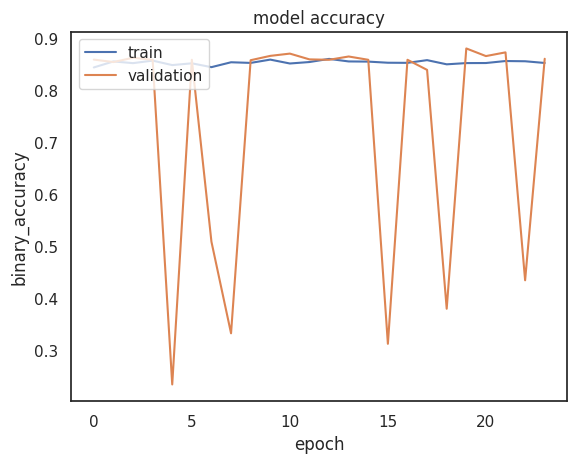

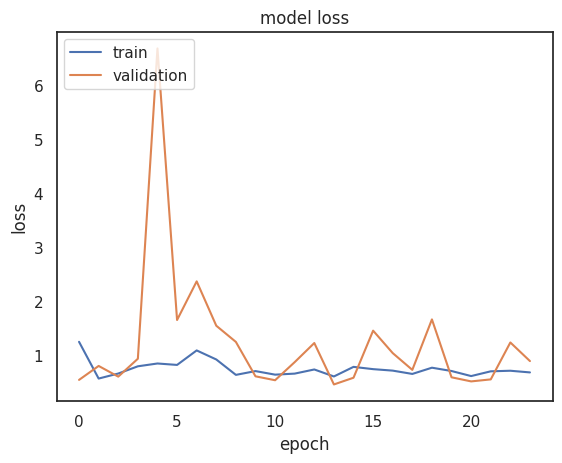

Best epoch: 20
Train Accuracy: 
277/277 [==============================] - 1s 4ms/step - loss: 0.4624 - binary_accuracy: 0.8590
Test Accuracy: 
40/40 [==============================] - 0s 4ms/step - loss: 0.4674 - binary_accuracy: 0.8599
Test loss: 0.4674183428287506
Test accuracy: 0.8598574995994568
40/40 [==============================] - 0s 3ms/step
[0.99445471 0.05524862]

0.5248516661390304

Confusion matrix:
[[1076    6]
 [ 171   10]]

Normalized confusion matrix:
[[0.99445471 0.00554529]
 [0.94475138 0.05524862]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.86      0.99      0.92      1082
     label 1       0.62      0.06      0.10       181

    accuracy                           0.86      1263
   macro avg       0.74      0.52      0.51      1263
weighted avg       0.83      0.86      0.81      1263

AUC-ROC: 0.5248516661390306
MCC: 0.15572029078202754
precision: 0.7439354450681637
recall: 0.5248516661390304
f1_score: 0.5

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Training time: 36.647406816482544 seconds


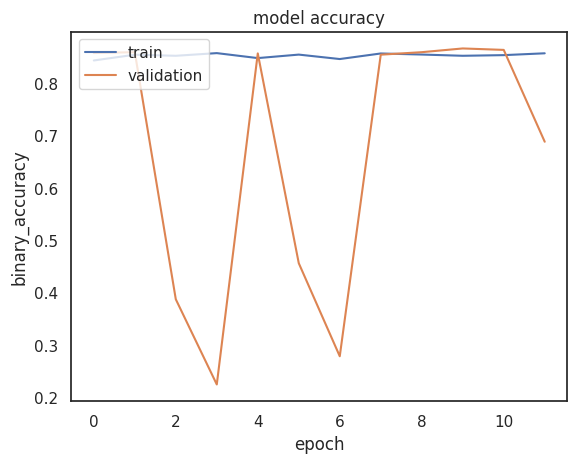

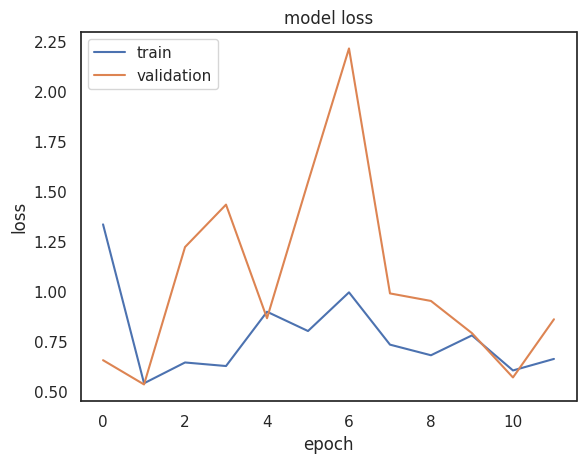

Best epoch: 10
Train Accuracy: 
277/277 [==============================] - 2s 7ms/step - loss: 0.5423 - binary_accuracy: 0.8575
Test Accuracy: 
40/40 [==============================] - 0s 7ms/step - loss: 0.5474 - binary_accuracy: 0.8599
Test loss: 0.5473933815956116
Test accuracy: 0.8598574995994568
40/40 [==============================] - 0s 6ms/step
[0.99445471 0.05524862]

0.5248516661390304

Confusion matrix:
[[1076    6]
 [ 171   10]]

Normalized confusion matrix:
[[0.99445471 0.00554529]
 [0.94475138 0.05524862]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.86      0.99      0.92      1082
     label 1       0.62      0.06      0.10       181

    accuracy                           0.86      1263
   macro avg       0.74      0.52      0.51      1263
weighted avg       0.83      0.86      0.81      1263

AUC-ROC: 0.5248516661390306
MCC: 0.15572029078202754
precision: 0.7439354450681637
recall: 0.5248516661390304
f1_score: 0.5

In [ ]:
epochs = 100
seed = 42

#Tuner
tuner1 = RandomSearch(
    build_model_tune1,
    objective = 'val_binary_accuracy',
    max_trials = 30,
    executions_per_trial = 5,
)

# not necessary to see it every time
tuner1.search_space_summary()

tuner1.search(X_train, y_train,
                epochs=50,
                batch_size=batch_size,
                class_weight = class_weights_example,
                verbose=1,
                validation_data=([X_val, y_val])
            )
tuner1.results_summary()

# Get the optimal hyperparameters
best_hps=tuner1.get_best_hyperparameters(num_trials=1)[0]
print()
print('best parameters that have been found: ')
show_best_hps()
print()

print()
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
tuned_model1 = tuner1.hypermodel.build(best_hps)
#sow only the model with best params
print(tuned_model1.summary())
global history

m = 'tunned_model_laser'
history = model_fit(tuned_model1, X_train, y_train, X_val, y_val)
results(tuned_model1, X_train, y_train, X_test, y_test)

tuned_model1.save(f"/content/gdrive/MyDrive/ExperimentalModels/ActiveLearning/1Layer_WB_tuned_FFNNmodel.h5")

print('Best epoch: %d' % (best_epoch,))
hypermodel1 = tuner1.hypermodel.build(best_hps)

# Retrain the model with best epoch
print()

print("Retrain the model with best hps and epoch: ")
print('Hypermodel: ')
m = 'hypermodel_laser'
model_fit(hypermodel1, X_train, y_train, X_val, y_val)
results(hypermodel1, X_train, y_train, X_test, y_test)
hypermodel1.save(f"/content/gdrive/MyDrive/ExperimentalModels/ActiveLearning/1Layer_WB_hypermodel_FFNNmodel.h5")



# CV sul modello a 1 layer tuned uscente da Random Search

In [ ]:
'''

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

accuracy_metric = tf.keras.metrics.BinaryAccuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[accuracy_metric, precision_metric, recall_metric, f1_score_metric])

'''

'\n\nfrom sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix\n\naccuracy_metric = tf.keras.metrics.BinaryAccuracy()\nprecision_metric = Precision()\nrecall_metric = Recall()\nf1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)\n\nmodel = tf.keras.Sequential([\n    tf.keras.Input(shape=(1024,)),\n    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),\n        tf.keras.layers.BatchNormalization(),\n        tf.keras.layers.Dropout(0.0),\n    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),\n])\n\nmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),\n              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),\n              metrics=[accuracy_metric, precision_metric, recall_metric, f1_score_metric])\n\n'

In [44]:
metrics = [accuracy_metric, precision_metric, recall_metric, f1_score_metric]

In [45]:
X_train.shape

(8835, 1024)

In [46]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/gdrive/MyDrive/ExperimentalModels/ActiveLearning/1Layer_WB_tuned_FFNNmodel.h5')

In [47]:

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn import datasets, linear_model
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer, log_loss

kfold = KFold(n_splits=10, shuffle=True)

keras_classifier = KerasClassifier(loaded_model, class_weight = class_weights_example, random_state= seed, metrics = metrics, validation_split=0.2, epochs=1000, batch_size=32, verbose=1, callbacks=callback)

scores = cross_val_predict(keras_classifier, X, y, cv=kfold)

scores


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


279/284 [============================>.] - ETA: 0s - loss: 3.2677 - binary_accuracy: 0.7371

284/284 [==============================] - 4s 11ms/step - loss: 3.2260 - binary_accuracy: 0.7385 - val_loss: 1.9024 - val_binary_accuracy: 0.2324
Epoch 2/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1784 - binary_accuracy: 0.7794

284/284 [==============================] - 2s 7ms/step - loss: 1.1754 - binary_accuracy: 0.7799 - val_loss: 2.6762 - val_binary_accuracy: 0.7628
Epoch 3/1000
283/284 [============================>.] - ETA: 0s - loss: 1.3271 - binary_accuracy: 0.7606

284/284 [==============================] - 2s 7ms/step - loss: 1.3266 - binary_accuracy: 0.7598 - val_loss: 1.6018 - val_binary_accuracy: 0.2883
Epoch 4/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0916 - binary_accuracy: 0.7670

284/284 [==============================] - 2s 8ms/step - loss: 1.0908 - binary_accuracy: 0.7684 - val_loss: 3.7331 - val_binary_accuracy: 0.4159
Epoch 5/1000
282/284 [============================>.] - ETA: 0s - loss: 1.2924 - binary_accuracy: 0.7604

284/284 [==============================] - 3s 11ms/step - loss: 1.2908 - binary_accuracy: 0.7610 - val_loss: 1.5160 - val_binary_accuracy: 0.2619
Epoch 6/1000
283/284 [============================>.] - ETA: 0s - loss: 0.7903 - binary_accuracy: 0.7758

284/284 [==============================] - 3s 10ms/step - loss: 0.7902 - binary_accuracy: 0.7758 - val_loss: 2.4876 - val_binary_accuracy: 0.7720
Epoch 7/1000
279/284 [============================>.] - ETA: 0s - loss: 0.8494 - binary_accuracy: 0.7688

284/284 [==============================] - 2s 8ms/step - loss: 0.8477 - binary_accuracy: 0.7689 - val_loss: 0.9323 - val_binary_accuracy: 0.5304
Epoch 8/1000
282/284 [============================>.] - ETA: 0s - loss: 0.7642 - binary_accuracy: 0.7776

284/284 [==============================] - 2s 7ms/step - loss: 0.7639 - binary_accuracy: 0.7783 - val_loss: 1.5044 - val_binary_accuracy: 0.7135
Epoch 9/1000
279/284 [============================>.] - ETA: 0s - loss: 0.7513 - binary_accuracy: 0.7808

284/284 [==============================] - 2s 8ms/step - loss: 0.7511 - binary_accuracy: 0.7799 - val_loss: 1.7207 - val_binary_accuracy: 0.2399
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9833 - binary_accuracy: 0.7656

284/284 [==============================] - 2s 7ms/step - loss: 0.9826 - binary_accuracy: 0.7652 - val_loss: 2.7335 - val_binary_accuracy: 0.7289
Epoch 11/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1485 - binary_accuracy: 0.7606

284/284 [==============================] - 3s 11ms/step - loss: 1.1473 - binary_accuracy: 0.7604 - val_loss: 1.5028 - val_binary_accuracy: 0.7069
Epoch 12/1000
277/284 [============================>.] - ETA: 0s - loss: 1.0888 - binary_accuracy: 0.7735

284/284 [==============================] - 2s 9ms/step - loss: 1.0970 - binary_accuracy: 0.7728 - val_loss: 2.9854 - val_binary_accuracy: 0.2421
Epoch 13/1000
278/284 [============================>.] - ETA: 0s - loss: 1.0924 - binary_accuracy: 0.7718

284/284 [==============================] - 2s 8ms/step - loss: 1.0868 - binary_accuracy: 0.7720 - val_loss: 1.4765 - val_binary_accuracy: 0.6092
Epoch 14/1000
280/284 [============================>.] - ETA: 0s - loss: 0.9944 - binary_accuracy: 0.7776

284/284 [==============================] - 3s 12ms/step - loss: 0.9949 - binary_accuracy: 0.7792 - val_loss: 1.4966 - val_binary_accuracy: 0.6818
Epoch 15/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0857 - binary_accuracy: 0.7754

284/284 [==============================] - 2s 8ms/step - loss: 1.0859 - binary_accuracy: 0.7757 - val_loss: 1.5230 - val_binary_accuracy: 0.4595
Epoch 16/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1777 - binary_accuracy: 0.7672

284/284 [==============================] - 3s 10ms/step - loss: 1.1761 - binary_accuracy: 0.7653 - val_loss: 3.4465 - val_binary_accuracy: 0.7672
Epoch 17/1000
276/284 [============================>.] - ETA: 0s - loss: 1.1761 - binary_accuracy: 0.7614

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


281/284 [============================>.] - ETA: 0s - loss: 2.0185 - binary_accuracy: 0.7306

284/284 [==============================] - 4s 10ms/step - loss: 2.0117 - binary_accuracy: 0.7318 - val_loss: 5.4816 - val_binary_accuracy: 0.7680
Epoch 2/1000
283/284 [============================>.] - ETA: 0s - loss: 1.4959 - binary_accuracy: 0.7501

284/284 [==============================] - 3s 11ms/step - loss: 1.4962 - binary_accuracy: 0.7503 - val_loss: 5.4940 - val_binary_accuracy: 0.7650
Epoch 3/1000
284/284 [==============================] - ETA: 0s - loss: 1.2384 - binary_accuracy: 0.7626

284/284 [==============================] - 3s 9ms/step - loss: 1.2384 - binary_accuracy: 0.7626 - val_loss: 1.2637 - val_binary_accuracy: 0.3706
Epoch 4/1000
277/284 [============================>.] - ETA: 0s - loss: 1.1465 - binary_accuracy: 0.7761

284/284 [==============================] - 2s 7ms/step - loss: 1.1600 - binary_accuracy: 0.7742 - val_loss: 2.3376 - val_binary_accuracy: 0.5106
Epoch 5/1000
279/284 [============================>.] - ETA: 0s - loss: 1.4086 - binary_accuracy: 0.7572

284/284 [==============================] - 2s 8ms/step - loss: 1.4039 - binary_accuracy: 0.7593 - val_loss: 1.5943 - val_binary_accuracy: 0.6919
Epoch 6/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1271 - binary_accuracy: 0.7607

284/284 [==============================] - 2s 7ms/step - loss: 1.1210 - binary_accuracy: 0.7623 - val_loss: 0.9932 - val_binary_accuracy: 0.5612
Epoch 7/1000
278/284 [============================>.] - ETA: 0s - loss: 0.8785 - binary_accuracy: 0.7802

284/284 [==============================] - 2s 7ms/step - loss: 0.8783 - binary_accuracy: 0.7784 - val_loss: 1.5737 - val_binary_accuracy: 0.7425
Epoch 8/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0749 - binary_accuracy: 0.7446

284/284 [==============================] - 3s 11ms/step - loss: 1.0711 - binary_accuracy: 0.7448 - val_loss: 1.1147 - val_binary_accuracy: 0.3948
Epoch 9/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9740 - binary_accuracy: 0.7725

284/284 [==============================] - 3s 9ms/step - loss: 0.9735 - binary_accuracy: 0.7703 - val_loss: 5.3577 - val_binary_accuracy: 0.7636
Epoch 10/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9511 - binary_accuracy: 0.7743

284/284 [==============================] - 2s 8ms/step - loss: 0.9560 - binary_accuracy: 0.7752 - val_loss: 1.7817 - val_binary_accuracy: 0.7284
Epoch 11/1000
278/284 [============================>.] - ETA: 0s - loss: 1.3433 - binary_accuracy: 0.7422

284/284 [==============================] - 2s 7ms/step - loss: 1.3365 - binary_accuracy: 0.7424 - val_loss: 1.9533 - val_binary_accuracy: 0.2601
Epoch 12/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0352 - binary_accuracy: 0.7664

284/284 [==============================] - 2s 8ms/step - loss: 1.0332 - binary_accuracy: 0.7674 - val_loss: 3.0575 - val_binary_accuracy: 0.7636
Epoch 13/1000
280/284 [============================>.] - ETA: 0s - loss: 0.9896 - binary_accuracy: 0.7807

284/284 [==============================] - 2s 8ms/step - loss: 0.9855 - binary_accuracy: 0.7821 - val_loss: 1.4718 - val_binary_accuracy: 0.7636
Epoch 14/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2642 - binary_accuracy: 0.7613

284/284 [==============================] - 3s 11ms/step - loss: 1.2667 - binary_accuracy: 0.7609 - val_loss: 1.9494 - val_binary_accuracy: 0.3992
Epoch 15/1000
284/284 [==============================] - ETA: 0s - loss: 1.4482 - binary_accuracy: 0.7335

284/284 [==============================] - 2s 8ms/step - loss: 1.4482 - binary_accuracy: 0.7335 - val_loss: 1.7323 - val_binary_accuracy: 0.7623
Epoch 16/1000
280/284 [============================>.] - ETA: 0s - loss: 1.3810 - binary_accuracy: 0.7366

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


282/284 [============================>.] - ETA: 0s - loss: 2.2058 - binary_accuracy: 0.7361

284/284 [==============================] - 4s 13ms/step - loss: 2.2055 - binary_accuracy: 0.7366 - val_loss: 5.6631 - val_binary_accuracy: 0.7619
Epoch 2/1000
282/284 [============================>.] - ETA: 0s - loss: 1.8393 - binary_accuracy: 0.7480

284/284 [==============================] - 3s 9ms/step - loss: 1.8328 - binary_accuracy: 0.7488 - val_loss: 2.4364 - val_binary_accuracy: 0.2368
Epoch 3/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1999 - binary_accuracy: 0.7609

284/284 [==============================] - 2s 8ms/step - loss: 1.1985 - binary_accuracy: 0.7607 - val_loss: 2.5342 - val_binary_accuracy: 0.2504
Epoch 4/1000
282/284 [============================>.] - ETA: 0s - loss: 1.2205 - binary_accuracy: 0.7522

284/284 [==============================] - 2s 7ms/step - loss: 1.2213 - binary_accuracy: 0.7511 - val_loss: 1.8847 - val_binary_accuracy: 0.7350
Epoch 5/1000
276/284 [============================>.] - ETA: 0s - loss: 1.1036 - binary_accuracy: 0.7661

284/284 [==============================] - 2s 7ms/step - loss: 1.0977 - binary_accuracy: 0.7645 - val_loss: 1.7276 - val_binary_accuracy: 0.2474
Epoch 6/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9750 - binary_accuracy: 0.7769

284/284 [==============================] - 2s 7ms/step - loss: 0.9744 - binary_accuracy: 0.7782 - val_loss: 1.8149 - val_binary_accuracy: 0.6923
Epoch 7/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9822 - binary_accuracy: 0.7603

284/284 [==============================] - 3s 10ms/step - loss: 0.9803 - binary_accuracy: 0.7609 - val_loss: 2.1302 - val_binary_accuracy: 0.7729
Epoch 8/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0245 - binary_accuracy: 0.7508

284/284 [==============================] - 3s 10ms/step - loss: 1.0231 - binary_accuracy: 0.7507 - val_loss: 1.4246 - val_binary_accuracy: 0.7113
Epoch 9/1000
284/284 [==============================] - ETA: 0s - loss: 1.1599 - binary_accuracy: 0.7605

284/284 [==============================] - 2s 7ms/step - loss: 1.1599 - binary_accuracy: 0.7605 - val_loss: 2.2044 - val_binary_accuracy: 0.7755
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8294 - binary_accuracy: 0.8010

284/284 [==============================] - 2s 7ms/step - loss: 0.8301 - binary_accuracy: 0.8008 - val_loss: 1.4519 - val_binary_accuracy: 0.5990
Epoch 11/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0132 - binary_accuracy: 0.7725

284/284 [==============================] - 2s 7ms/step - loss: 1.0115 - binary_accuracy: 0.7734 - val_loss: 2.3976 - val_binary_accuracy: 0.7680
Epoch 12/1000
280/284 [============================>.] - ETA: 0s - loss: 1.2329 - binary_accuracy: 0.7427

284/284 [==============================] - 2s 8ms/step - loss: 1.2296 - binary_accuracy: 0.7434 - val_loss: 1.3596 - val_binary_accuracy: 0.6241
Epoch 13/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0968 - binary_accuracy: 0.7644

284/284 [==============================] - 3s 10ms/step - loss: 1.0943 - binary_accuracy: 0.7643 - val_loss: 0.9947 - val_binary_accuracy: 0.4415
Epoch 14/1000
278/284 [============================>.] - ETA: 0s - loss: 1.1102 - binary_accuracy: 0.7645

284/284 [==============================] - 3s 10ms/step - loss: 1.1191 - binary_accuracy: 0.7628 - val_loss: 1.4688 - val_binary_accuracy: 0.5216
Epoch 15/1000
278/284 [============================>.] - ETA: 0s - loss: 1.1706 - binary_accuracy: 0.7561

284/284 [==============================] - 2s 7ms/step - loss: 1.1659 - binary_accuracy: 0.7533 - val_loss: 1.5271 - val_binary_accuracy: 0.7773
Epoch 16/1000
282/284 [============================>.] - ETA: 0s - loss: 0.8460 - binary_accuracy: 0.7817

284/284 [==============================] - 2s 7ms/step - loss: 0.8481 - binary_accuracy: 0.7821 - val_loss: 1.4562 - val_binary_accuracy: 0.7610
Epoch 17/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0804 - binary_accuracy: 0.7769

284/284 [==============================] - 2s 7ms/step - loss: 1.0818 - binary_accuracy: 0.7765 - val_loss: 2.3038 - val_binary_accuracy: 0.6967
Epoch 18/1000
284/284 [==============================] - ETA: 0s - loss: 1.2452 - binary_accuracy: 0.7487

284/284 [==============================] - 2s 7ms/step - loss: 1.2452 - binary_accuracy: 0.7487 - val_loss: 1.1284 - val_binary_accuracy: 0.7011
Epoch 19/1000
284/284 [==============================] - ETA: 0s - loss: 0.9372 - binary_accuracy: 0.7605

284/284 [==============================] - 2s 9ms/step - loss: 0.9372 - binary_accuracy: 0.7605 - val_loss: 0.9975 - val_binary_accuracy: 0.5273
Epoch 20/1000
283/284 [============================>.] - ETA: 0s - loss: 0.9881 - binary_accuracy: 0.7780

284/284 [==============================] - 3s 11ms/step - loss: 0.9876 - binary_accuracy: 0.7783 - val_loss: 3.3866 - val_binary_accuracy: 0.7645
Epoch 21/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9455 - binary_accuracy: 0.7724

284/284 [==============================] - 2s 7ms/step - loss: 0.9513 - binary_accuracy: 0.7722 - val_loss: 5.0432 - val_binary_accuracy: 0.7632
Epoch 22/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1390 - binary_accuracy: 0.7478

284/284 [==============================] - 2s 7ms/step - loss: 1.1338 - binary_accuracy: 0.7491 - val_loss: 1.1584 - val_binary_accuracy: 0.6540
Epoch 23/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1064 - binary_accuracy: 0.7570

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


280/284 [============================>.] - ETA: 0s - loss: 2.2059 - binary_accuracy: 0.7356

284/284 [==============================] - 5s 15ms/step - loss: 2.1978 - binary_accuracy: 0.7368 - val_loss: 1.7882 - val_binary_accuracy: 0.5475
Epoch 2/1000
280/284 [============================>.] - ETA: 0s - loss: 1.9044 - binary_accuracy: 0.7369

284/284 [==============================] - 3s 10ms/step - loss: 1.9165 - binary_accuracy: 0.7371 - val_loss: 16.3977 - val_binary_accuracy: 0.2337
Epoch 3/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1932 - binary_accuracy: 0.7705

284/284 [==============================] - 4s 14ms/step - loss: 1.1928 - binary_accuracy: 0.7712 - val_loss: 1.3498 - val_binary_accuracy: 0.7245
Epoch 4/1000
282/284 [============================>.] - ETA: 0s - loss: 1.2373 - binary_accuracy: 0.7588

284/284 [==============================] - 3s 11ms/step - loss: 1.2371 - binary_accuracy: 0.7564 - val_loss: 1.6060 - val_binary_accuracy: 0.2425
Epoch 5/1000
280/284 [============================>.] - ETA: 0s - loss: 1.2579 - binary_accuracy: 0.7653

284/284 [==============================] - 3s 9ms/step - loss: 1.2542 - binary_accuracy: 0.7643 - val_loss: 2.1869 - val_binary_accuracy: 0.7667
Epoch 6/1000
280/284 [============================>.] - ETA: 0s - loss: 0.9684 - binary_accuracy: 0.7669

284/284 [==============================] - 2s 7ms/step - loss: 0.9677 - binary_accuracy: 0.7654 - val_loss: 1.4181 - val_binary_accuracy: 0.7293
Epoch 7/1000
282/284 [============================>.] - ETA: 0s - loss: 0.8681 - binary_accuracy: 0.7719

284/284 [==============================] - 2s 8ms/step - loss: 0.8677 - binary_accuracy: 0.7722 - val_loss: 1.1278 - val_binary_accuracy: 0.7135
Epoch 8/1000
284/284 [==============================] - ETA: 0s - loss: 0.8373 - binary_accuracy: 0.7797

284/284 [==============================] - 2s 8ms/step - loss: 0.8373 - binary_accuracy: 0.7797 - val_loss: 3.3774 - val_binary_accuracy: 0.7425
Epoch 9/1000
277/284 [============================>.] - ETA: 0s - loss: 1.0949 - binary_accuracy: 0.7521

284/284 [==============================] - 2s 8ms/step - loss: 1.0994 - binary_accuracy: 0.7503 - val_loss: 3.8628 - val_binary_accuracy: 0.2491
Epoch 10/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1966 - binary_accuracy: 0.7350

284/284 [==============================] - 3s 12ms/step - loss: 1.1986 - binary_accuracy: 0.7358 - val_loss: 5.9817 - val_binary_accuracy: 0.7016
Epoch 11/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0030 - binary_accuracy: 0.7554

284/284 [==============================] - 2s 8ms/step - loss: 1.0011 - binary_accuracy: 0.7545 - val_loss: 1.0888 - val_binary_accuracy: 0.5031
Epoch 12/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9976 - binary_accuracy: 0.7675

284/284 [==============================] - 2s 7ms/step - loss: 0.9943 - binary_accuracy: 0.7679 - val_loss: 0.9857 - val_binary_accuracy: 0.6624
Epoch 13/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2946 - binary_accuracy: 0.7606

284/284 [==============================] - 2s 7ms/step - loss: 1.2899 - binary_accuracy: 0.7613 - val_loss: 1.1231 - val_binary_accuracy: 0.5453
Epoch 14/1000
278/284 [============================>.] - ETA: 0s - loss: 1.1714 - binary_accuracy: 0.7702

284/284 [==============================] - 2s 7ms/step - loss: 1.1694 - binary_accuracy: 0.7700 - val_loss: 3.0029 - val_binary_accuracy: 0.7421
Epoch 15/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1628 - binary_accuracy: 0.7733

284/284 [==============================] - 2s 8ms/step - loss: 1.1620 - binary_accuracy: 0.7732 - val_loss: 1.6067 - val_binary_accuracy: 0.4014
Epoch 16/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0910 - binary_accuracy: 0.7642

284/284 [==============================] - 3s 11ms/step - loss: 1.0897 - binary_accuracy: 0.7647 - val_loss: 2.9832 - val_binary_accuracy: 0.7557
Epoch 17/1000
280/284 [============================>.] - ETA: 0s - loss: 0.9949 - binary_accuracy: 0.7785

284/284 [==============================] - 2s 8ms/step - loss: 0.9899 - binary_accuracy: 0.7803 - val_loss: 2.3174 - val_binary_accuracy: 0.7636
Epoch 18/1000
278/284 [============================>.] - ETA: 0s - loss: 1.2301 - binary_accuracy: 0.7416

284/284 [==============================] - 2s 8ms/step - loss: 1.2294 - binary_accuracy: 0.7442 - val_loss: 3.2042 - val_binary_accuracy: 0.7548
Epoch 19/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1190 - binary_accuracy: 0.7579

284/284 [==============================] - 2s 8ms/step - loss: 1.1176 - binary_accuracy: 0.7586 - val_loss: 1.5145 - val_binary_accuracy: 0.7214
Epoch 20/1000
277/284 [============================>.] - ETA: 0s - loss: 1.0349 - binary_accuracy: 0.7525

284/284 [==============================] - 2s 7ms/step - loss: 1.0268 - binary_accuracy: 0.7534 - val_loss: 1.6298 - val_binary_accuracy: 0.2786
Epoch 21/1000
283/284 [============================>.] - ETA: 0s - loss: 0.9874 - binary_accuracy: 0.7633

284/284 [==============================] - 2s 8ms/step - loss: 0.9856 - binary_accuracy: 0.7640 - val_loss: 1.0597 - val_binary_accuracy: 0.6646
Epoch 22/1000
284/284 [==============================] - ETA: 0s - loss: 0.8860 - binary_accuracy: 0.7713

40/40 [==============================] - 0s 5ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


283/284 [============================>.] - ETA: 0s - loss: 2.5052 - binary_accuracy: 0.6990

284/284 [==============================] - 3s 10ms/step - loss: 2.5013 - binary_accuracy: 0.6988 - val_loss: 1.7000 - val_binary_accuracy: 0.6439
Epoch 2/1000
284/284 [==============================] - ETA: 0s - loss: 1.3187 - binary_accuracy: 0.7390

284/284 [==============================] - 2s 7ms/step - loss: 1.3187 - binary_accuracy: 0.7390 - val_loss: 1.2815 - val_binary_accuracy: 0.7029
Epoch 3/1000
280/284 [============================>.] - ETA: 0s - loss: 1.3899 - binary_accuracy: 0.7519

284/284 [==============================] - 3s 11ms/step - loss: 1.3925 - binary_accuracy: 0.7525 - val_loss: 2.4523 - val_binary_accuracy: 0.7077
Epoch 4/1000
279/284 [============================>.] - ETA: 0s - loss: 1.2854 - binary_accuracy: 0.7504

284/284 [==============================] - 2s 9ms/step - loss: 1.2909 - binary_accuracy: 0.7501 - val_loss: 2.3424 - val_binary_accuracy: 0.7663
Epoch 5/1000
280/284 [============================>.] - ETA: 0s - loss: 1.2910 - binary_accuracy: 0.7598

284/284 [==============================] - 2s 7ms/step - loss: 1.2977 - binary_accuracy: 0.7594 - val_loss: 5.2386 - val_binary_accuracy: 0.2469
Epoch 6/1000
278/284 [============================>.] - ETA: 0s - loss: 1.3489 - binary_accuracy: 0.7650

284/284 [==============================] - 2s 7ms/step - loss: 1.3469 - binary_accuracy: 0.7624 - val_loss: 1.8165 - val_binary_accuracy: 0.3939
Epoch 7/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9999 - binary_accuracy: 0.7551

284/284 [==============================] - 2s 8ms/step - loss: 1.0018 - binary_accuracy: 0.7534 - val_loss: 1.5011 - val_binary_accuracy: 0.2817
Epoch 8/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1233 - binary_accuracy: 0.7420

284/284 [==============================] - 2s 7ms/step - loss: 1.1157 - binary_accuracy: 0.7436 - val_loss: 1.8287 - val_binary_accuracy: 0.2478
Epoch 9/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0737 - binary_accuracy: 0.7442

284/284 [==============================] - 3s 11ms/step - loss: 1.0711 - binary_accuracy: 0.7444 - val_loss: 13.1079 - val_binary_accuracy: 0.7614
Epoch 10/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9499 - binary_accuracy: 0.7737

284/284 [==============================] - 3s 10ms/step - loss: 0.9557 - binary_accuracy: 0.7737 - val_loss: 1.3451 - val_binary_accuracy: 0.4547
Epoch 11/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0487 - binary_accuracy: 0.7680

284/284 [==============================] - 2s 7ms/step - loss: 1.0509 - binary_accuracy: 0.7687 - val_loss: 1.5542 - val_binary_accuracy: 0.5273
Epoch 12/1000
283/284 [============================>.] - ETA: 0s - loss: 0.9862 - binary_accuracy: 0.7739

284/284 [==============================] - 2s 7ms/step - loss: 0.9844 - binary_accuracy: 0.7745 - val_loss: 1.1082 - val_binary_accuracy: 0.3785
Epoch 13/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2387 - binary_accuracy: 0.7610

284/284 [==============================] - 2s 7ms/step - loss: 1.2413 - binary_accuracy: 0.7598 - val_loss: 1.7153 - val_binary_accuracy: 0.4252
Epoch 14/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1257 - binary_accuracy: 0.7665

284/284 [==============================] - 2s 7ms/step - loss: 1.1278 - binary_accuracy: 0.7662 - val_loss: 4.8063 - val_binary_accuracy: 0.2680
Epoch 15/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2531 - binary_accuracy: 0.7518

284/284 [==============================] - 3s 11ms/step - loss: 1.2559 - binary_accuracy: 0.7519 - val_loss: 1.7498 - val_binary_accuracy: 0.6690
Epoch 16/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1660 - binary_accuracy: 0.7553

284/284 [==============================] - 3s 9ms/step - loss: 1.1645 - binary_accuracy: 0.7555 - val_loss: 1.3418 - val_binary_accuracy: 0.2654
Epoch 17/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8849 - binary_accuracy: 0.7736

284/284 [==============================] - 2s 7ms/step - loss: 0.8849 - binary_accuracy: 0.7740 - val_loss: 2.8371 - val_binary_accuracy: 0.7694
Epoch 18/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0559 - binary_accuracy: 0.7665

284/284 [==============================] - 2s 7ms/step - loss: 1.0544 - binary_accuracy: 0.7649 - val_loss: 1.8782 - val_binary_accuracy: 0.7680
Epoch 19/1000
277/284 [============================>.] - ETA: 0s - loss: 1.0443 - binary_accuracy: 0.7656

284/284 [==============================] - 2s 8ms/step - loss: 1.0505 - binary_accuracy: 0.7646 - val_loss: 1.8441 - val_binary_accuracy: 0.2584
Epoch 20/1000
284/284 [==============================] - ETA: 0s - loss: 0.8799 - binary_accuracy: 0.7785

284/284 [==============================] - 2s 8ms/step - loss: 0.8799 - binary_accuracy: 0.7785 - val_loss: 1.3149 - val_binary_accuracy: 0.7227
Epoch 21/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0345 - binary_accuracy: 0.7599

284/284 [==============================] - 3s 10ms/step - loss: 1.0335 - binary_accuracy: 0.7597 - val_loss: 2.1804 - val_binary_accuracy: 0.2408
Epoch 22/1000
277/284 [============================>.] - ETA: 0s - loss: 1.0442 - binary_accuracy: 0.7720

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


284/284 [==============================] - ETA: 0s - loss: 2.6808 - binary_accuracy: 0.7217

284/284 [==============================] - 3s 10ms/step - loss: 2.6808 - binary_accuracy: 0.7217 - val_loss: 3.3471 - val_binary_accuracy: 0.7227
Epoch 2/1000
281/284 [============================>.] - ETA: 0s - loss: 2.5216 - binary_accuracy: 0.7338

284/284 [==============================] - 3s 10ms/step - loss: 2.5109 - binary_accuracy: 0.7338 - val_loss: 2.2684 - val_binary_accuracy: 0.4960
Epoch 3/1000
279/284 [============================>.] - ETA: 0s - loss: 0.9817 - binary_accuracy: 0.7786

284/284 [==============================] - 3s 10ms/step - loss: 0.9771 - binary_accuracy: 0.7787 - val_loss: 1.1042 - val_binary_accuracy: 0.6642
Epoch 4/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0485 - binary_accuracy: 0.7837

284/284 [==============================] - 2s 7ms/step - loss: 1.0505 - binary_accuracy: 0.7839 - val_loss: 1.8622 - val_binary_accuracy: 0.2848
Epoch 5/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9613 - binary_accuracy: 0.7796

284/284 [==============================] - 2s 7ms/step - loss: 0.9635 - binary_accuracy: 0.7778 - val_loss: 1.1387 - val_binary_accuracy: 0.6008
Epoch 6/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0984 - binary_accuracy: 0.7634

284/284 [==============================] - 2s 7ms/step - loss: 1.0970 - binary_accuracy: 0.7628 - val_loss: 1.7852 - val_binary_accuracy: 0.7632
Epoch 7/1000
284/284 [==============================] - ETA: 0s - loss: 0.9342 - binary_accuracy: 0.7609

284/284 [==============================] - 2s 8ms/step - loss: 0.9342 - binary_accuracy: 0.7609 - val_loss: 1.7144 - val_binary_accuracy: 0.6659
Epoch 8/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8420 - binary_accuracy: 0.7830

284/284 [==============================] - 3s 10ms/step - loss: 0.8398 - binary_accuracy: 0.7831 - val_loss: 1.2292 - val_binary_accuracy: 0.2905
Epoch 9/1000
281/284 [============================>.] - ETA: 0s - loss: 0.7532 - binary_accuracy: 0.7785

284/284 [==============================] - 3s 10ms/step - loss: 0.7564 - binary_accuracy: 0.7789 - val_loss: 1.6744 - val_binary_accuracy: 0.2434
Epoch 10/1000
280/284 [============================>.] - ETA: 0s - loss: 0.8020 - binary_accuracy: 0.7653

284/284 [==============================] - 2s 7ms/step - loss: 0.8053 - binary_accuracy: 0.7655 - val_loss: 3.6698 - val_binary_accuracy: 0.2434
Epoch 11/1000
278/284 [============================>.] - ETA: 0s - loss: 1.2092 - binary_accuracy: 0.7543

284/284 [==============================] - 2s 7ms/step - loss: 1.2032 - binary_accuracy: 0.7544 - val_loss: 1.4050 - val_binary_accuracy: 0.7584
Epoch 12/1000
283/284 [============================>.] - ETA: 0s - loss: 1.6691 - binary_accuracy: 0.7383

284/284 [==============================] - 2s 8ms/step - loss: 1.6668 - binary_accuracy: 0.7387 - val_loss: 1.5146 - val_binary_accuracy: 0.6703
Epoch 13/1000
278/284 [============================>.] - ETA: 0s - loss: 1.1662 - binary_accuracy: 0.7664

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


284/284 [==============================] - ETA: 0s - loss: 2.8127 - binary_accuracy: 0.7293

284/284 [==============================] - 3s 10ms/step - loss: 2.8127 - binary_accuracy: 0.7293 - val_loss: 3.7546 - val_binary_accuracy: 0.7720
Epoch 2/1000
278/284 [============================>.] - ETA: 0s - loss: 1.3001 - binary_accuracy: 0.7688

284/284 [==============================] - 2s 7ms/step - loss: 1.3367 - binary_accuracy: 0.7690 - val_loss: 8.9664 - val_binary_accuracy: 0.7658
Epoch 3/1000
280/284 [============================>.] - ETA: 0s - loss: 1.2958 - binary_accuracy: 0.7683

284/284 [==============================] - 2s 7ms/step - loss: 1.2958 - binary_accuracy: 0.7657 - val_loss: 1.1862 - val_binary_accuracy: 0.4133
Epoch 4/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0305 - binary_accuracy: 0.7722

284/284 [==============================] - 3s 10ms/step - loss: 1.0276 - binary_accuracy: 0.7728 - val_loss: 1.6088 - val_binary_accuracy: 0.2958
Epoch 5/1000
282/284 [============================>.] - ETA: 0s - loss: 1.3468 - binary_accuracy: 0.7599

284/284 [==============================] - 3s 10ms/step - loss: 1.3465 - binary_accuracy: 0.7600 - val_loss: 4.6559 - val_binary_accuracy: 0.7597
Epoch 6/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0081 - binary_accuracy: 0.7605

284/284 [==============================] - 2s 7ms/step - loss: 1.0072 - binary_accuracy: 0.7608 - val_loss: 1.2606 - val_binary_accuracy: 0.7047
Epoch 7/1000
284/284 [==============================] - ETA: 0s - loss: 0.7585 - binary_accuracy: 0.7710

284/284 [==============================] - 2s 7ms/step - loss: 0.7585 - binary_accuracy: 0.7710 - val_loss: 0.9247 - val_binary_accuracy: 0.4802
Epoch 8/1000
278/284 [============================>.] - ETA: 0s - loss: 0.7321 - binary_accuracy: 0.7757

284/284 [==============================] - 2s 7ms/step - loss: 0.7303 - binary_accuracy: 0.7765 - val_loss: 0.9281 - val_binary_accuracy: 0.6404
Epoch 9/1000
278/284 [============================>.] - ETA: 0s - loss: 0.8810 - binary_accuracy: 0.7733

284/284 [==============================] - 2s 7ms/step - loss: 0.8787 - binary_accuracy: 0.7719 - val_loss: 1.2695 - val_binary_accuracy: 0.3442
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9959 - binary_accuracy: 0.7708

284/284 [==============================] - 3s 9ms/step - loss: 0.9962 - binary_accuracy: 0.7721 - val_loss: 1.0365 - val_binary_accuracy: 0.6312
Epoch 11/1000
284/284 [==============================] - ETA: 0s - loss: 1.2653 - binary_accuracy: 0.7629

284/284 [==============================] - 3s 11ms/step - loss: 1.2653 - binary_accuracy: 0.7629 - val_loss: 1.2456 - val_binary_accuracy: 0.4718
Epoch 12/1000
282/284 [============================>.] - ETA: 0s - loss: 0.8561 - binary_accuracy: 0.7838

284/284 [==============================] - 2s 7ms/step - loss: 0.8560 - binary_accuracy: 0.7836 - val_loss: 1.2014 - val_binary_accuracy: 0.3389
Epoch 13/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1127 - binary_accuracy: 0.7624

284/284 [==============================] - 2s 7ms/step - loss: 1.1130 - binary_accuracy: 0.7632 - val_loss: 2.6473 - val_binary_accuracy: 0.7623
Epoch 14/1000
277/284 [============================>.] - ETA: 0s - loss: 1.4898 - binary_accuracy: 0.7516

284/284 [==============================] - 2s 7ms/step - loss: 1.5035 - binary_accuracy: 0.7530 - val_loss: 5.2002 - val_binary_accuracy: 0.7588
Epoch 15/1000
283/284 [============================>.] - ETA: 0s - loss: 1.4104 - binary_accuracy: 0.7540

284/284 [==============================] - 2s 7ms/step - loss: 1.4101 - binary_accuracy: 0.7536 - val_loss: 1.6806 - val_binary_accuracy: 0.6585
Epoch 16/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9107 - binary_accuracy: 0.7791

284/284 [==============================] - 3s 9ms/step - loss: 0.9114 - binary_accuracy: 0.7775 - val_loss: 1.1326 - val_binary_accuracy: 0.7099
Epoch 17/1000
279/284 [============================>.] - ETA: 0s - loss: 0.9468 - binary_accuracy: 0.7611

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


281/284 [============================>.] - ETA: 0s - loss: 2.6015 - binary_accuracy: 0.7352

284/284 [==============================] - 4s 11ms/step - loss: 2.5867 - binary_accuracy: 0.7354 - val_loss: 3.6602 - val_binary_accuracy: 0.2355
Epoch 2/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1909 - binary_accuracy: 0.7623

284/284 [==============================] - 2s 8ms/step - loss: 1.2017 - binary_accuracy: 0.7623 - val_loss: 5.4545 - val_binary_accuracy: 0.5687
Epoch 3/1000
283/284 [============================>.] - ETA: 0s - loss: 1.2847 - binary_accuracy: 0.7757

284/284 [==============================] - 3s 11ms/step - loss: 1.2838 - binary_accuracy: 0.7756 - val_loss: 1.8810 - val_binary_accuracy: 0.3160
Epoch 4/1000
284/284 [==============================] - ETA: 0s - loss: 1.2531 - binary_accuracy: 0.7596

284/284 [==============================] - 2s 7ms/step - loss: 1.2531 - binary_accuracy: 0.7596 - val_loss: 1.6830 - val_binary_accuracy: 0.7271
Epoch 5/1000
283/284 [============================>.] - ETA: 0s - loss: 1.2698 - binary_accuracy: 0.7617

284/284 [==============================] - 2s 8ms/step - loss: 1.2718 - binary_accuracy: 0.7612 - val_loss: 5.6995 - val_binary_accuracy: 0.2355
Epoch 6/1000
279/284 [============================>.] - ETA: 0s - loss: 1.1236 - binary_accuracy: 0.7537

284/284 [==============================] - 2s 7ms/step - loss: 1.1181 - binary_accuracy: 0.7552 - val_loss: 1.1330 - val_binary_accuracy: 0.3446
Epoch 7/1000
282/284 [============================>.] - ETA: 0s - loss: 0.8954 - binary_accuracy: 0.7920

284/284 [==============================] - 2s 8ms/step - loss: 0.9033 - binary_accuracy: 0.7915 - val_loss: 8.1980 - val_binary_accuracy: 0.7597
Epoch 8/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0033 - binary_accuracy: 0.7569

284/284 [==============================] - 2s 9ms/step - loss: 1.0054 - binary_accuracy: 0.7564 - val_loss: 2.0766 - val_binary_accuracy: 0.6184
Epoch 9/1000
280/284 [============================>.] - ETA: 0s - loss: 0.9354 - binary_accuracy: 0.7616

284/284 [==============================] - 3s 11ms/step - loss: 0.9416 - binary_accuracy: 0.7631 - val_loss: 1.2892 - val_binary_accuracy: 0.5647
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9160 - binary_accuracy: 0.7740

284/284 [==============================] - 2s 8ms/step - loss: 0.9162 - binary_accuracy: 0.7738 - val_loss: 1.8996 - val_binary_accuracy: 0.2746
Epoch 11/1000
278/284 [============================>.] - ETA: 0s - loss: 1.2278 - binary_accuracy: 0.7690

284/284 [==============================] - 2s 7ms/step - loss: 1.2240 - binary_accuracy: 0.7695 - val_loss: 3.9474 - val_binary_accuracy: 0.7579
Epoch 12/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0062 - binary_accuracy: 0.7740

284/284 [==============================] - 2s 7ms/step - loss: 1.0071 - binary_accuracy: 0.7728 - val_loss: 10.3577 - val_binary_accuracy: 0.2469
Epoch 13/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2577 - binary_accuracy: 0.7586

284/284 [==============================] - 2s 7ms/step - loss: 1.2606 - binary_accuracy: 0.7592 - val_loss: 2.0844 - val_binary_accuracy: 0.4415
Epoch 14/1000
284/284 [==============================] - ETA: 0s - loss: 0.9605 - binary_accuracy: 0.7750

284/284 [==============================] - 2s 8ms/step - loss: 0.9605 - binary_accuracy: 0.7750 - val_loss: 1.2523 - val_binary_accuracy: 0.5471
Epoch 15/1000
284/284 [==============================] - ETA: 0s - loss: 1.1785 - binary_accuracy: 0.7671

284/284 [==============================] - 3s 11ms/step - loss: 1.1785 - binary_accuracy: 0.7671 - val_loss: 1.4137 - val_binary_accuracy: 0.3257
Epoch 16/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9856 - binary_accuracy: 0.7658

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


278/284 [============================>.] - ETA: 0s - loss: 2.4697 - binary_accuracy: 0.6944

284/284 [==============================] - 4s 12ms/step - loss: 2.4664 - binary_accuracy: 0.6944 - val_loss: 3.6185 - val_binary_accuracy: 0.7689
Epoch 2/1000
279/284 [============================>.] - ETA: 0s - loss: 1.4678 - binary_accuracy: 0.7322

284/284 [==============================] - 3s 12ms/step - loss: 1.4742 - binary_accuracy: 0.7296 - val_loss: 3.9913 - val_binary_accuracy: 0.6589
Epoch 3/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2482 - binary_accuracy: 0.7557

284/284 [==============================] - 2s 8ms/step - loss: 1.2443 - binary_accuracy: 0.7569 - val_loss: 1.4863 - val_binary_accuracy: 0.6875
Epoch 4/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2187 - binary_accuracy: 0.7631

284/284 [==============================] - 2s 8ms/step - loss: 1.2180 - binary_accuracy: 0.7620 - val_loss: 1.4269 - val_binary_accuracy: 0.6039
Epoch 5/1000
283/284 [============================>.] - ETA: 0s - loss: 1.4221 - binary_accuracy: 0.7554

284/284 [==============================] - 2s 8ms/step - loss: 1.4223 - binary_accuracy: 0.7557 - val_loss: 4.5997 - val_binary_accuracy: 0.7676
Epoch 6/1000
278/284 [============================>.] - ETA: 0s - loss: 1.0444 - binary_accuracy: 0.7679

284/284 [==============================] - 2s 8ms/step - loss: 1.0431 - binary_accuracy: 0.7678 - val_loss: 1.6103 - val_binary_accuracy: 0.7667
Epoch 7/1000
284/284 [==============================] - ETA: 0s - loss: 1.0925 - binary_accuracy: 0.7643

284/284 [==============================] - 3s 11ms/step - loss: 1.0925 - binary_accuracy: 0.7643 - val_loss: 1.5535 - val_binary_accuracy: 0.5335
Epoch 8/1000
278/284 [============================>.] - ETA: 0s - loss: 1.0277 - binary_accuracy: 0.7565

284/284 [==============================] - 3s 10ms/step - loss: 1.0288 - binary_accuracy: 0.7557 - val_loss: 2.2669 - val_binary_accuracy: 0.2482
Epoch 9/1000
278/284 [============================>.] - ETA: 0s - loss: 0.8754 - binary_accuracy: 0.7574

284/284 [==============================] - 2s 8ms/step - loss: 0.8730 - binary_accuracy: 0.7587 - val_loss: 1.0889 - val_binary_accuracy: 0.5224
Epoch 10/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8483 - binary_accuracy: 0.7645

284/284 [==============================] - 2s 8ms/step - loss: 0.8475 - binary_accuracy: 0.7647 - val_loss: 1.4072 - val_binary_accuracy: 0.5982
Epoch 11/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1743 - binary_accuracy: 0.7662

284/284 [==============================] - 2s 8ms/step - loss: 1.1743 - binary_accuracy: 0.7665 - val_loss: 1.8481 - val_binary_accuracy: 0.2945
Epoch 12/1000
281/284 [============================>.] - ETA: 0s - loss: 1.6496 - binary_accuracy: 0.7477

284/284 [==============================] - 2s 8ms/step - loss: 1.6460 - binary_accuracy: 0.7476 - val_loss: 2.8224 - val_binary_accuracy: 0.7676
Epoch 13/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9988 - binary_accuracy: 0.7803

284/284 [==============================] - 3s 12ms/step - loss: 1.0015 - binary_accuracy: 0.7801 - val_loss: 1.4716 - val_binary_accuracy: 0.7438
Epoch 14/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9884 - binary_accuracy: 0.7896

284/284 [==============================] - 3s 9ms/step - loss: 0.9871 - binary_accuracy: 0.7901 - val_loss: 1.3177 - val_binary_accuracy: 0.6901
Epoch 15/1000
280/284 [============================>.] - ETA: 0s - loss: 1.3575 - binary_accuracy: 0.7481

284/284 [==============================] - 2s 8ms/step - loss: 1.3527 - binary_accuracy: 0.7498 - val_loss: 1.8891 - val_binary_accuracy: 0.6624
Epoch 16/1000
279/284 [============================>.] - ETA: 0s - loss: 1.0207 - binary_accuracy: 0.7651

284/284 [==============================] - 2s 8ms/step - loss: 1.0161 - binary_accuracy: 0.7632 - val_loss: 1.9471 - val_binary_accuracy: 0.7672
Epoch 17/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9514 - binary_accuracy: 0.7692

284/284 [==============================] - 2s 8ms/step - loss: 0.9527 - binary_accuracy: 0.7701 - val_loss: 3.3271 - val_binary_accuracy: 0.7654
Epoch 18/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1937 - binary_accuracy: 0.7591

284/284 [==============================] - 3s 9ms/step - loss: 1.1906 - binary_accuracy: 0.7600 - val_loss: 1.3472 - val_binary_accuracy: 0.6835
Epoch 19/1000
282/284 [============================>.] - ETA: 0s - loss: 0.8715 - binary_accuracy: 0.7845

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


284/284 [==============================] - ETA: 0s - loss: 2.0775 - binary_accuracy: 0.7409

284/284 [==============================] - 4s 11ms/step - loss: 2.0775 - binary_accuracy: 0.7409 - val_loss: 22.9550 - val_binary_accuracy: 0.7689
Epoch 2/1000
280/284 [============================>.] - ETA: 0s - loss: 1.4306 - binary_accuracy: 0.7504

284/284 [==============================] - 2s 7ms/step - loss: 1.4314 - binary_accuracy: 0.7515 - val_loss: 5.0116 - val_binary_accuracy: 0.7694
Epoch 3/1000
278/284 [============================>.] - ETA: 0s - loss: 1.4301 - binary_accuracy: 0.7456

284/284 [==============================] - 2s 8ms/step - loss: 1.4281 - binary_accuracy: 0.7449 - val_loss: 6.4500 - val_binary_accuracy: 0.2333
Epoch 4/1000
284/284 [==============================] - ETA: 0s - loss: 1.1628 - binary_accuracy: 0.7628

284/284 [==============================] - 2s 8ms/step - loss: 1.1628 - binary_accuracy: 0.7628 - val_loss: 1.5157 - val_binary_accuracy: 0.7399
Epoch 5/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1626 - binary_accuracy: 0.7676

284/284 [==============================] - 3s 11ms/step - loss: 1.1573 - binary_accuracy: 0.7673 - val_loss: 2.3339 - val_binary_accuracy: 0.7720
Epoch 6/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1306 - binary_accuracy: 0.7575

284/284 [==============================] - 3s 9ms/step - loss: 1.1246 - binary_accuracy: 0.7574 - val_loss: 1.4504 - val_binary_accuracy: 0.7641
Epoch 7/1000
284/284 [==============================] - ETA: 0s - loss: 1.0037 - binary_accuracy: 0.7650

284/284 [==============================] - 2s 8ms/step - loss: 1.0037 - binary_accuracy: 0.7650 - val_loss: 1.4813 - val_binary_accuracy: 0.7152
Epoch 8/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0470 - binary_accuracy: 0.7637

284/284 [==============================] - 2s 7ms/step - loss: 1.0463 - binary_accuracy: 0.7641 - val_loss: 1.1687 - val_binary_accuracy: 0.4820
Epoch 9/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9929 - binary_accuracy: 0.7617

284/284 [==============================] - 2s 8ms/step - loss: 0.9874 - binary_accuracy: 0.7632 - val_loss: 1.4776 - val_binary_accuracy: 0.7777
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9384 - binary_accuracy: 0.7760

284/284 [==============================] - 2s 8ms/step - loss: 0.9385 - binary_accuracy: 0.7749 - val_loss: 1.6847 - val_binary_accuracy: 0.7619
Epoch 11/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0944 - binary_accuracy: 0.7541

284/284 [==============================] - 3s 11ms/step - loss: 1.0936 - binary_accuracy: 0.7545 - val_loss: 1.3875 - val_binary_accuracy: 0.2786
Epoch 12/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9802 - binary_accuracy: 0.7845

284/284 [==============================] - 2s 9ms/step - loss: 0.9789 - binary_accuracy: 0.7849 - val_loss: 1.3214 - val_binary_accuracy: 0.7223
Epoch 13/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9744 - binary_accuracy: 0.7706

284/284 [==============================] - 2s 7ms/step - loss: 0.9842 - binary_accuracy: 0.7678 - val_loss: 2.5113 - val_binary_accuracy: 0.7676
Epoch 14/1000
281/284 [============================>.] - ETA: 0s - loss: 1.2337 - binary_accuracy: 0.7559

284/284 [==============================] - 2s 7ms/step - loss: 1.2347 - binary_accuracy: 0.7569 - val_loss: 1.3315 - val_binary_accuracy: 0.5827
Epoch 15/1000
278/284 [============================>.] - ETA: 0s - loss: 1.3085 - binary_accuracy: 0.7570

284/284 [==============================] - 2s 8ms/step - loss: 1.3003 - binary_accuracy: 0.7578 - val_loss: 1.3091 - val_binary_accuracy: 0.7526
Epoch 16/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0745 - binary_accuracy: 0.7509

284/284 [==============================] - 2s 8ms/step - loss: 1.0718 - binary_accuracy: 0.7483 - val_loss: 1.1973 - val_binary_accuracy: 0.6056
Epoch 17/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0060 - binary_accuracy: 0.7553

284/284 [==============================] - 3s 12ms/step - loss: 1.0048 - binary_accuracy: 0.7559 - val_loss: 5.2221 - val_binary_accuracy: 0.7443
Epoch 18/1000
279/284 [============================>.] - ETA: 0s - loss: 1.1057 - binary_accuracy: 0.7631

40/40 [==============================] - 0s 2ms/step


array([0, 1, 0, ..., 1, 1, 0])

In [48]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
import time

# Compute confusion matrix
def confusion(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    loss = log_loss(y_test, predictions)

    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)
    print('Test loss:', loss)

In [49]:

confusion( y, scores)

[0.67096954 0.83710895]

0.7540392464948683

Confusion matrix:
[[7225 3543]
 [ 302 1552]]

Normalized confusion matrix:
[[0.67096954 0.32903046]
 [0.16289105 0.83710895]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.96      0.67      0.79     10768
     label 1       0.30      0.84      0.45      1854

    accuracy                           0.70     12622
   macro avg       0.63      0.75      0.62     12622
weighted avg       0.86      0.70      0.74     12622

AUC-ROC: 0.7540392464948684
MCC: 0.3665811655493997
precision: 0.632245069206532
recall: 0.7540392464948683
f1_score: 0.6182581318756563
Test loss: 10.979864306857507


# CV sul modello a 1 layer hypermodel uscente da Random Search

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/gdrive/MyDrive/ExperimentalModels/ActiveLearning/1Layer_WB_hypermodel_FFNNmodel.h5')

In [ ]:

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn import datasets, linear_model
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

kfold = KFold(n_splits=10, shuffle=True)

keras_classifier = KerasClassifier(loaded_model, class_weight = class_weights_example, random_state= seed, metrics = metrics, validation_split=0.2, epochs=1000, batch_size=32, verbose=1, callbacks=callback)

scores = cross_val_predict(keras_classifier, X, y, cv=kfold)

scores


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


282/284 [============================>.] - ETA: 0s - loss: 4.4118 - binary_accuracy: 0.7211

284/284 [==============================] - 4s 10ms/step - loss: 4.3961 - binary_accuracy: 0.7219 - val_loss: 2.8119 - val_binary_accuracy: 0.4331
Epoch 2/1000
282/284 [============================>.] - ETA: 0s - loss: 1.2864 - binary_accuracy: 0.7677

284/284 [==============================] - 4s 12ms/step - loss: 1.2857 - binary_accuracy: 0.7679 - val_loss: 1.8956 - val_binary_accuracy: 0.4798
Epoch 3/1000
280/284 [============================>.] - ETA: 0s - loss: 1.2901 - binary_accuracy: 0.7549

284/284 [==============================] - 2s 7ms/step - loss: 1.2904 - binary_accuracy: 0.7565 - val_loss: 4.7923 - val_binary_accuracy: 0.5753
Epoch 4/1000
276/284 [============================>.] - ETA: 0s - loss: 1.2694 - binary_accuracy: 0.7675

284/284 [==============================] - 2s 7ms/step - loss: 1.2588 - binary_accuracy: 0.7658 - val_loss: 3.5270 - val_binary_accuracy: 0.7337
Epoch 5/1000
277/284 [============================>.] - ETA: 0s - loss: 0.8830 - binary_accuracy: 0.7727

284/284 [==============================] - 2s 7ms/step - loss: 0.8853 - binary_accuracy: 0.7730 - val_loss: 1.3559 - val_binary_accuracy: 0.6505
Epoch 6/1000
284/284 [==============================] - ETA: 0s - loss: 0.9167 - binary_accuracy: 0.7670

284/284 [==============================] - 2s 7ms/step - loss: 0.9167 - binary_accuracy: 0.7670 - val_loss: 2.3755 - val_binary_accuracy: 0.2333
Epoch 7/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9774 - binary_accuracy: 0.7790

284/284 [==============================] - 2s 8ms/step - loss: 0.9834 - binary_accuracy: 0.7789 - val_loss: 2.1838 - val_binary_accuracy: 0.3050
Epoch 8/1000
284/284 [==============================] - ETA: 0s - loss: 0.8775 - binary_accuracy: 0.7849

284/284 [==============================] - 3s 11ms/step - loss: 0.8775 - binary_accuracy: 0.7849 - val_loss: 2.5510 - val_binary_accuracy: 0.7632
Epoch 9/1000
279/284 [============================>.] - ETA: 0s - loss: 1.1707 - binary_accuracy: 0.7544

284/284 [==============================] - 2s 7ms/step - loss: 1.1644 - binary_accuracy: 0.7555 - val_loss: 1.9274 - val_binary_accuracy: 0.2487
Epoch 10/1000
279/284 [============================>.] - ETA: 0s - loss: 1.3150 - binary_accuracy: 0.7638

284/284 [==============================] - 2s 8ms/step - loss: 1.3103 - binary_accuracy: 0.7638 - val_loss: 1.7594 - val_binary_accuracy: 0.7513
Epoch 11/1000
276/284 [============================>.] - ETA: 0s - loss: 1.4965 - binary_accuracy: 0.7469

284/284 [==============================] - 2s 7ms/step - loss: 1.4950 - binary_accuracy: 0.7462 - val_loss: 1.5336 - val_binary_accuracy: 0.5938
Epoch 12/1000
279/284 [============================>.] - ETA: 0s - loss: 1.1059 - binary_accuracy: 0.7681

284/284 [==============================] - 2s 7ms/step - loss: 1.1061 - binary_accuracy: 0.7679 - val_loss: 1.8117 - val_binary_accuracy: 0.7566
Epoch 13/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0050 - binary_accuracy: 0.7581

284/284 [==============================] - 3s 9ms/step - loss: 1.0067 - binary_accuracy: 0.7587 - val_loss: 5.9135 - val_binary_accuracy: 0.7654
Epoch 14/1000
284/284 [==============================] - ETA: 0s - loss: 0.9541 - binary_accuracy: 0.7674

284/284 [==============================] - 3s 11ms/step - loss: 0.9541 - binary_accuracy: 0.7674 - val_loss: 1.6290 - val_binary_accuracy: 0.6026
Epoch 15/1000
277/284 [============================>.] - ETA: 0s - loss: 1.1589 - binary_accuracy: 0.7618

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


279/284 [============================>.] - ETA: 0s - loss: 3.3962 - binary_accuracy: 0.7257

284/284 [==============================] - 4s 11ms/step - loss: 3.3570 - binary_accuracy: 0.7281 - val_loss: 11.5011 - val_binary_accuracy: 0.7676
Epoch 2/1000
282/284 [============================>.] - ETA: 0s - loss: 1.5494 - binary_accuracy: 0.7650

284/284 [==============================] - 2s 7ms/step - loss: 1.5466 - binary_accuracy: 0.7647 - val_loss: 1.3896 - val_binary_accuracy: 0.4798
Epoch 3/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1514 - binary_accuracy: 0.7685

284/284 [==============================] - 2s 8ms/step - loss: 1.1620 - binary_accuracy: 0.7677 - val_loss: 4.0622 - val_binary_accuracy: 0.7390
Epoch 4/1000
277/284 [============================>.] - ETA: 0s - loss: 1.1905 - binary_accuracy: 0.7543

284/284 [==============================] - 2s 7ms/step - loss: 1.1983 - binary_accuracy: 0.7543 - val_loss: 1.6157 - val_binary_accuracy: 0.4749
Epoch 5/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1572 - binary_accuracy: 0.7724

284/284 [==============================] - 3s 11ms/step - loss: 1.1575 - binary_accuracy: 0.7722 - val_loss: 2.0599 - val_binary_accuracy: 0.4098
Epoch 6/1000
284/284 [==============================] - ETA: 0s - loss: 0.9797 - binary_accuracy: 0.7860

284/284 [==============================] - 2s 8ms/step - loss: 0.9797 - binary_accuracy: 0.7860 - val_loss: 1.0414 - val_binary_accuracy: 0.4811
Epoch 7/1000
279/284 [============================>.] - ETA: 0s - loss: 0.7642 - binary_accuracy: 0.7867

284/284 [==============================] - 2s 7ms/step - loss: 0.7639 - binary_accuracy: 0.7883 - val_loss: 1.1157 - val_binary_accuracy: 0.7390
Epoch 8/1000
279/284 [============================>.] - ETA: 0s - loss: 0.7997 - binary_accuracy: 0.7867

284/284 [==============================] - 2s 7ms/step - loss: 0.8007 - binary_accuracy: 0.7880 - val_loss: 1.9702 - val_binary_accuracy: 0.7654
Epoch 9/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9816 - binary_accuracy: 0.7683

284/284 [==============================] - 2s 7ms/step - loss: 0.9881 - binary_accuracy: 0.7671 - val_loss: 4.5143 - val_binary_accuracy: 0.2324
Epoch 10/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1070 - binary_accuracy: 0.7628

284/284 [==============================] - 2s 7ms/step - loss: 1.1050 - binary_accuracy: 0.7635 - val_loss: 1.9498 - val_binary_accuracy: 0.7711
Epoch 11/1000
283/284 [============================>.] - ETA: 0s - loss: 1.7981 - binary_accuracy: 0.7513

284/284 [==============================] - 3s 11ms/step - loss: 1.7976 - binary_accuracy: 0.7516 - val_loss: 2.7697 - val_binary_accuracy: 0.7333
Epoch 12/1000
284/284 [==============================] - ETA: 0s - loss: 1.2288 - binary_accuracy: 0.7446

284/284 [==============================] - 2s 8ms/step - loss: 1.2288 - binary_accuracy: 0.7446 - val_loss: 1.6230 - val_binary_accuracy: 0.5088
Epoch 13/1000
277/284 [============================>.] - ETA: 0s - loss: 1.2240 - binary_accuracy: 0.7682

284/284 [==============================] - 2s 7ms/step - loss: 1.2212 - binary_accuracy: 0.7685 - val_loss: 1.5695 - val_binary_accuracy: 0.6576
Epoch 14/1000
283/284 [============================>.] - ETA: 0s - loss: 1.2443 - binary_accuracy: 0.7549

284/284 [==============================] - 2s 7ms/step - loss: 1.2419 - binary_accuracy: 0.7553 - val_loss: 3.4410 - val_binary_accuracy: 0.7667
Epoch 15/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9286 - binary_accuracy: 0.7834

284/284 [==============================] - 2s 7ms/step - loss: 0.9288 - binary_accuracy: 0.7831 - val_loss: 1.2123 - val_binary_accuracy: 0.7526
Epoch 16/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9511 - binary_accuracy: 0.7684

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


284/284 [==============================] - ETA: 0s - loss: 3.9625 - binary_accuracy: 0.7244

284/284 [==============================] - 3s 10ms/step - loss: 3.9625 - binary_accuracy: 0.7244 - val_loss: 5.2578 - val_binary_accuracy: 0.7667
Epoch 2/1000
283/284 [============================>.] - ETA: 0s - loss: 1.9726 - binary_accuracy: 0.7470

284/284 [==============================] - 2s 7ms/step - loss: 1.9683 - binary_accuracy: 0.7471 - val_loss: 4.7619 - val_binary_accuracy: 0.2337
Epoch 3/1000
277/284 [============================>.] - ETA: 0s - loss: 0.9661 - binary_accuracy: 0.7856

284/284 [==============================] - 2s 7ms/step - loss: 0.9707 - binary_accuracy: 0.7827 - val_loss: 2.1055 - val_binary_accuracy: 0.7672
Epoch 4/1000
284/284 [==============================] - ETA: 0s - loss: 1.1059 - binary_accuracy: 0.7613

284/284 [==============================] - 3s 10ms/step - loss: 1.1059 - binary_accuracy: 0.7613 - val_loss: 1.4558 - val_binary_accuracy: 0.3063
Epoch 5/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8685 - binary_accuracy: 0.7673

284/284 [==============================] - 3s 9ms/step - loss: 0.8678 - binary_accuracy: 0.7672 - val_loss: 1.0497 - val_binary_accuracy: 0.5678
Epoch 6/1000
280/284 [============================>.] - ETA: 0s - loss: 0.7447 - binary_accuracy: 0.8046

284/284 [==============================] - 2s 7ms/step - loss: 0.7434 - binary_accuracy: 0.8046 - val_loss: 1.1227 - val_binary_accuracy: 0.3614
Epoch 7/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8941 - binary_accuracy: 0.7698

284/284 [==============================] - 2s 7ms/step - loss: 0.8928 - binary_accuracy: 0.7704 - val_loss: 1.4228 - val_binary_accuracy: 0.5414
Epoch 8/1000
276/284 [============================>.] - ETA: 0s - loss: 0.9637 - binary_accuracy: 0.7703

284/284 [==============================] - 2s 7ms/step - loss: 0.9596 - binary_accuracy: 0.7687 - val_loss: 0.9952 - val_binary_accuracy: 0.3702
Epoch 9/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8817 - binary_accuracy: 0.7746

284/284 [==============================] - 2s 7ms/step - loss: 0.8824 - binary_accuracy: 0.7742 - val_loss: 1.9715 - val_binary_accuracy: 0.3266
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1461 - binary_accuracy: 0.7453

284/284 [==============================] - 2s 9ms/step - loss: 1.1464 - binary_accuracy: 0.7439 - val_loss: 4.0007 - val_binary_accuracy: 0.7531
Epoch 11/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1330 - binary_accuracy: 0.7663

284/284 [==============================] - 3s 10ms/step - loss: 1.1349 - binary_accuracy: 0.7666 - val_loss: 1.8299 - val_binary_accuracy: 0.3737
Epoch 12/1000
284/284 [==============================] - ETA: 0s - loss: 1.1284 - binary_accuracy: 0.7633

284/284 [==============================] - 2s 7ms/step - loss: 1.1284 - binary_accuracy: 0.7633 - val_loss: 5.4752 - val_binary_accuracy: 0.7663
Epoch 13/1000
280/284 [============================>.] - ETA: 0s - loss: 1.4431 - binary_accuracy: 0.7498

284/284 [==============================] - 2s 7ms/step - loss: 1.4390 - binary_accuracy: 0.7488 - val_loss: 2.0405 - val_binary_accuracy: 0.7650
Epoch 14/1000
279/284 [============================>.] - ETA: 0s - loss: 1.1355 - binary_accuracy: 0.7703

284/284 [==============================] - 2s 7ms/step - loss: 1.1361 - binary_accuracy: 0.7704 - val_loss: 1.8539 - val_binary_accuracy: 0.4784
Epoch 15/1000
284/284 [==============================] - ETA: 0s - loss: 1.2479 - binary_accuracy: 0.7476

284/284 [==============================] - 2s 7ms/step - loss: 1.2479 - binary_accuracy: 0.7476 - val_loss: 1.1991 - val_binary_accuracy: 0.3433
Epoch 16/1000
284/284 [==============================] - ETA: 0s - loss: 0.7441 - binary_accuracy: 0.7931

284/284 [==============================] - 2s 8ms/step - loss: 0.7441 - binary_accuracy: 0.7931 - val_loss: 1.2436 - val_binary_accuracy: 0.2702
Epoch 17/1000
283/284 [============================>.] - ETA: 0s - loss: 0.9915 - binary_accuracy: 0.7719

284/284 [==============================] - 3s 11ms/step - loss: 0.9903 - binary_accuracy: 0.7720 - val_loss: 1.8298 - val_binary_accuracy: 0.2350
Epoch 18/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1333 - binary_accuracy: 0.7622

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


282/284 [============================>.] - ETA: 0s - loss: 3.7313 - binary_accuracy: 0.7250

284/284 [==============================] - 3s 10ms/step - loss: 3.7206 - binary_accuracy: 0.7255 - val_loss: 2.5512 - val_binary_accuracy: 0.6875
Epoch 2/1000
283/284 [============================>.] - ETA: 0s - loss: 1.8445 - binary_accuracy: 0.7490

284/284 [==============================] - 3s 11ms/step - loss: 1.8406 - binary_accuracy: 0.7493 - val_loss: 1.2565 - val_binary_accuracy: 0.7636
Epoch 3/1000
283/284 [============================>.] - ETA: 0s - loss: 1.2790 - binary_accuracy: 0.7665

284/284 [==============================] - 2s 7ms/step - loss: 1.2776 - binary_accuracy: 0.7663 - val_loss: 3.9354 - val_binary_accuracy: 0.7632
Epoch 4/1000
284/284 [==============================] - ETA: 0s - loss: 0.9638 - binary_accuracy: 0.7805

284/284 [==============================] - 2s 7ms/step - loss: 0.9638 - binary_accuracy: 0.7805 - val_loss: 2.1741 - val_binary_accuracy: 0.7619
Epoch 5/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0961 - binary_accuracy: 0.7597

284/284 [==============================] - 2s 7ms/step - loss: 1.0955 - binary_accuracy: 0.7589 - val_loss: 1.5642 - val_binary_accuracy: 0.2509
Epoch 6/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8975 - binary_accuracy: 0.7747

284/284 [==============================] - 2s 7ms/step - loss: 0.8943 - binary_accuracy: 0.7752 - val_loss: 1.2144 - val_binary_accuracy: 0.6501
Epoch 7/1000
283/284 [============================>.] - ETA: 0s - loss: 0.9006 - binary_accuracy: 0.7550

284/284 [==============================] - 2s 7ms/step - loss: 0.8998 - binary_accuracy: 0.7555 - val_loss: 1.1845 - val_binary_accuracy: 0.4305
Epoch 8/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8302 - binary_accuracy: 0.7693

284/284 [==============================] - 3s 11ms/step - loss: 0.8292 - binary_accuracy: 0.7696 - val_loss: 1.4262 - val_binary_accuracy: 0.3349
Epoch 9/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0547 - binary_accuracy: 0.7691

284/284 [==============================] - 2s 7ms/step - loss: 1.0536 - binary_accuracy: 0.7691 - val_loss: 1.5541 - val_binary_accuracy: 0.7201
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1391 - binary_accuracy: 0.7547

284/284 [==============================] - 2s 6ms/step - loss: 1.1400 - binary_accuracy: 0.7559 - val_loss: 1.5793 - val_binary_accuracy: 0.3059
Epoch 11/1000
278/284 [============================>.] - ETA: 0s - loss: 1.6764 - binary_accuracy: 0.7437

284/284 [==============================] - 2s 7ms/step - loss: 1.6632 - binary_accuracy: 0.7457 - val_loss: 1.2839 - val_binary_accuracy: 0.5018
Epoch 12/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1868 - binary_accuracy: 0.7523

284/284 [==============================] - 2s 7ms/step - loss: 1.1855 - binary_accuracy: 0.7522 - val_loss: 1.3130 - val_binary_accuracy: 0.6100
Epoch 13/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1795 - binary_accuracy: 0.7595

284/284 [==============================] - 2s 7ms/step - loss: 1.1801 - binary_accuracy: 0.7585 - val_loss: 6.6237 - val_binary_accuracy: 0.2390
Epoch 14/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1995 - binary_accuracy: 0.7659

284/284 [==============================] - 3s 9ms/step - loss: 1.1958 - binary_accuracy: 0.7658 - val_loss: 3.3281 - val_binary_accuracy: 0.7579
Epoch 15/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9097 - binary_accuracy: 0.7697

284/284 [==============================] - 3s 9ms/step - loss: 0.9079 - binary_accuracy: 0.7700 - val_loss: 1.7330 - val_binary_accuracy: 0.2676
Epoch 16/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8877 - binary_accuracy: 0.7795

284/284 [==============================] - 2s 7ms/step - loss: 0.8880 - binary_accuracy: 0.7787 - val_loss: 2.4379 - val_binary_accuracy: 0.2592
Epoch 17/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9429 - binary_accuracy: 0.7587

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


282/284 [============================>.] - ETA: 0s - loss: 5.6874 - binary_accuracy: 0.7100

284/284 [==============================] - 6s 14ms/step - loss: 5.6652 - binary_accuracy: 0.7108 - val_loss: 4.0221 - val_binary_accuracy: 0.3508
Epoch 2/1000
278/284 [============================>.] - ETA: 0s - loss: 1.3372 - binary_accuracy: 0.7689

284/284 [==============================] - 2s 7ms/step - loss: 1.3352 - binary_accuracy: 0.7699 - val_loss: 1.7584 - val_binary_accuracy: 0.7632
Epoch 3/1000
277/284 [============================>.] - ETA: 0s - loss: 1.0694 - binary_accuracy: 0.7711

284/284 [==============================] - 2s 7ms/step - loss: 1.0640 - binary_accuracy: 0.7731 - val_loss: 1.2656 - val_binary_accuracy: 0.4287
Epoch 4/1000
284/284 [==============================] - ETA: 0s - loss: 1.1919 - binary_accuracy: 0.7721

284/284 [==============================] - 2s 7ms/step - loss: 1.1919 - binary_accuracy: 0.7721 - val_loss: 2.2877 - val_binary_accuracy: 0.7108
Epoch 5/1000
284/284 [==============================] - ETA: 0s - loss: 1.0461 - binary_accuracy: 0.7902

284/284 [==============================] - 2s 7ms/step - loss: 1.0461 - binary_accuracy: 0.7902 - val_loss: 1.3385 - val_binary_accuracy: 0.5106
Epoch 6/1000
284/284 [==============================] - ETA: 0s - loss: 0.8770 - binary_accuracy: 0.7715

284/284 [==============================] - 3s 10ms/step - loss: 0.8770 - binary_accuracy: 0.7715 - val_loss: 4.1539 - val_binary_accuracy: 0.7663
Epoch 7/1000
284/284 [==============================] - ETA: 0s - loss: 0.9900 - binary_accuracy: 0.7664

284/284 [==============================] - 3s 10ms/step - loss: 0.9900 - binary_accuracy: 0.7664 - val_loss: 1.3580 - val_binary_accuracy: 0.3719
Epoch 8/1000
279/284 [============================>.] - ETA: 0s - loss: 1.0637 - binary_accuracy: 0.7481

284/284 [==============================] - 2s 7ms/step - loss: 1.0628 - binary_accuracy: 0.7471 - val_loss: 1.9991 - val_binary_accuracy: 0.7729
Epoch 9/1000
279/284 [============================>.] - ETA: 0s - loss: 1.1194 - binary_accuracy: 0.7615

284/284 [==============================] - 2s 7ms/step - loss: 1.1167 - binary_accuracy: 0.7631 - val_loss: 2.8697 - val_binary_accuracy: 0.2830
Epoch 10/1000
278/284 [============================>.] - ETA: 0s - loss: 1.0987 - binary_accuracy: 0.7653

284/284 [==============================] - 2s 7ms/step - loss: 1.1016 - binary_accuracy: 0.7679 - val_loss: 2.1976 - val_binary_accuracy: 0.3024
Epoch 11/1000
279/284 [============================>.] - ETA: 0s - loss: 1.2171 - binary_accuracy: 0.7571

284/284 [==============================] - 2s 7ms/step - loss: 1.2078 - binary_accuracy: 0.7595 - val_loss: 1.4760 - val_binary_accuracy: 0.7469
Epoch 12/1000
283/284 [============================>.] - ETA: 0s - loss: 1.2254 - binary_accuracy: 0.7668

284/284 [==============================] - 2s 8ms/step - loss: 1.2271 - binary_accuracy: 0.7662 - val_loss: 2.7125 - val_binary_accuracy: 0.2636
Epoch 13/1000
280/284 [============================>.] - ETA: 0s - loss: 1.4686 - binary_accuracy: 0.7556

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


279/284 [============================>.] - ETA: 0s - loss: 3.4457 - binary_accuracy: 0.7170

284/284 [==============================] - 3s 10ms/step - loss: 3.4160 - binary_accuracy: 0.7168 - val_loss: 2.4562 - val_binary_accuracy: 0.7513
Epoch 2/1000
282/284 [============================>.] - ETA: 0s - loss: 1.5044 - binary_accuracy: 0.7713

284/284 [==============================] - 2s 8ms/step - loss: 1.5045 - binary_accuracy: 0.7707 - val_loss: 2.2293 - val_binary_accuracy: 0.2610
Epoch 3/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1255 - binary_accuracy: 0.7658

284/284 [==============================] - 3s 11ms/step - loss: 1.1283 - binary_accuracy: 0.7658 - val_loss: 7.8576 - val_binary_accuracy: 0.7654
Epoch 4/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1132 - binary_accuracy: 0.7781

284/284 [==============================] - 2s 7ms/step - loss: 1.1103 - binary_accuracy: 0.7789 - val_loss: 2.8370 - val_binary_accuracy: 0.4221
Epoch 5/1000
284/284 [==============================] - ETA: 0s - loss: 1.2030 - binary_accuracy: 0.7482

284/284 [==============================] - 2s 7ms/step - loss: 1.2030 - binary_accuracy: 0.7482 - val_loss: 2.1838 - val_binary_accuracy: 0.7672
Epoch 6/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8468 - binary_accuracy: 0.7739

284/284 [==============================] - 2s 7ms/step - loss: 0.8479 - binary_accuracy: 0.7737 - val_loss: 1.1766 - val_binary_accuracy: 0.3473
Epoch 7/1000
278/284 [============================>.] - ETA: 0s - loss: 0.8755 - binary_accuracy: 0.7732

284/284 [==============================] - 2s 7ms/step - loss: 0.8760 - binary_accuracy: 0.7719 - val_loss: 1.5750 - val_binary_accuracy: 0.2984
Epoch 8/1000
276/284 [============================>.] - ETA: 0s - loss: 0.9572 - binary_accuracy: 0.7575

284/284 [==============================] - 2s 7ms/step - loss: 0.9619 - binary_accuracy: 0.7570 - val_loss: 1.3564 - val_binary_accuracy: 0.3495
Epoch 9/1000
280/284 [============================>.] - ETA: 0s - loss: 1.6551 - binary_accuracy: 0.7513

284/284 [==============================] - 3s 12ms/step - loss: 1.6672 - binary_accuracy: 0.7496 - val_loss: 22.2339 - val_binary_accuracy: 0.7654
Epoch 10/1000
280/284 [============================>.] - ETA: 0s - loss: 1.3317 - binary_accuracy: 0.7570

284/284 [==============================] - 2s 7ms/step - loss: 1.3262 - binary_accuracy: 0.7572 - val_loss: 1.3275 - val_binary_accuracy: 0.7614
Epoch 11/1000
279/284 [============================>.] - ETA: 0s - loss: 0.9432 - binary_accuracy: 0.7912

284/284 [==============================] - 2s 7ms/step - loss: 0.9434 - binary_accuracy: 0.7897 - val_loss: 1.0922 - val_binary_accuracy: 0.4745
Epoch 12/1000
277/284 [============================>.] - ETA: 0s - loss: 1.3589 - binary_accuracy: 0.7616

284/284 [==============================] - 2s 7ms/step - loss: 1.3663 - binary_accuracy: 0.7623 - val_loss: 4.5255 - val_binary_accuracy: 0.7654
Epoch 13/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1007 - binary_accuracy: 0.7681

284/284 [==============================] - 2s 7ms/step - loss: 1.0986 - binary_accuracy: 0.7682 - val_loss: 1.6882 - val_binary_accuracy: 0.6008
Epoch 14/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9829 - binary_accuracy: 0.7895

284/284 [==============================] - 2s 8ms/step - loss: 0.9889 - binary_accuracy: 0.7886 - val_loss: 2.2157 - val_binary_accuracy: 0.6356
Epoch 15/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0639 - binary_accuracy: 0.7656

284/284 [==============================] - 3s 12ms/step - loss: 1.0633 - binary_accuracy: 0.7655 - val_loss: 1.3430 - val_binary_accuracy: 0.4428
Epoch 16/1000
280/284 [============================>.] - ETA: 0s - loss: 1.0101 - binary_accuracy: 0.7661

284/284 [==============================] - 2s 8ms/step - loss: 1.0254 - binary_accuracy: 0.7642 - val_loss: 6.7375 - val_binary_accuracy: 0.7676
Epoch 17/1000
278/284 [============================>.] - ETA: 0s - loss: 1.0430 - binary_accuracy: 0.7566

284/284 [==============================] - 2s 8ms/step - loss: 1.0368 - binary_accuracy: 0.7590 - val_loss: 2.2940 - val_binary_accuracy: 0.7584
Epoch 18/1000
283/284 [============================>.] - ETA: 0s - loss: 0.9687 - binary_accuracy: 0.7631

284/284 [==============================] - 2s 7ms/step - loss: 0.9714 - binary_accuracy: 0.7623 - val_loss: 2.6153 - val_binary_accuracy: 0.2460
Epoch 19/1000
282/284 [============================>.] - ETA: 0s - loss: 1.2895 - binary_accuracy: 0.7522

284/284 [==============================] - 2s 7ms/step - loss: 1.2906 - binary_accuracy: 0.7528 - val_loss: 2.0662 - val_binary_accuracy: 0.3200
Epoch 20/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1296 - binary_accuracy: 0.7705

284/284 [==============================] - 2s 9ms/step - loss: 1.1345 - binary_accuracy: 0.7687 - val_loss: 3.2177 - val_binary_accuracy: 0.7623
Epoch 21/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0857 - binary_accuracy: 0.7747

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


284/284 [==============================] - ETA: 0s - loss: 3.1387 - binary_accuracy: 0.7391

284/284 [==============================] - 3s 10ms/step - loss: 3.1387 - binary_accuracy: 0.7391 - val_loss: 2.3482 - val_binary_accuracy: 0.2350
Epoch 2/1000
279/284 [============================>.] - ETA: 0s - loss: 1.8457 - binary_accuracy: 0.7578

284/284 [==============================] - 2s 7ms/step - loss: 1.8422 - binary_accuracy: 0.7569 - val_loss: 2.0131 - val_binary_accuracy: 0.7482
Epoch 3/1000
279/284 [============================>.] - ETA: 0s - loss: 1.4973 - binary_accuracy: 0.7443

284/284 [==============================] - 2s 7ms/step - loss: 1.4889 - binary_accuracy: 0.7452 - val_loss: 2.7319 - val_binary_accuracy: 0.2443
Epoch 4/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9641 - binary_accuracy: 0.7777

284/284 [==============================] - 2s 8ms/step - loss: 0.9636 - binary_accuracy: 0.7786 - val_loss: 1.7448 - val_binary_accuracy: 0.3468
Epoch 5/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9653 - binary_accuracy: 0.7635

284/284 [==============================] - 3s 11ms/step - loss: 0.9631 - binary_accuracy: 0.7621 - val_loss: 0.9895 - val_binary_accuracy: 0.5568
Epoch 6/1000
277/284 [============================>.] - ETA: 0s - loss: 0.8863 - binary_accuracy: 0.7875

284/284 [==============================] - 2s 7ms/step - loss: 0.8797 - binary_accuracy: 0.7882 - val_loss: 0.9255 - val_binary_accuracy: 0.4635
Epoch 7/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9784 - binary_accuracy: 0.7742

284/284 [==============================] - 2s 7ms/step - loss: 0.9858 - binary_accuracy: 0.7719 - val_loss: 3.3427 - val_binary_accuracy: 0.6518
Epoch 8/1000
280/284 [============================>.] - ETA: 0s - loss: 0.8465 - binary_accuracy: 0.7741

284/284 [==============================] - 2s 7ms/step - loss: 0.8481 - binary_accuracy: 0.7748 - val_loss: 1.3117 - val_binary_accuracy: 0.7091
Epoch 9/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1139 - binary_accuracy: 0.7487

284/284 [==============================] - 2s 7ms/step - loss: 1.1107 - binary_accuracy: 0.7483 - val_loss: 1.2331 - val_binary_accuracy: 0.7192
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0234 - binary_accuracy: 0.7621

284/284 [==============================] - 2s 7ms/step - loss: 1.0300 - binary_accuracy: 0.7609 - val_loss: 2.4743 - val_binary_accuracy: 0.7086
Epoch 11/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1678 - binary_accuracy: 0.7630

284/284 [==============================] - 3s 10ms/step - loss: 1.1659 - binary_accuracy: 0.7633 - val_loss: 1.0661 - val_binary_accuracy: 0.5651
Epoch 12/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0023 - binary_accuracy: 0.7758

284/284 [==============================] - 3s 9ms/step - loss: 1.0053 - binary_accuracy: 0.7750 - val_loss: 1.6813 - val_binary_accuracy: 0.6109
Epoch 13/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0316 - binary_accuracy: 0.7725

284/284 [==============================] - 2s 7ms/step - loss: 1.0328 - binary_accuracy: 0.7727 - val_loss: 4.3401 - val_binary_accuracy: 0.2359
Epoch 14/1000
276/284 [============================>.] - ETA: 0s - loss: 0.9423 - binary_accuracy: 0.7807

284/284 [==============================] - 2s 7ms/step - loss: 0.9442 - binary_accuracy: 0.7787 - val_loss: 1.4580 - val_binary_accuracy: 0.7738
Epoch 15/1000
277/284 [============================>.] - ETA: 0s - loss: 1.2655 - binary_accuracy: 0.7588

284/284 [==============================] - 2s 7ms/step - loss: 1.2554 - binary_accuracy: 0.7577 - val_loss: 1.9568 - val_binary_accuracy: 0.2408
Epoch 16/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1076 - binary_accuracy: 0.7639

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


281/284 [============================>.] - ETA: 0s - loss: 3.4630 - binary_accuracy: 0.7182

284/284 [==============================] - 3s 10ms/step - loss: 3.4586 - binary_accuracy: 0.7191 - val_loss: 26.8622 - val_binary_accuracy: 0.7667
Epoch 2/1000
278/284 [============================>.] - ETA: 0s - loss: 1.3741 - binary_accuracy: 0.7697

284/284 [==============================] - 2s 7ms/step - loss: 1.3994 - binary_accuracy: 0.7706 - val_loss: 4.6828 - val_binary_accuracy: 0.6937
Epoch 3/1000
280/284 [============================>.] - ETA: 0s - loss: 1.1795 - binary_accuracy: 0.7666

284/284 [==============================] - 2s 7ms/step - loss: 1.1779 - binary_accuracy: 0.7658 - val_loss: 1.3353 - val_binary_accuracy: 0.5761
Epoch 4/1000
281/284 [============================>.] - ETA: 0s - loss: 1.3262 - binary_accuracy: 0.7620

284/284 [==============================] - 2s 9ms/step - loss: 1.3222 - binary_accuracy: 0.7622 - val_loss: 1.3450 - val_binary_accuracy: 0.7223
Epoch 5/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0115 - binary_accuracy: 0.7832

284/284 [==============================] - 3s 11ms/step - loss: 1.0117 - binary_accuracy: 0.7831 - val_loss: 1.4821 - val_binary_accuracy: 0.5801
Epoch 6/1000
284/284 [==============================] - ETA: 0s - loss: 0.8634 - binary_accuracy: 0.7805

284/284 [==============================] - 2s 7ms/step - loss: 0.8634 - binary_accuracy: 0.7805 - val_loss: 1.2274 - val_binary_accuracy: 0.3856
Epoch 7/1000
278/284 [============================>.] - ETA: 0s - loss: 0.9987 - binary_accuracy: 0.7746

284/284 [==============================] - 2s 7ms/step - loss: 0.9984 - binary_accuracy: 0.7751 - val_loss: 7.1147 - val_binary_accuracy: 0.7601
Epoch 8/1000
279/284 [============================>.] - ETA: 0s - loss: 1.0449 - binary_accuracy: 0.7722

284/284 [==============================] - 2s 7ms/step - loss: 1.0478 - binary_accuracy: 0.7704 - val_loss: 1.3911 - val_binary_accuracy: 0.7469
Epoch 9/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0641 - binary_accuracy: 0.7837

284/284 [==============================] - 2s 7ms/step - loss: 1.0681 - binary_accuracy: 0.7817 - val_loss: 5.9241 - val_binary_accuracy: 0.7619
Epoch 10/1000
281/284 [============================>.] - ETA: 0s - loss: 1.3636 - binary_accuracy: 0.7670

284/284 [==============================] - 2s 8ms/step - loss: 1.3626 - binary_accuracy: 0.7651 - val_loss: 3.3462 - val_binary_accuracy: 0.7738
Epoch 11/1000
282/284 [============================>.] - ETA: 0s - loss: 1.3370 - binary_accuracy: 0.7611

284/284 [==============================] - 3s 11ms/step - loss: 1.3372 - binary_accuracy: 0.7594 - val_loss: 3.7038 - val_binary_accuracy: 0.2443
Epoch 12/1000
280/284 [============================>.] - ETA: 0s - loss: 1.5656 - binary_accuracy: 0.7658

284/284 [==============================] - 2s 6ms/step - loss: 1.5656 - binary_accuracy: 0.7668 - val_loss: 2.3924 - val_binary_accuracy: 0.4776
Epoch 13/1000
276/284 [============================>.] - ETA: 0s - loss: 1.0495 - binary_accuracy: 0.7757

284/284 [==============================] - 2s 7ms/step - loss: 1.0427 - binary_accuracy: 0.7756 - val_loss: 1.6830 - val_binary_accuracy: 0.7540
Epoch 14/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8369 - binary_accuracy: 0.7947

284/284 [==============================] - 2s 7ms/step - loss: 0.8425 - binary_accuracy: 0.7931 - val_loss: 7.5837 - val_binary_accuracy: 0.2905
Epoch 15/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9268 - binary_accuracy: 0.7870

284/284 [==============================] - 2s 7ms/step - loss: 0.9308 - binary_accuracy: 0.7869 - val_loss: 1.9073 - val_binary_accuracy: 0.2689
Epoch 16/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0408 - binary_accuracy: 0.7645

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


282/284 [============================>.] - ETA: 0s - loss: 5.2237 - binary_accuracy: 0.7182

284/284 [==============================] - 3s 9ms/step - loss: 5.1960 - binary_accuracy: 0.7176 - val_loss: 1.8750 - val_binary_accuracy: 0.7548
Epoch 2/1000
277/284 [============================>.] - ETA: 0s - loss: 1.1988 - binary_accuracy: 0.7623

284/284 [==============================] - 2s 7ms/step - loss: 1.1880 - binary_accuracy: 0.7601 - val_loss: 2.1586 - val_binary_accuracy: 0.7729
Epoch 3/1000
277/284 [============================>.] - ETA: 0s - loss: 1.2846 - binary_accuracy: 0.7567

284/284 [==============================] - 2s 7ms/step - loss: 1.2884 - binary_accuracy: 0.7575 - val_loss: 25.5581 - val_binary_accuracy: 0.7632
Epoch 4/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0808 - binary_accuracy: 0.7642

284/284 [==============================] - 2s 8ms/step - loss: 1.0782 - binary_accuracy: 0.7651 - val_loss: 1.5738 - val_binary_accuracy: 0.7716
Epoch 5/1000
277/284 [============================>.] - ETA: 0s - loss: 0.8824 - binary_accuracy: 0.7766

284/284 [==============================] - 3s 10ms/step - loss: 0.8821 - binary_accuracy: 0.7752 - val_loss: 1.0579 - val_binary_accuracy: 0.4129
Epoch 6/1000
276/284 [============================>.] - ETA: 0s - loss: 0.8331 - binary_accuracy: 0.7670

284/284 [==============================] - 2s 7ms/step - loss: 0.8386 - binary_accuracy: 0.7666 - val_loss: 1.4355 - val_binary_accuracy: 0.6959
Epoch 7/1000
280/284 [============================>.] - ETA: 0s - loss: 0.7957 - binary_accuracy: 0.7802

284/284 [==============================] - 2s 7ms/step - loss: 0.7960 - binary_accuracy: 0.7815 - val_loss: 2.0521 - val_binary_accuracy: 0.7654
Epoch 8/1000
279/284 [============================>.] - ETA: 0s - loss: 0.8670 - binary_accuracy: 0.7961

284/284 [==============================] - 2s 7ms/step - loss: 0.8675 - binary_accuracy: 0.7972 - val_loss: 1.3657 - val_binary_accuracy: 0.2821
Epoch 9/1000
283/284 [============================>.] - ETA: 0s - loss: 1.1241 - binary_accuracy: 0.7525

284/284 [==============================] - 2s 7ms/step - loss: 1.1229 - binary_accuracy: 0.7519 - val_loss: 1.2847 - val_binary_accuracy: 0.3917
Epoch 10/1000
282/284 [============================>.] - ETA: 0s - loss: 1.1975 - binary_accuracy: 0.7462

284/284 [==============================] - 2s 7ms/step - loss: 1.1953 - binary_accuracy: 0.7464 - val_loss: 1.6378 - val_binary_accuracy: 0.6690
Epoch 11/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0059 - binary_accuracy: 0.7797

284/284 [==============================] - 3s 11ms/step - loss: 1.0065 - binary_accuracy: 0.7789 - val_loss: 2.3127 - val_binary_accuracy: 0.2355
Epoch 12/1000
280/284 [============================>.] - ETA: 0s - loss: 1.3885 - binary_accuracy: 0.7507

284/284 [==============================] - 2s 8ms/step - loss: 1.3848 - binary_accuracy: 0.7492 - val_loss: 2.5069 - val_binary_accuracy: 0.7698
Epoch 13/1000
281/284 [============================>.] - ETA: 0s - loss: 1.4126 - binary_accuracy: 0.7531

284/284 [==============================] - 2s 7ms/step - loss: 1.4085 - binary_accuracy: 0.7523 - val_loss: 3.5740 - val_binary_accuracy: 0.7579
Epoch 14/1000
281/284 [============================>.] - ETA: 0s - loss: 1.1128 - binary_accuracy: 0.7632

284/284 [==============================] - 2s 7ms/step - loss: 1.1139 - binary_accuracy: 0.7607 - val_loss: 1.4931 - val_binary_accuracy: 0.6994
Epoch 15/1000
278/284 [============================>.] - ETA: 0s - loss: 1.0957 - binary_accuracy: 0.7558

40/40 [==============================] - 0s 2ms/step


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


276/284 [============================>.] - ETA: 0s - loss: 4.5684 - binary_accuracy: 0.7120

284/284 [==============================] - 3s 10ms/step - loss: 4.4930 - binary_accuracy: 0.7150 - val_loss: 17.2604 - val_binary_accuracy: 0.6589
Epoch 2/1000
284/284 [==============================] - ETA: 0s - loss: 1.6451 - binary_accuracy: 0.7476

284/284 [==============================] - 2s 7ms/step - loss: 1.6451 - binary_accuracy: 0.7476 - val_loss: 1.3752 - val_binary_accuracy: 0.5625
Epoch 3/1000
281/284 [============================>.] - ETA: 0s - loss: 1.0800 - binary_accuracy: 0.7710

284/284 [==============================] - 2s 7ms/step - loss: 1.0886 - binary_accuracy: 0.7683 - val_loss: 2.7730 - val_binary_accuracy: 0.2469
Epoch 4/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9735 - binary_accuracy: 0.7704

284/284 [==============================] - 2s 7ms/step - loss: 0.9744 - binary_accuracy: 0.7698 - val_loss: 1.6034 - val_binary_accuracy: 0.2619
Epoch 5/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8693 - binary_accuracy: 0.7807

284/284 [==============================] - 3s 11ms/step - loss: 0.8693 - binary_accuracy: 0.7803 - val_loss: 1.4178 - val_binary_accuracy: 0.2914
Epoch 6/1000
278/284 [============================>.] - ETA: 0s - loss: 0.7058 - binary_accuracy: 0.7851

284/284 [==============================] - 2s 8ms/step - loss: 0.7036 - binary_accuracy: 0.7848 - val_loss: 1.1040 - val_binary_accuracy: 0.3508
Epoch 7/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8771 - binary_accuracy: 0.7805

284/284 [==============================] - 2s 7ms/step - loss: 0.8767 - binary_accuracy: 0.7803 - val_loss: 1.5571 - val_binary_accuracy: 0.2465
Epoch 8/1000
283/284 [============================>.] - ETA: 0s - loss: 0.8845 - binary_accuracy: 0.7736

284/284 [==============================] - 2s 7ms/step - loss: 0.8856 - binary_accuracy: 0.7734 - val_loss: 1.2704 - val_binary_accuracy: 0.5960
Epoch 9/1000
282/284 [============================>.] - ETA: 0s - loss: 0.9900 - binary_accuracy: 0.7814

284/284 [==============================] - 2s 7ms/step - loss: 0.9901 - binary_accuracy: 0.7825 - val_loss: 1.6601 - val_binary_accuracy: 0.6206
Epoch 10/1000
282/284 [============================>.] - ETA: 0s - loss: 1.0333 - binary_accuracy: 0.7656

284/284 [==============================] - 2s 7ms/step - loss: 1.0338 - binary_accuracy: 0.7646 - val_loss: 2.1951 - val_binary_accuracy: 0.3407
Epoch 11/1000
282/284 [============================>.] - ETA: 0s - loss: 1.2069 - binary_accuracy: 0.7651

284/284 [==============================] - 3s 10ms/step - loss: 1.2111 - binary_accuracy: 0.7642 - val_loss: 2.4504 - val_binary_accuracy: 0.7614
Epoch 12/1000
281/284 [============================>.] - ETA: 0s - loss: 1.3013 - binary_accuracy: 0.7548

284/284 [==============================] - 3s 9ms/step - loss: 1.3008 - binary_accuracy: 0.7546 - val_loss: 1.6012 - val_binary_accuracy: 0.7095
Epoch 13/1000
279/284 [============================>.] - ETA: 0s - loss: 1.5797 - binary_accuracy: 0.7544

284/284 [==============================] - 2s 7ms/step - loss: 1.5809 - binary_accuracy: 0.7551 - val_loss: 1.7810 - val_binary_accuracy: 0.5581
Epoch 14/1000
278/284 [============================>.] - ETA: 0s - loss: 1.0783 - binary_accuracy: 0.7769

284/284 [==============================] - 2s 7ms/step - loss: 1.0779 - binary_accuracy: 0.7770 - val_loss: 1.5558 - val_binary_accuracy: 0.6518
Epoch 15/1000
281/284 [============================>.] - ETA: 0s - loss: 0.9847 - binary_accuracy: 0.7690

284/284 [==============================] - 2s 7ms/step - loss: 0.9837 - binary_accuracy: 0.7700 - val_loss: 4.0749 - val_binary_accuracy: 0.7645
Epoch 16/1000
277/284 [============================>.] - ETA: 0s - loss: 0.8893 - binary_accuracy: 0.7666

284/284 [==============================] - 2s 7ms/step - loss: 0.8865 - binary_accuracy: 0.7662 - val_loss: 1.0220 - val_binary_accuracy: 0.5647
Epoch 17/1000
281/284 [============================>.] - ETA: 0s - loss: 0.8903 - binary_accuracy: 0.7725

284/284 [==============================] - 3s 9ms/step - loss: 0.8909 - binary_accuracy: 0.7713 - val_loss: 1.8039 - val_binary_accuracy: 0.7601
Epoch 18/1000
284/284 [==============================] - ETA: 0s - loss: 0.9260 - binary_accuracy: 0.7598

284/284 [==============================] - 3s 10ms/step - loss: 0.9260 - binary_accuracy: 0.7598 - val_loss: 5.6815 - val_binary_accuracy: 0.2394
Epoch 19/1000
283/284 [============================>.] - ETA: 0s - loss: 1.0477 - binary_accuracy: 0.7700

284/284 [==============================] - 2s 7ms/step - loss: 1.0476 - binary_accuracy: 0.7702 - val_loss: 3.2783 - val_binary_accuracy: 0.7606
Epoch 20/1000
276/284 [============================>.] - ETA: 0s - loss: 0.9458 - binary_accuracy: 0.7780

284/284 [==============================] - 2s 7ms/step - loss: 0.9455 - binary_accuracy: 0.7761 - val_loss: 1.4563 - val_binary_accuracy: 0.4569
Epoch 21/1000
276/284 [============================>.] - ETA: 0s - loss: 1.1013 - binary_accuracy: 0.7806

284/284 [==============================] - 2s 7ms/step - loss: 1.1101 - binary_accuracy: 0.7794 - val_loss: 1.9603 - val_binary_accuracy: 0.4657
Epoch 22/1000
278/284 [============================>.] - ETA: 0s - loss: 1.2752 - binary_accuracy: 0.7527

284/284 [==============================] - 2s 7ms/step - loss: 1.2670 - binary_accuracy: 0.7552 - val_loss: 8.5204 - val_binary_accuracy: 0.2434
Epoch 23/1000
283/284 [============================>.] - ETA: 0s - loss: 1.2628 - binary_accuracy: 0.7617

284/284 [==============================] - 2s 8ms/step - loss: 1.2618 - binary_accuracy: 0.7619 - val_loss: 2.2814 - val_binary_accuracy: 0.2553
Epoch 24/1000
283/284 [============================>.] - ETA: 0s - loss: 0.9719 - binary_accuracy: 0.7824

284/284 [==============================] - 3s 11ms/step - loss: 0.9707 - binary_accuracy: 0.7824 - val_loss: 1.8165 - val_binary_accuracy: 0.2592
Epoch 25/1000
282/284 [============================>.] - ETA: 0s - loss: 1.2296 - binary_accuracy: 0.7619

284/284 [==============================] - 2s 7ms/step - loss: 1.2281 - binary_accuracy: 0.7627 - val_loss: 3.4435 - val_binary_accuracy: 0.7518
Epoch 26/1000
280/284 [============================>.] - ETA: 0s - loss: 1.4063 - binary_accuracy: 0.7536

40/40 [==============================] - 0s 2ms/step


array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
import time

# Compute confusion matrix
def confusion(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)

In [ ]:

confusion( y, scores)

[0.59314636 0.85490831]

0.7240273329742848

Confusion matrix:
[[6387 4381]
 [ 269 1585]]

Normalized confusion matrix:
[[0.59314636 0.40685364]
 [0.14509169 0.85490831]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.96      0.59      0.73     10768
     label 1       0.27      0.85      0.41      1854

    accuracy                           0.63     12622
   macro avg       0.61      0.72      0.57     12622
weighted avg       0.86      0.63      0.68     12622

AUC-ROC: 0.7240273329742848
MCC: 0.31769114617998306
precision: 0.612628739338624
recall: 0.7240273329742848
f1_score: 0.5692487828764277
